## ИМПОРТЫ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("df_for_analysis_yandex_gpt_final.csv")

/var/folders/jz/4jnwfktd6gzfbc00tyhrcv0c0000gn/T/ipykernel_2031/1492867324.py:1: DtypeWarning: Columns (276,278,336,337,338,339,340) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_for_analysis_yandex_gpt_final.csv")


## ФУНКЦИИ

In [3]:
def plot_question_by_country(df, question, country):
    sns.set_style("whitegrid")
    
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    real_color = 'slategrey'
    yandex_color = 'gold'
    gpt_color = 'lightblue'
    
    country_df = df[df['country'] == country]
    
    if len(country_df) == 0:
        print(f"Нет данных для страны {country}")
        return

    real_col = question
    yandex_col = f"{question}_yandex"
    gpt_col = f"{question}_gpt"
    
    available_cols = []
    for col in [real_col, yandex_col, gpt_col]:
        if col in country_df.columns:
            available_cols.append(col)
        else:
            print(f"Предупреждение: столбец {col} отсутствует в датафрейме")
    
    if not available_cols:
        print("Нет доступных данных для построения графиков")
        return
    
    def clean_data(series):
        cleaned = series.dropna().astype(str).str.split('.').str[0]
        return pd.to_numeric(cleaned, errors='coerce').dropna().astype(int)
    
    data = {}
    for col in available_cols:
        values = clean_data(country_df[col])
        values = values[(values >= 0) & (values <= 10)]
        counts = np.bincount(values, minlength=11)[:11]
        data[col] = {
            'values': values,
            'counts': counts,
            'n': len(values)
        }
    
    max_freq = max([d['counts'].max() for d in data.values()]) if data else 0
    y_max = max_freq * 1.1 if max_freq > 0 else 10
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(f'Распределение ответов на вопрос {question}\nCтрана: {country}', 
                y=1.05, fontsize=16, fontweight='bold')
    
    sources = [
        (real_col, 'WVS', real_color),
        (gpt_col, 'ChatGPT', gpt_color),
        (yandex_col, 'YandexGPT', yandex_color)
    ]
    
    x_values = np.arange(0, 11)
    
    for i, (col, name, color) in enumerate(sources):
        ax = axes[i]
        
        if col in data:
            counts = data[col]['counts']
            n = data[col]['n']
            
            bars = ax.bar(x_values, counts, color=color, alpha=0.8, width=0.8)
            ax.set_title(f'{name}: {col}\n(n = {n})', pad=10, fontsize=14)
            ax.set_xlabel('Значения', fontsize=12)
            if i == 0:
                ax.set_ylabel('Количество ответов', fontsize=12)
            ax.set_xticks(x_values)
            ax.grid(axis='y', linestyle=':', alpha=0.7)
            ax.set_xlim(-0.5, 10.5)
            ax.set_ylim(0, y_max)
            
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}',
                           ha='center', va='bottom', fontsize=10)
        else:
            ax.set_title(f'{name}: данные отсутствуют')
            ax.set_xticks(x_values)
            ax.set_xlim(-0.5, 10.5)
            ax.set_ylim(0, y_max)
    
    plt.tight_layout()
    plt.show()

In [4]:

def plot_question_all_countries(df, question, figsize=(18, 12)):
    sns.set_style("whitegrid")
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    real_col = question
    yandex_col = f"{question}_yandex"
    gpt_col = f"{question}_gpt"
    
    available_cols = []
    for col in [real_col, yandex_col, gpt_col]:
        if col in df.columns:
            available_cols.append(col)
        else:
            print(f"Предупреждение: столбец {col} отсутствует в датафрейме")
    
    if not available_cols:
        print("Нет доступных данных для построения графиков")
        return
    
    def clean_data(series):
        cleaned = series.dropna().astype(str).str.split('.').str[0]
        return pd.to_numeric(cleaned, errors='coerce').dropna().astype(int)
    
    data = {}
    for col in available_cols:
        values = clean_data(df[col])
        values = values[(values >= 0) & (values <= 10)]
        counts = np.bincount(values, minlength=11)[:11]
        data[col] = {
            'values': values,
            'counts': counts,
            'n': len(values)
        }
    
    max_freq = max([d['counts'].max() for d in data.values()]) if data else 0
    y_max = max_freq * 1.1 if max_freq > 0 else 10
    
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=True)
    fig.suptitle(f'Распределение ответов на вопрос {question}\nВсе страны (объединенные данные)', 
                y=1.05, fontsize=16, fontweight='bold')
    
    sources = [
        (real_col, 'WVS', 'slategrey'),
        (gpt_col, 'ChatGPT', 'lightblue'),
        (yandex_col, 'YandexGPT', 'gold')
    ]
    
    x_values = np.arange(0, 11)
    
    for i, (col, name, color) in enumerate(sources):
        ax = axes[i]
        
        if col in data:
            counts = data[col]['counts']
            n = data[col]['n']
            
            bars = ax.bar(x_values, counts, color=color, alpha=0.8, width=0.8)
            ax.set_title(f'{name}: {col}\n(n = {n:,})', pad=10, fontsize=14)
            ax.set_xlabel('Значения', fontsize=12)
            if i == 0:
                ax.set_ylabel('Количество ответов', fontsize=12)
            ax.set_xticks(x_values)
            ax.grid(axis='y', linestyle=':', alpha=0.7)
            ax.set_xlim(-0.5, 10.5)
            ax.set_ylim(0, y_max)
            
            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height):,}',
                           ha='center', va='bottom', fontsize=10)
        else:
            ax.set_title(f'{name}: данные отсутствуют')
            ax.set_xticks(x_values)
            ax.set_xlim(-0.5, 10.5)
            ax.set_ylim(0, y_max)
    
    plt.tight_layout()
    plt.show()

## БЛОКИ СТРАН

In [5]:
west_eu = ['AND', 'DEU', 'NLD', 'GBR', 'GRC', 'NIR']
north_am = ['USA', 'CAN', 'PRI', 'MEX']
oc = ['NZL']
lat_am = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GTM', 'NIC', 'PER', 'URY', 'VEN']
rus = ['RUS']
east_eu = ['UKR', 'ROU', 'CZE', 'SVK', 'SRB']
cent_asia = ['UZB', 'TJK', 'KAZ', 'KGZ']
west_asia = ['ARM', 'JOR', 'IRN', 'IRQ', 'CYP', 'LBN', 'TUR']
east_asia = ['CHN', 'JPN', 'KOR', 'TWN', 'MAC', 'HKG', 'MNG']
south_east_asia = ['IDN', 'MMR', 'PHL', 'SGP', 'THA', 'VNM', 'MYS']
south_asia = ['IND', 'PAK', 'MDV', 'BGD']
afr = ['EGY', 'ETH', 'KEN', 'LBY', 'MAR', 'NGA', 'TUN', 'ZWE', 'MOR']

## РАСПРЕДЕЛЕНИЕ ПО ВСЕМ СТРАНАМ
WVS - CHATGPT - YANDEXGPT

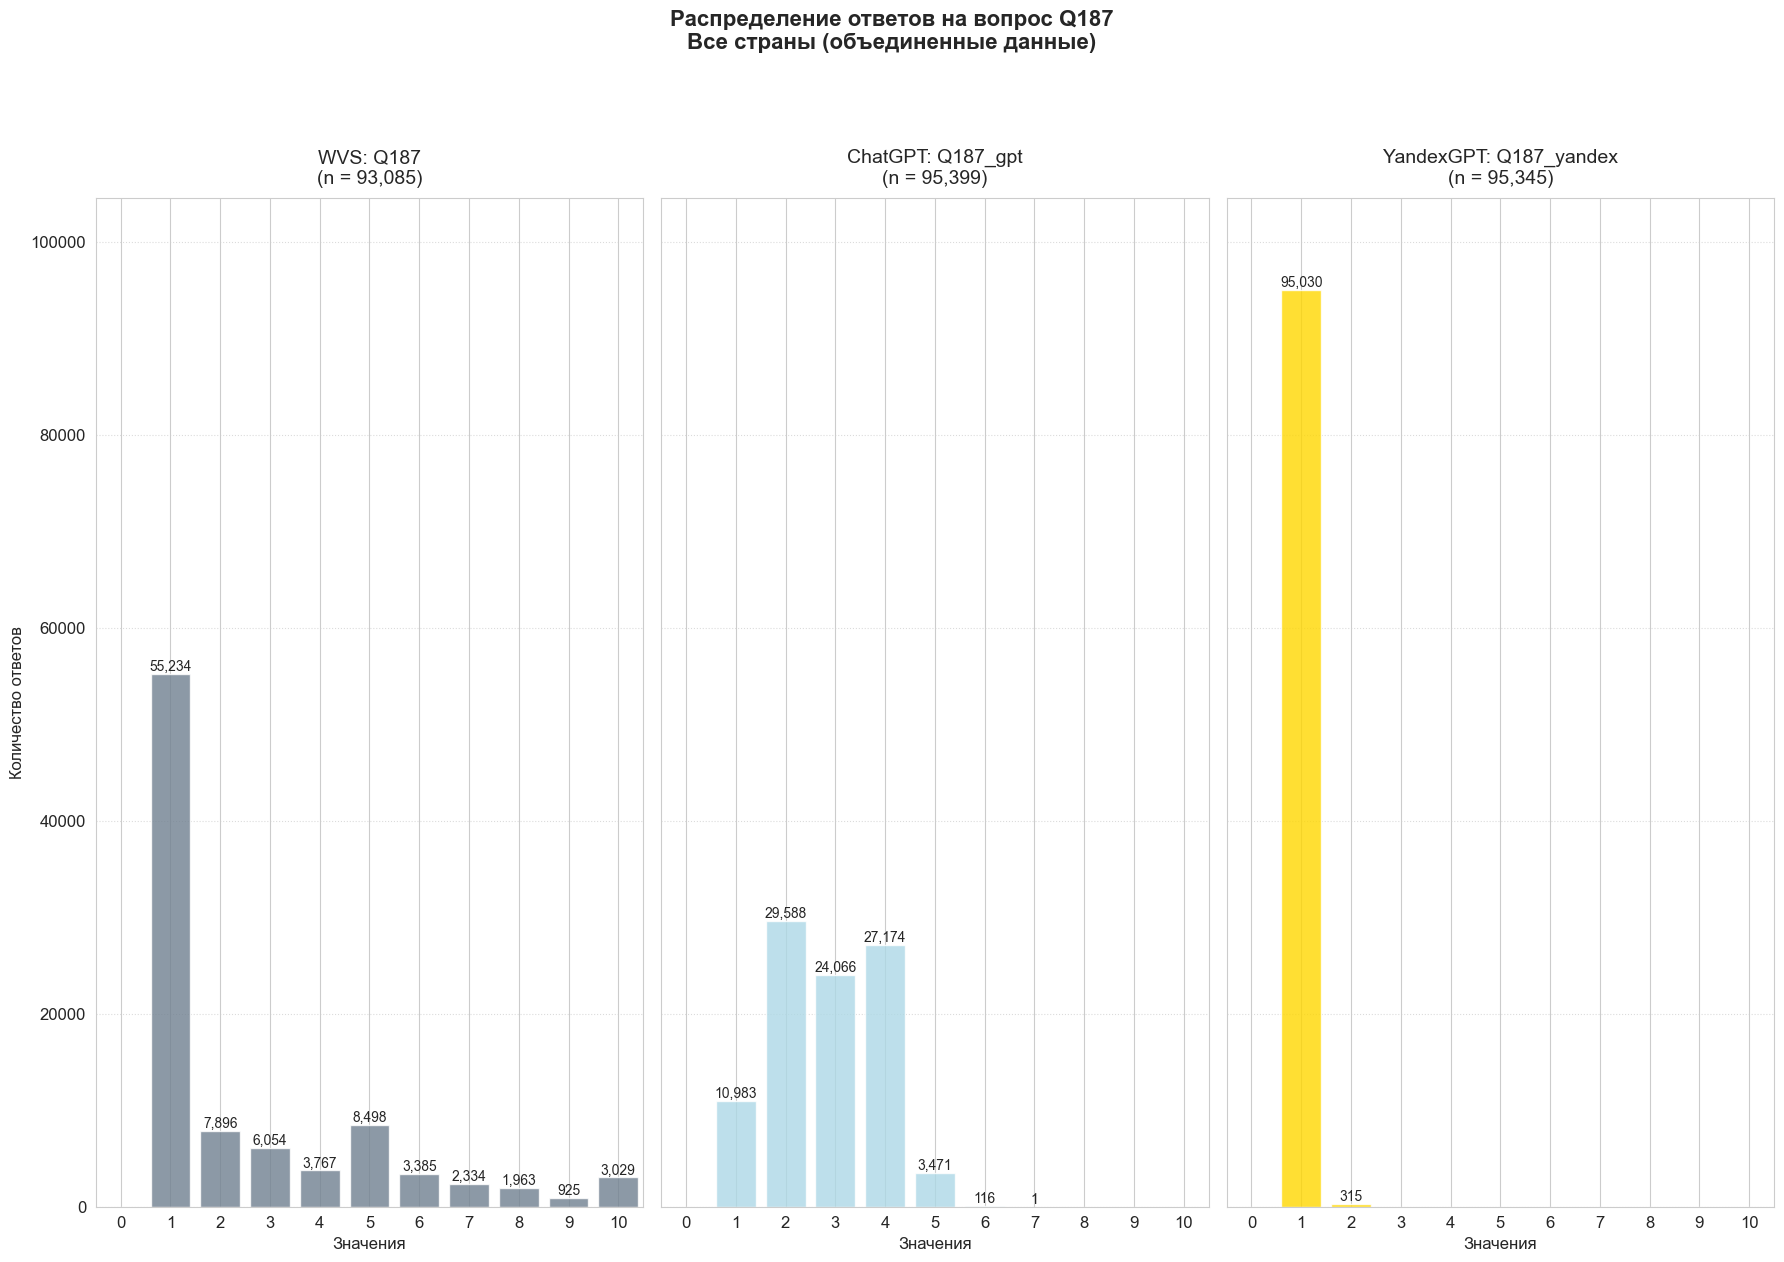

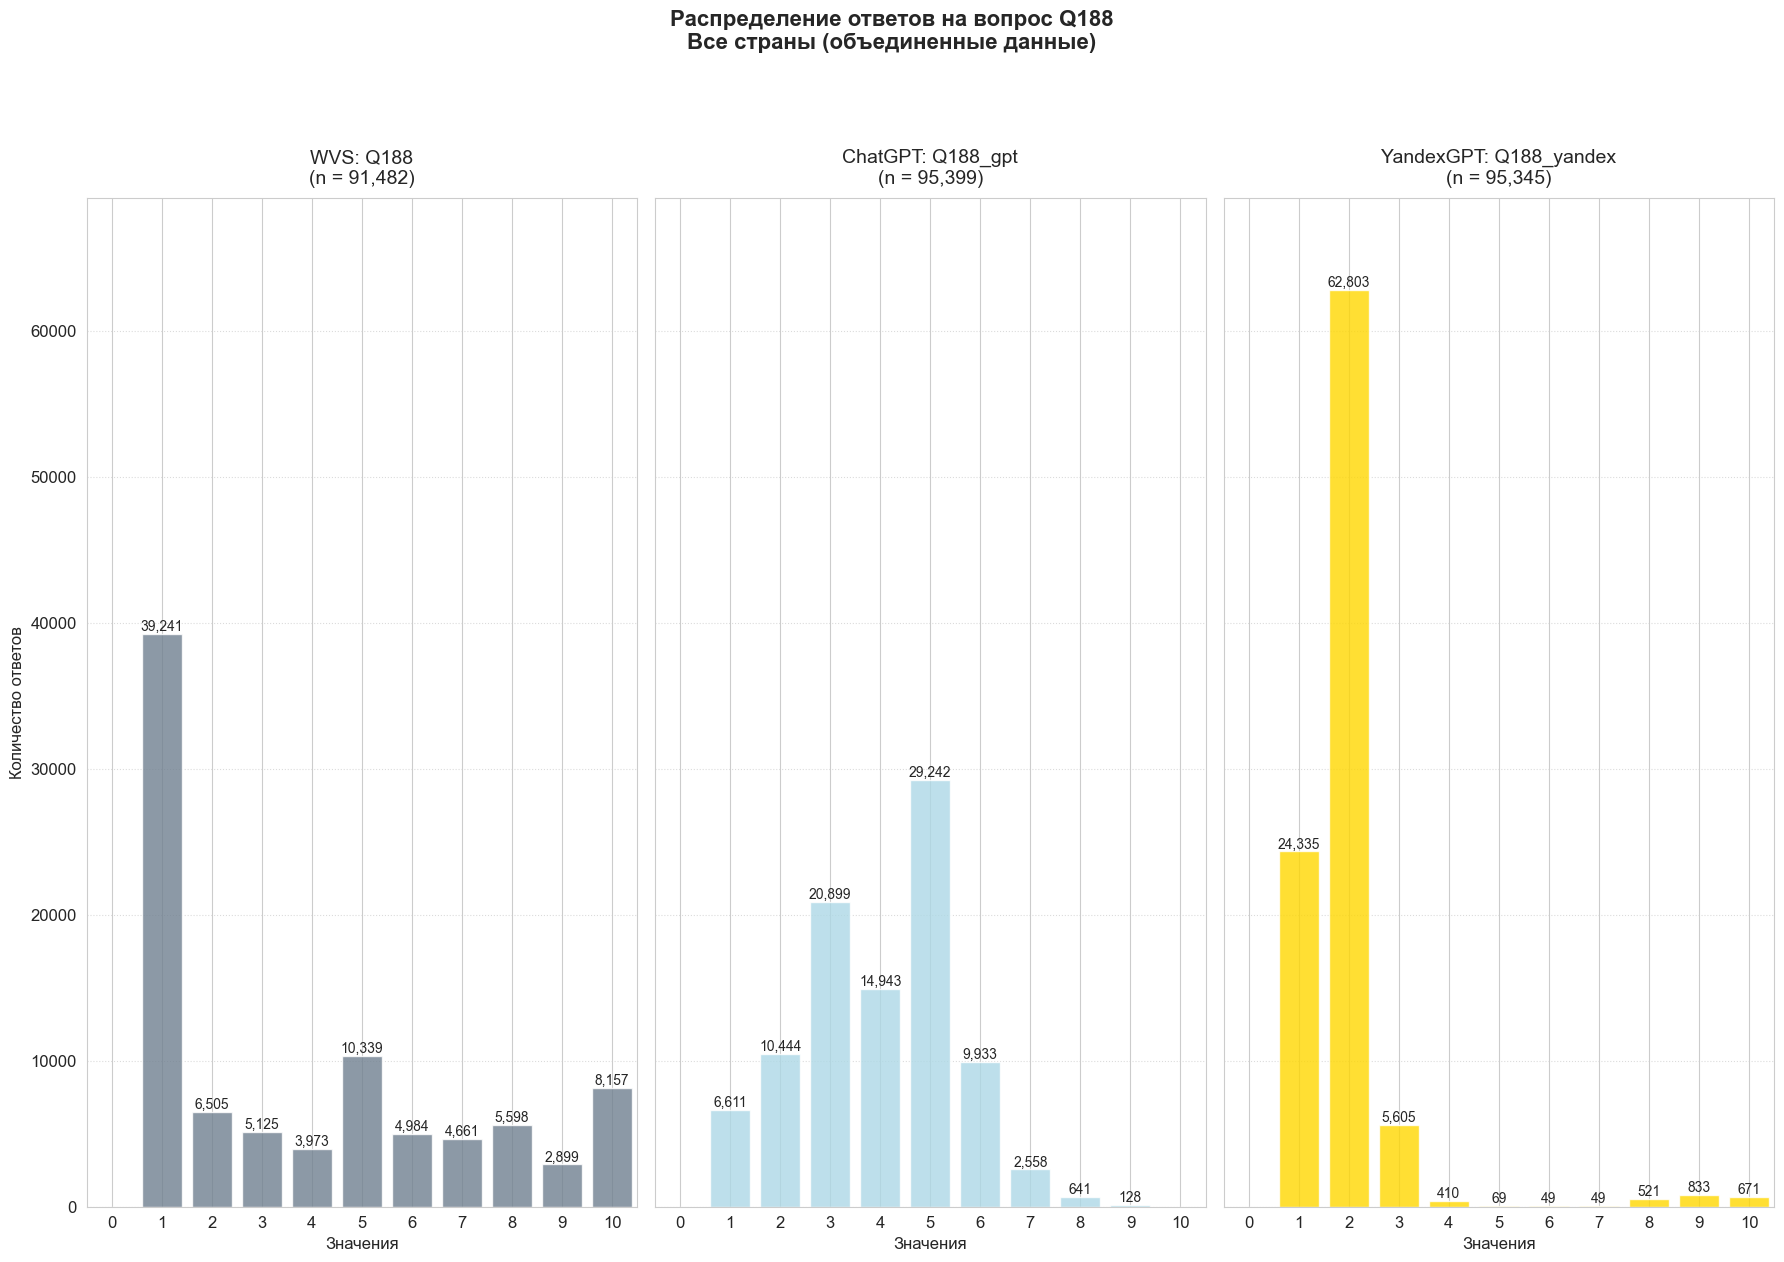

In [6]:
for q in ['Q187', 'Q188']:
    plot_question_all_countries(df, q)

## Q187
Suicide

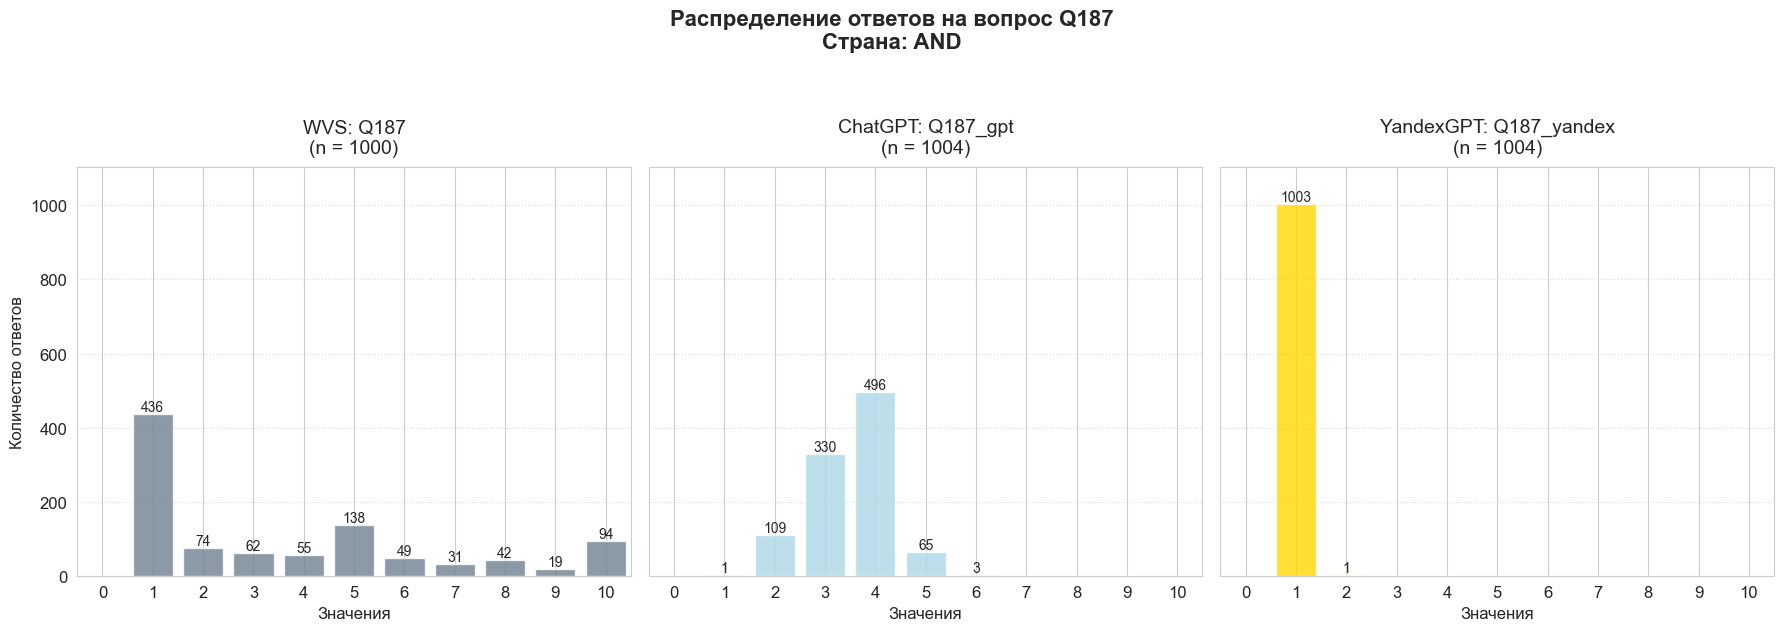

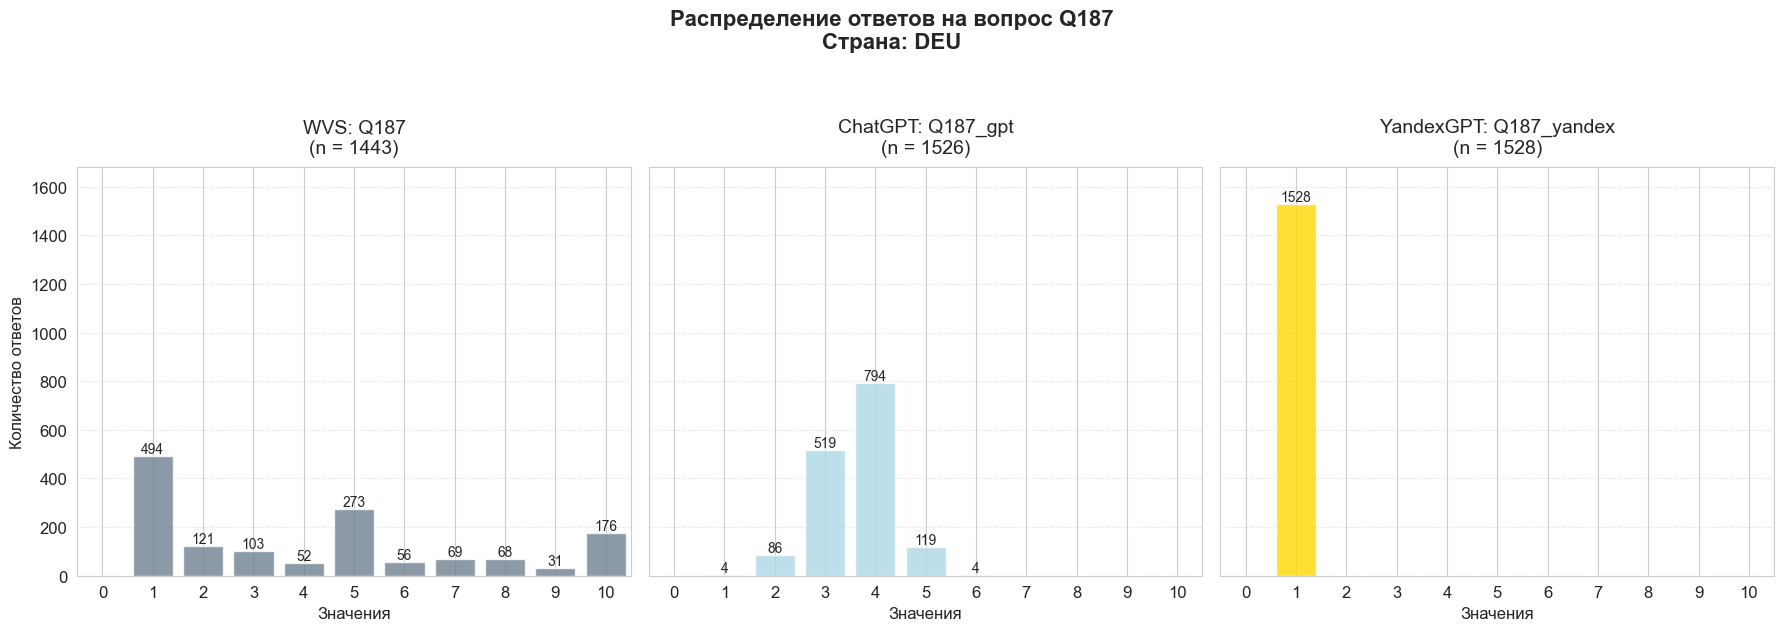

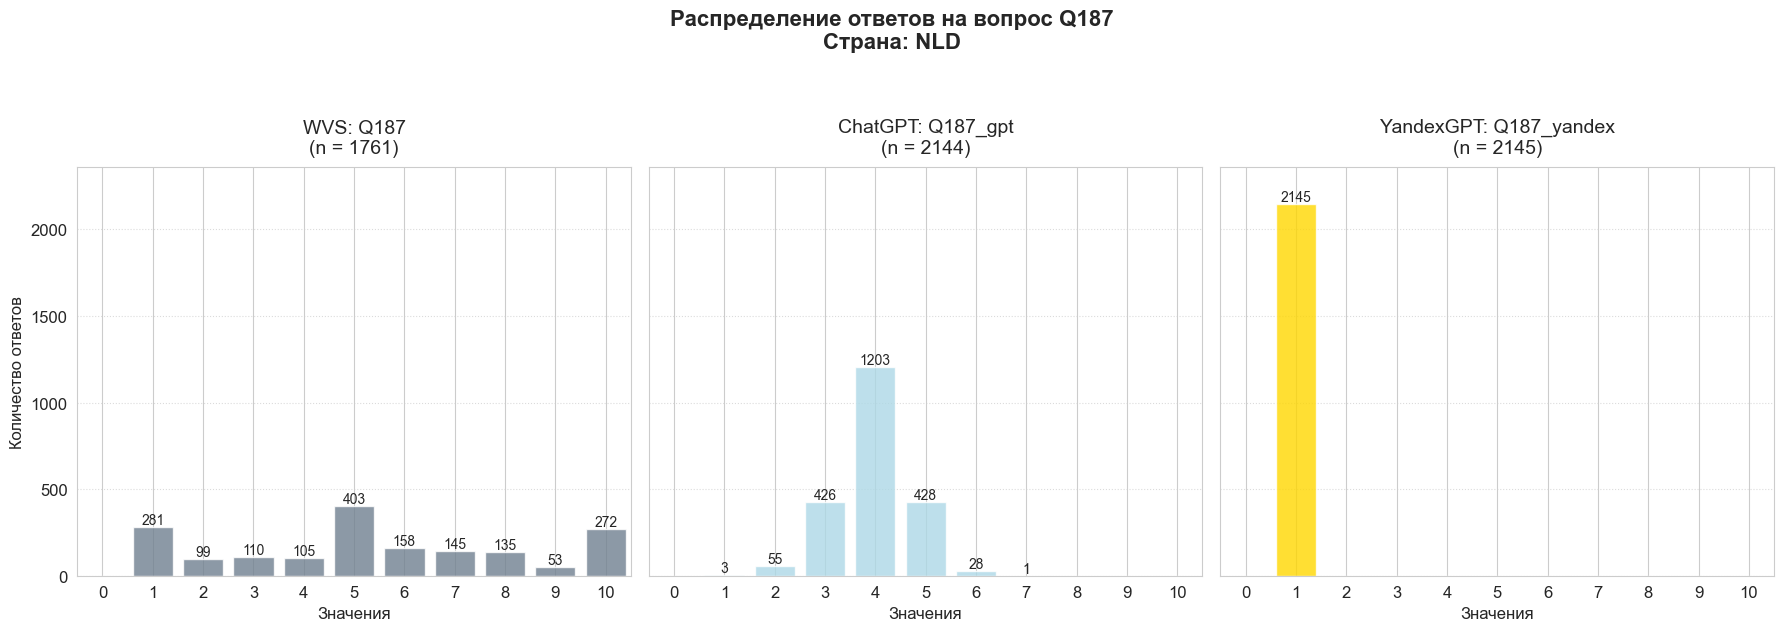

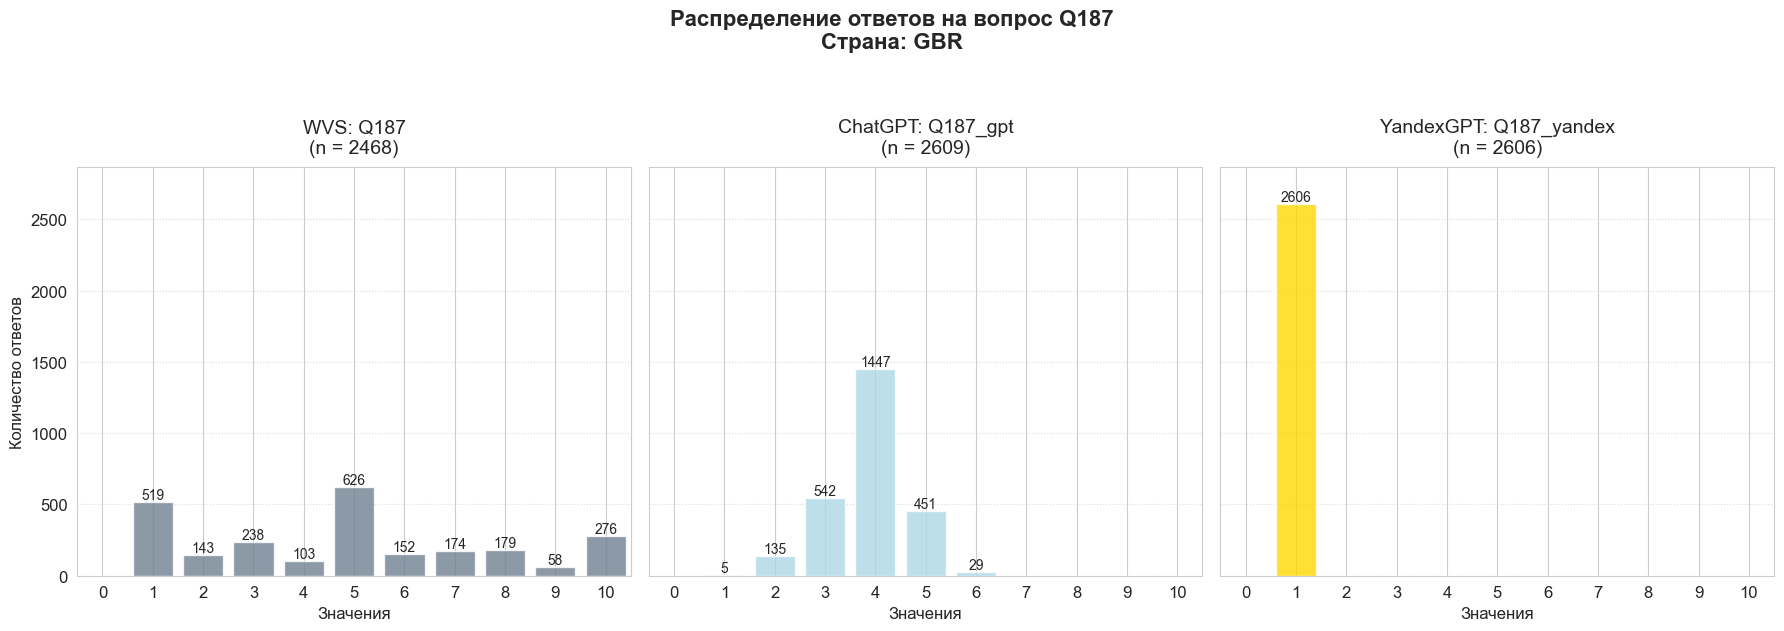

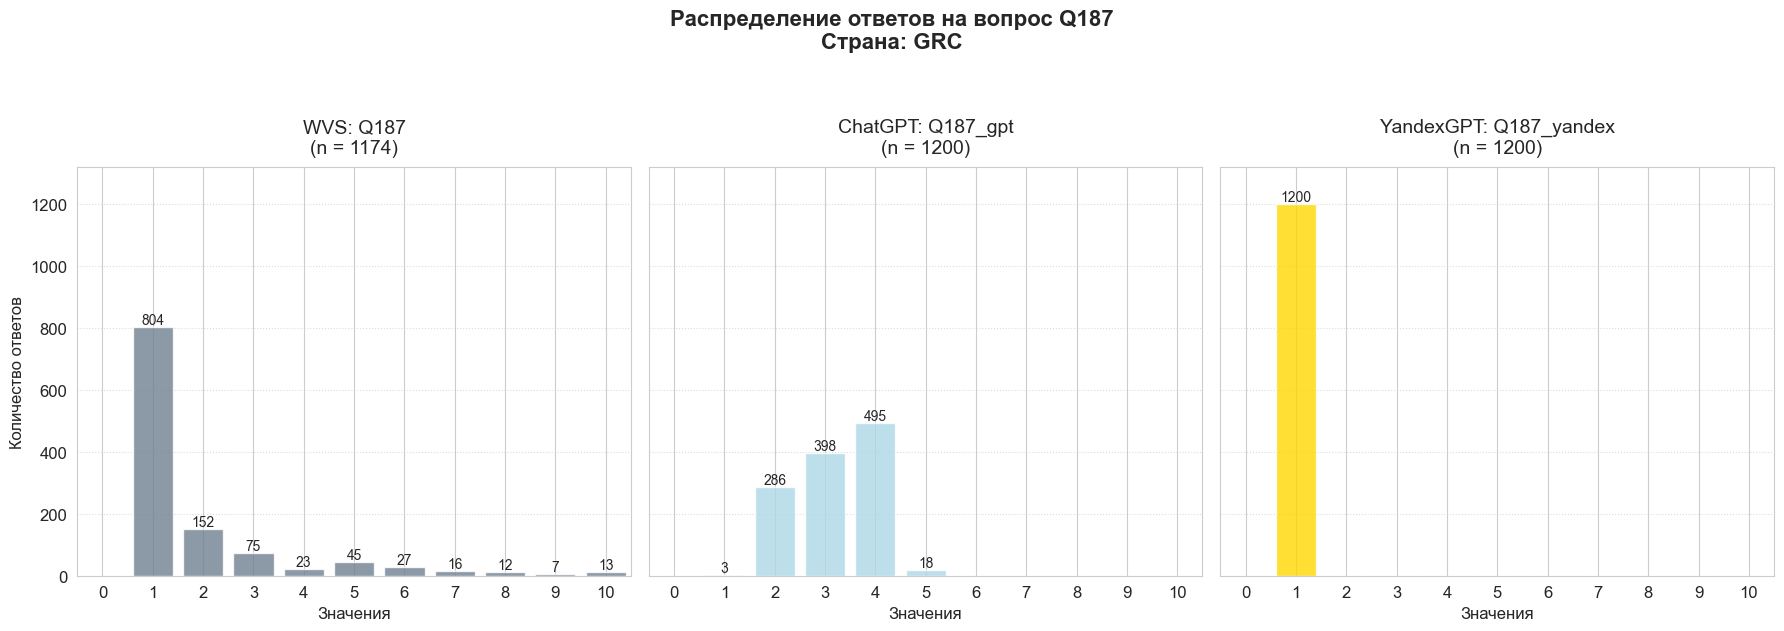

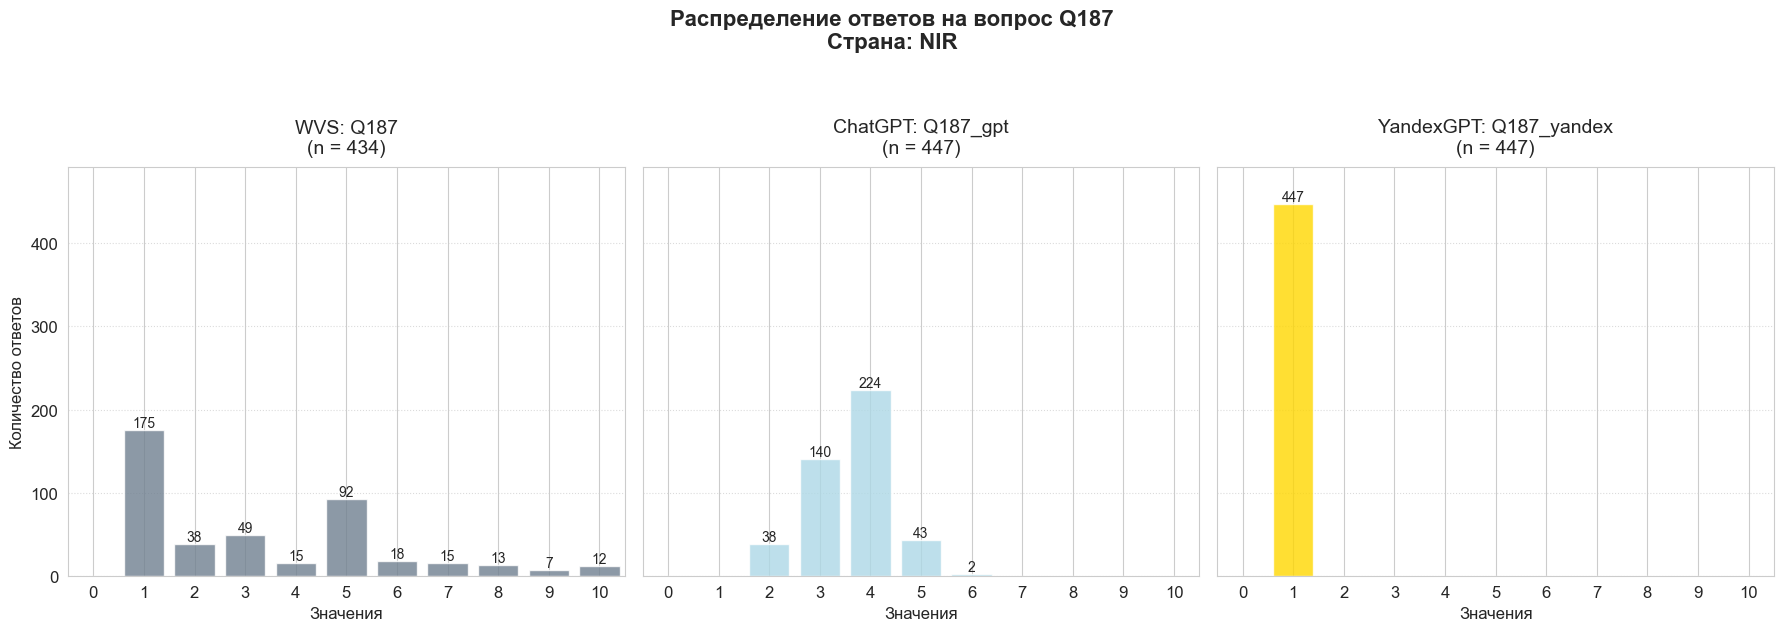

In [7]:
question = 'Q187'

# Western Europe
for country in west_eu:
    plot_question_by_country(df, question, country)

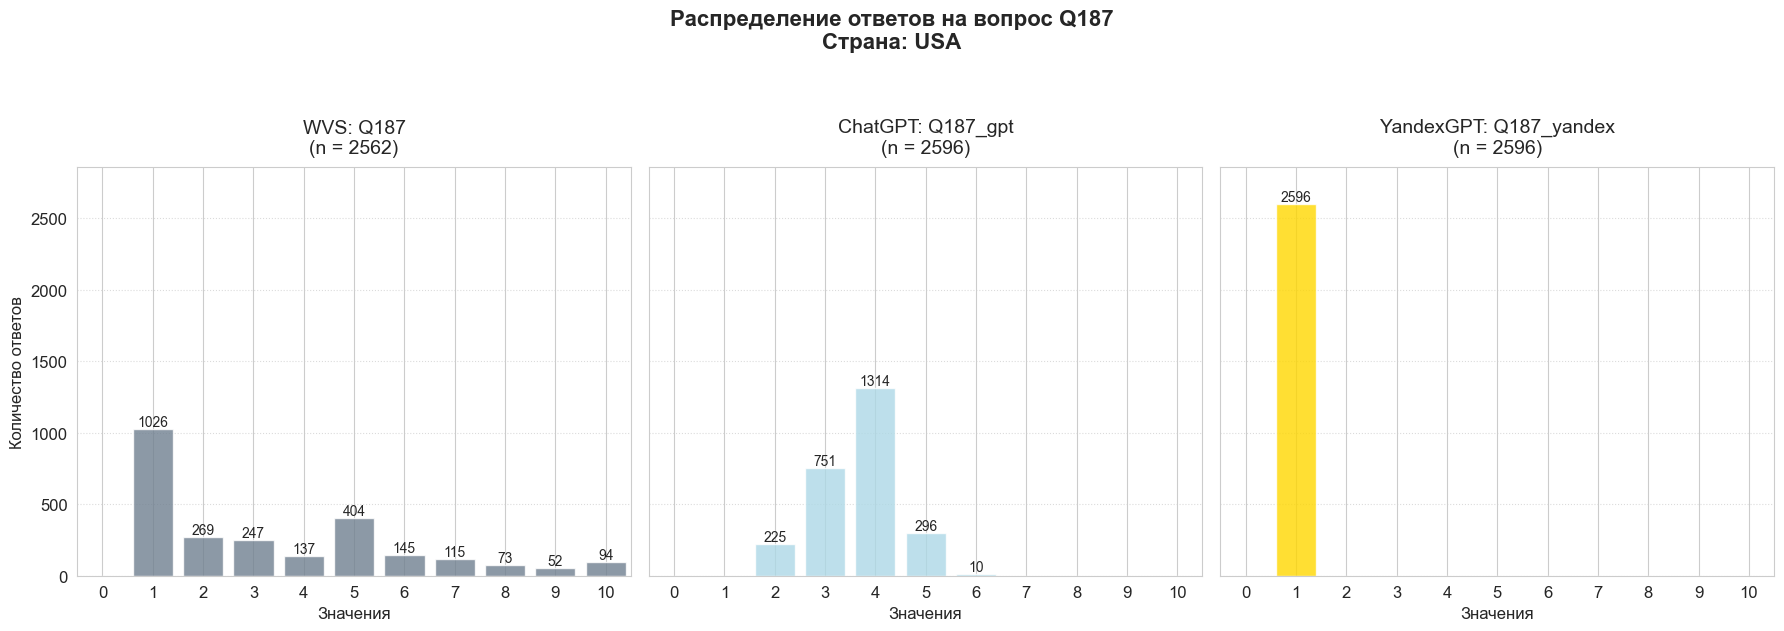

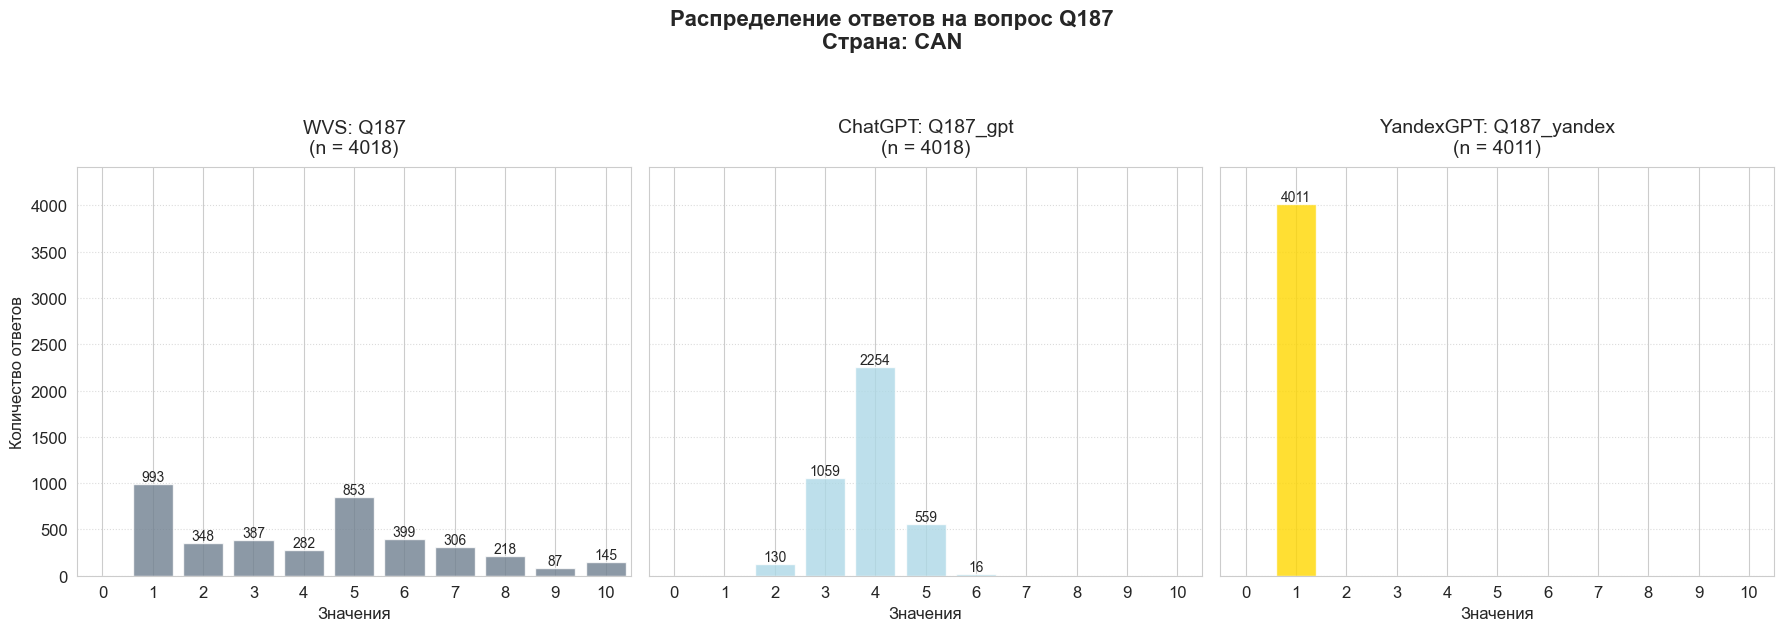

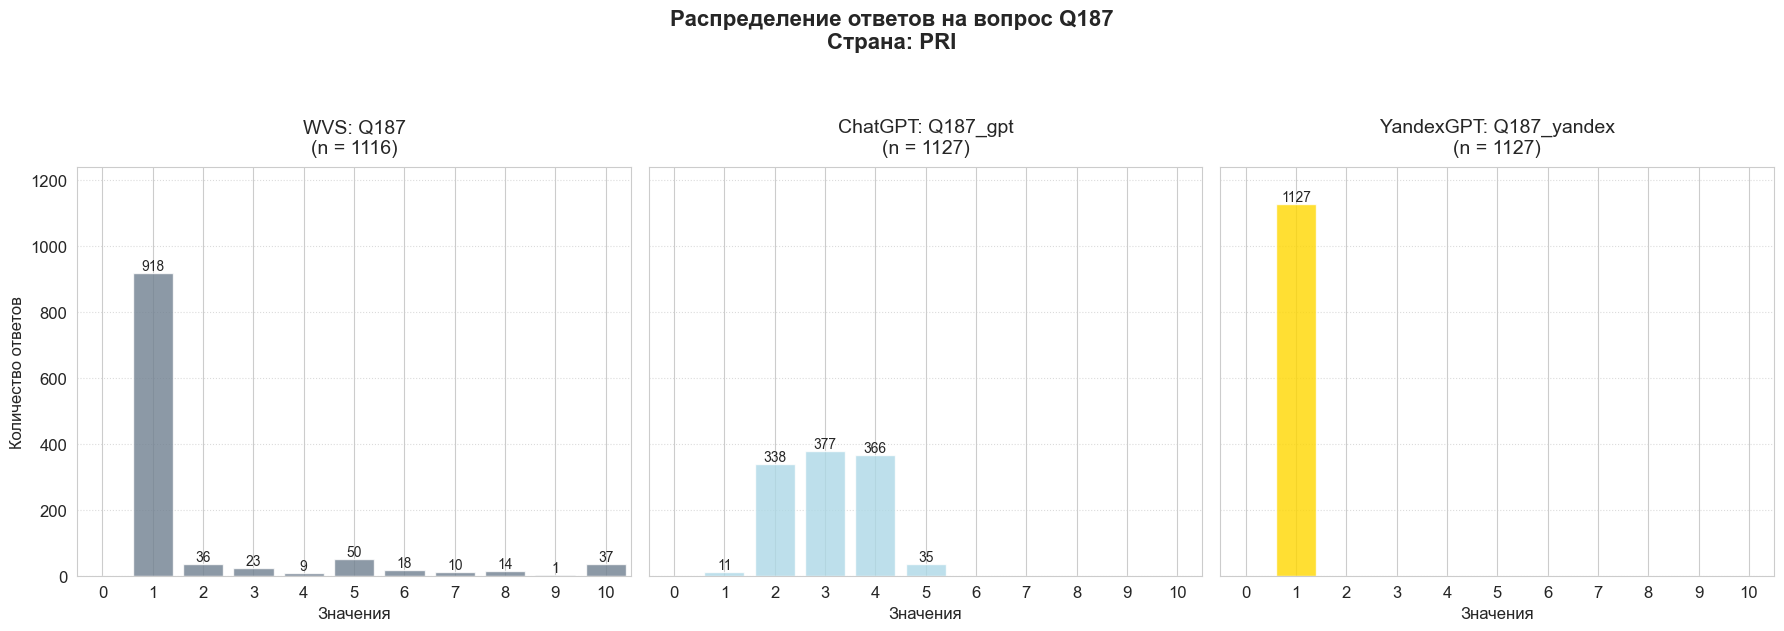

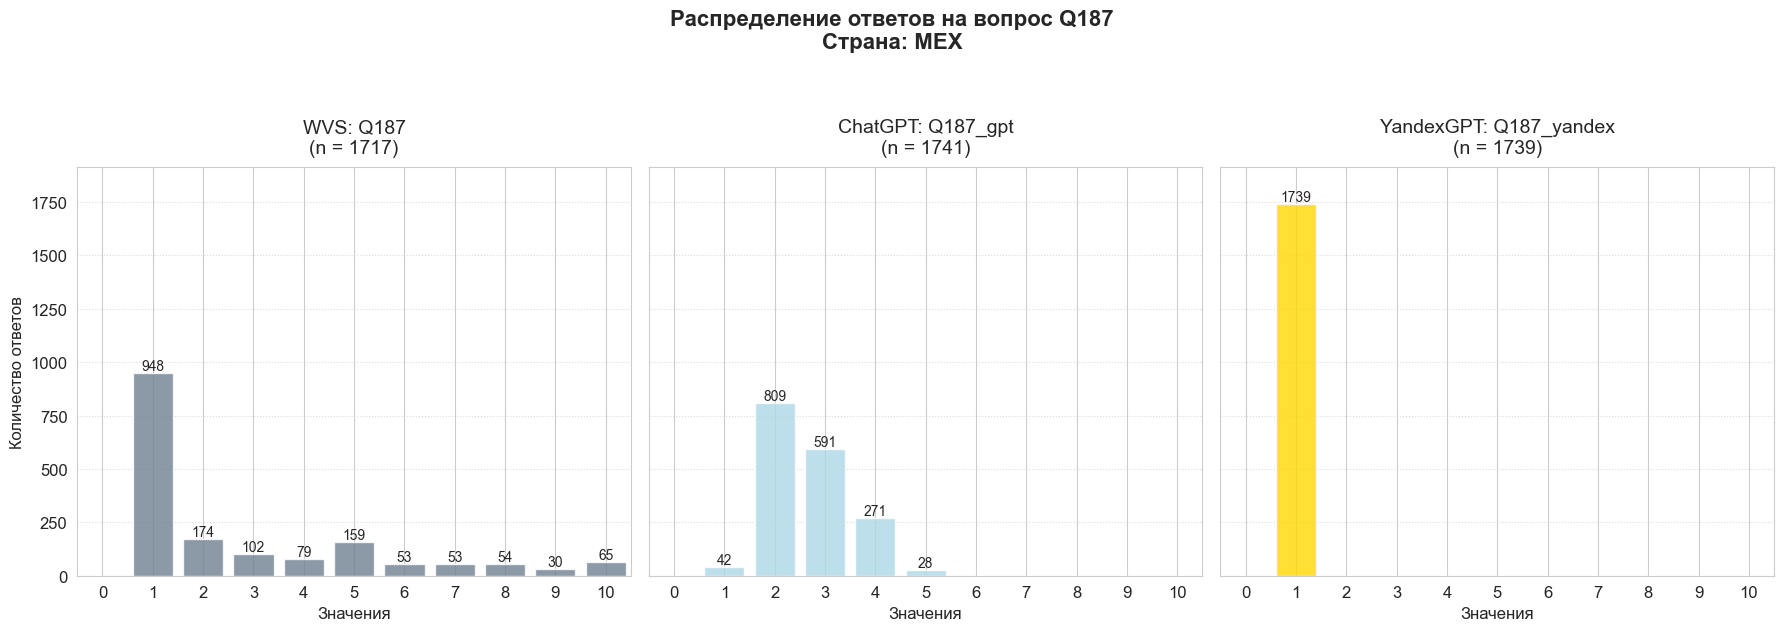

In [8]:
# North America
for country in north_am:
    plot_question_by_country(df, question, country)

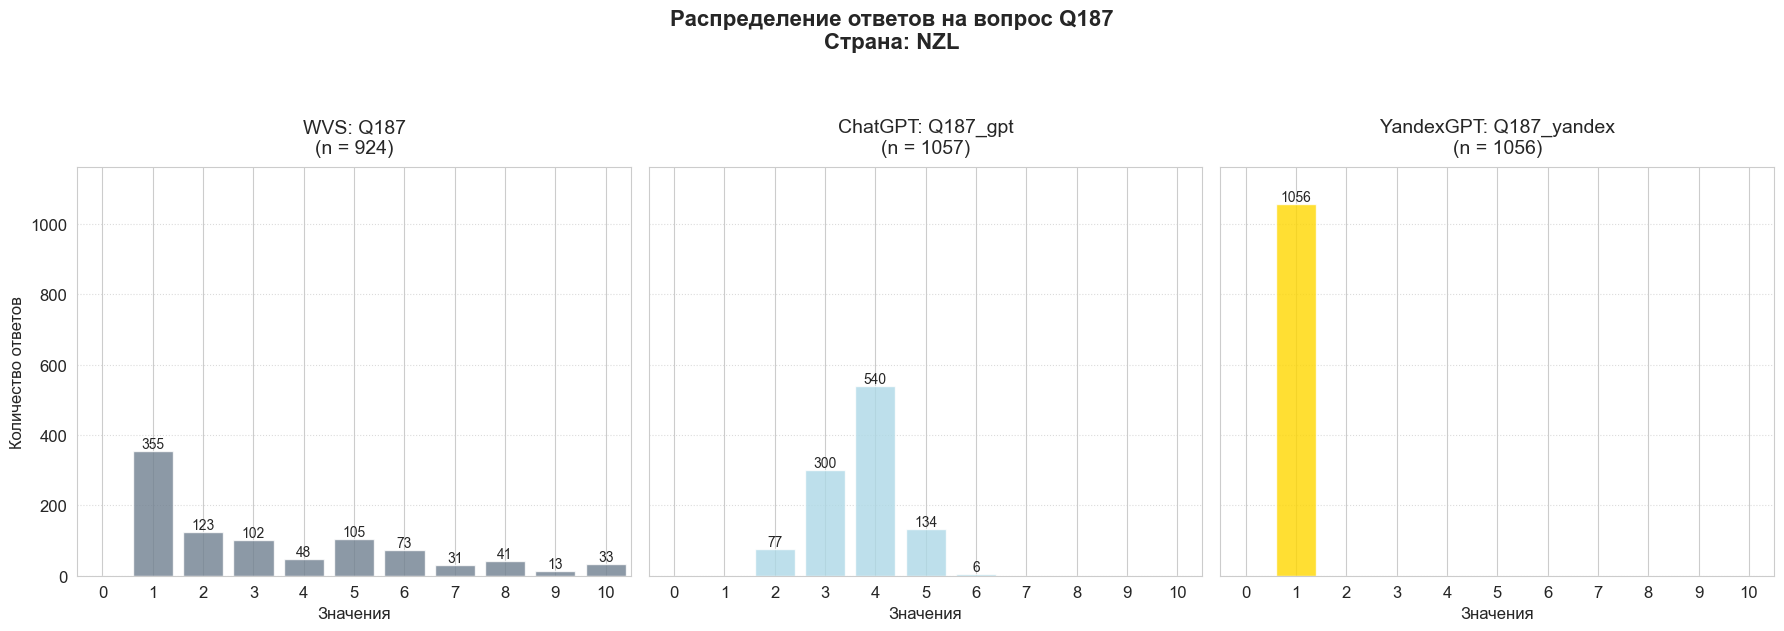

In [9]:
# Oceania
for country in oc:
    plot_question_by_country(df, question, country)


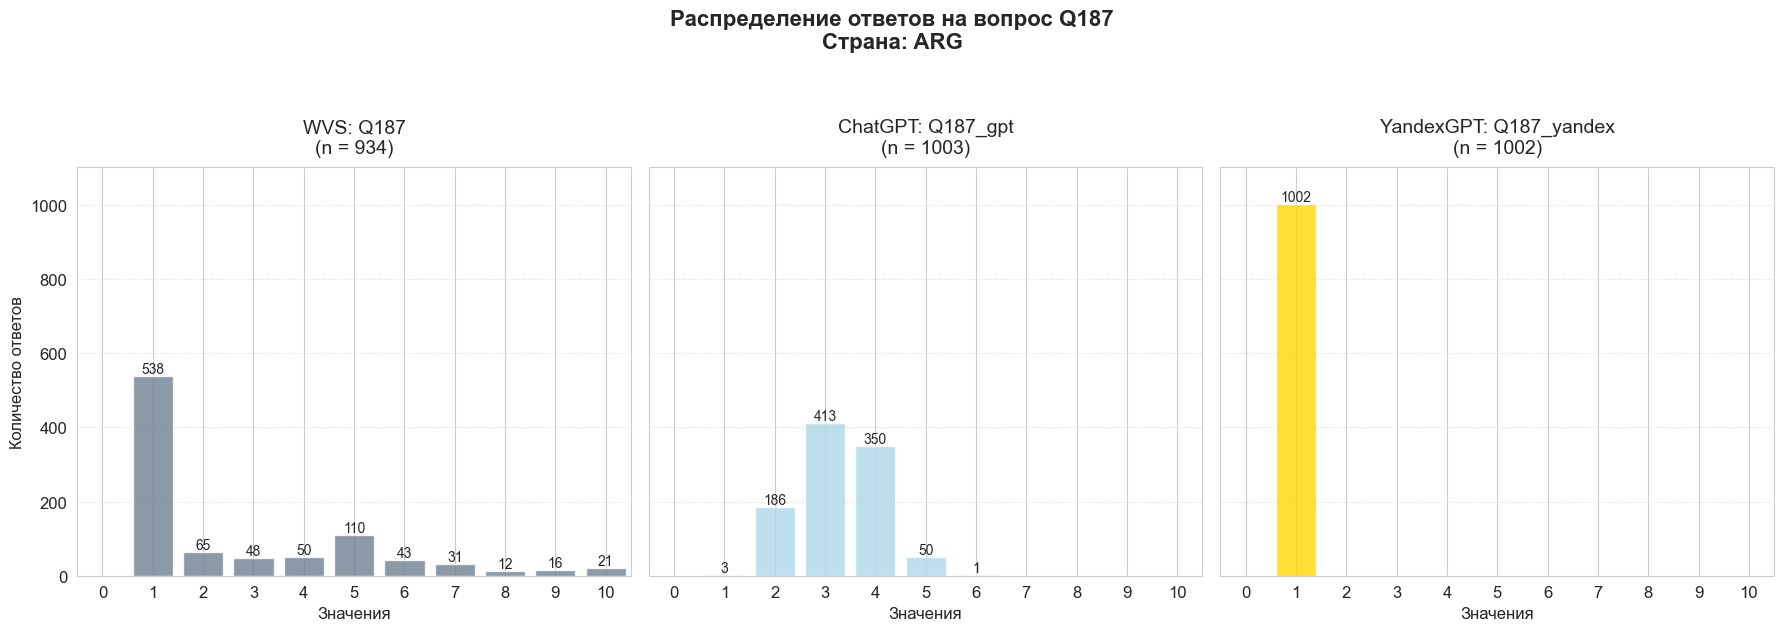

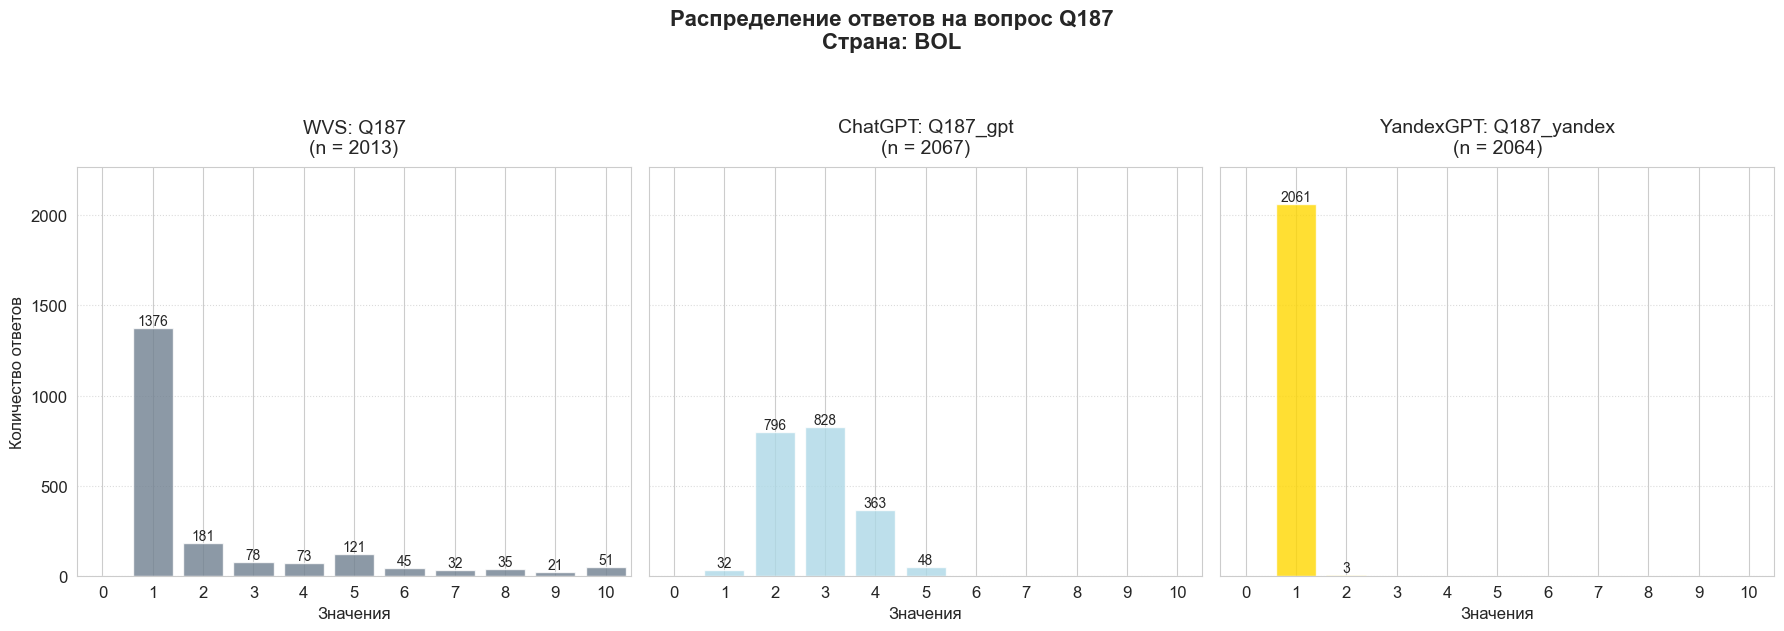

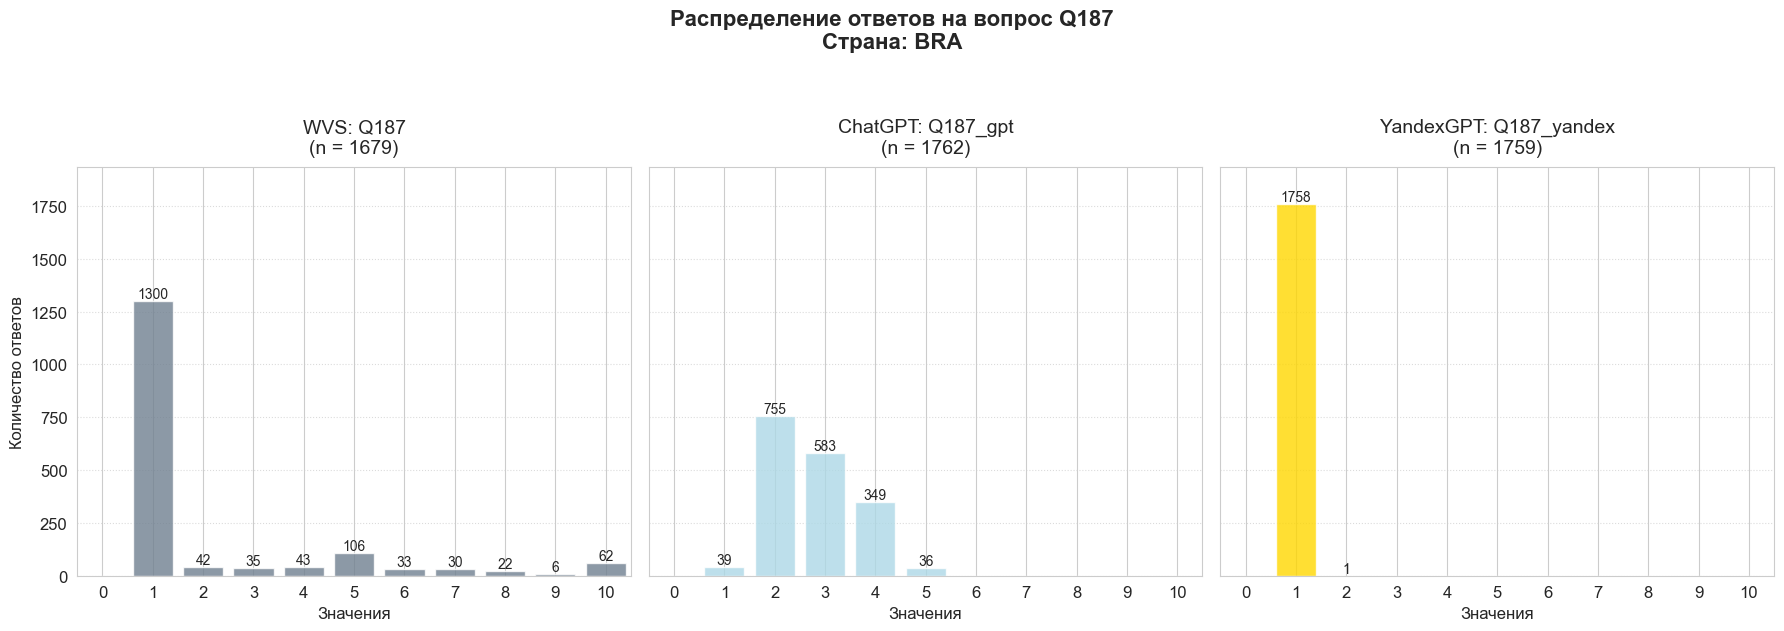

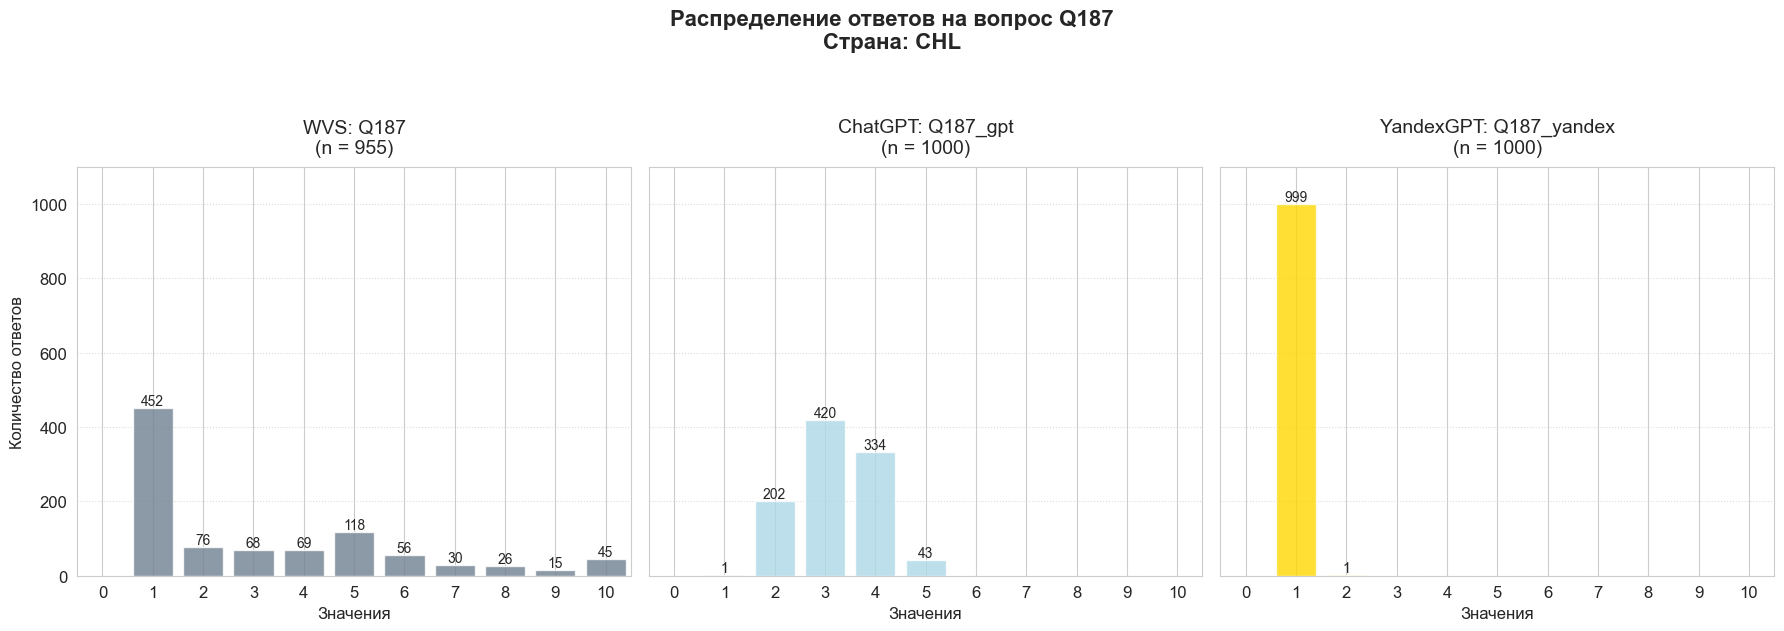

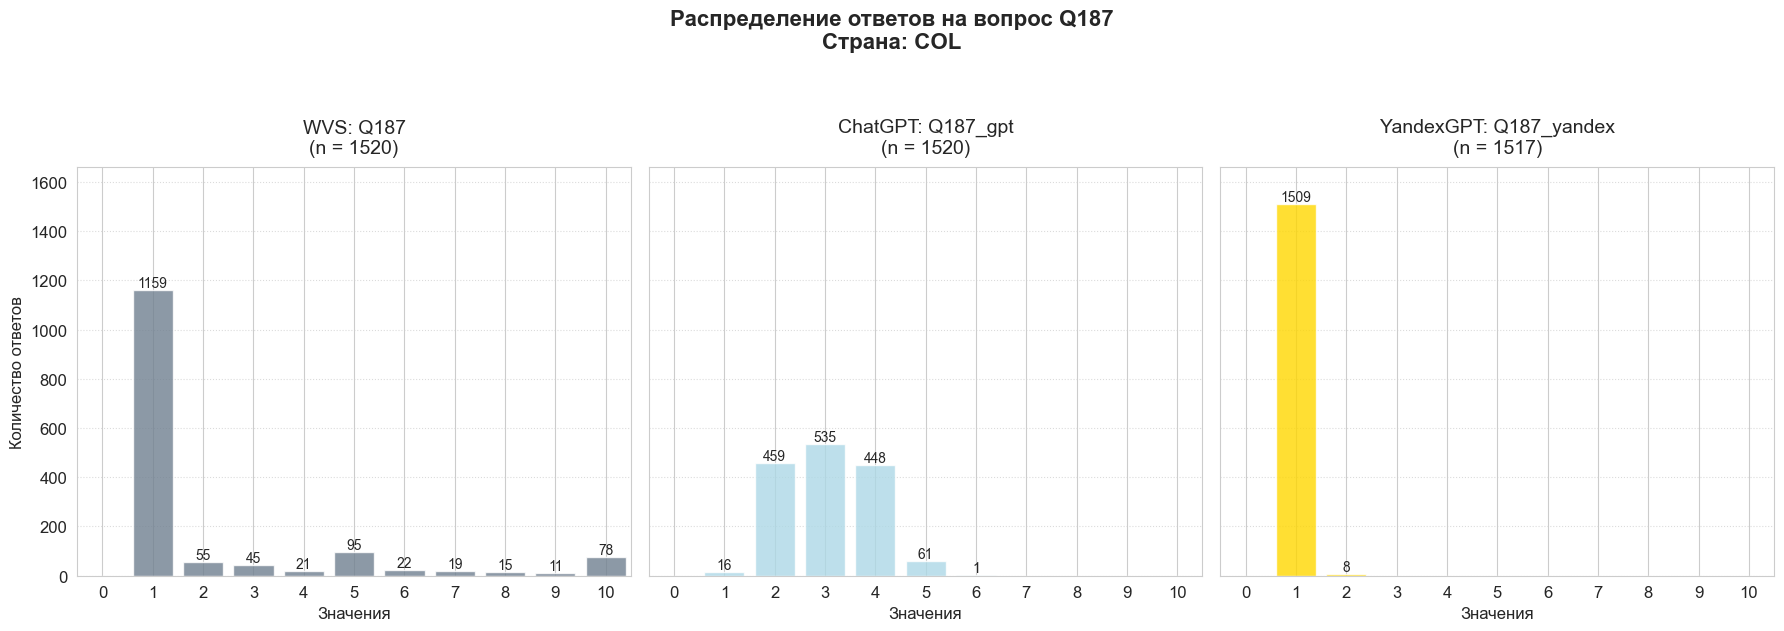

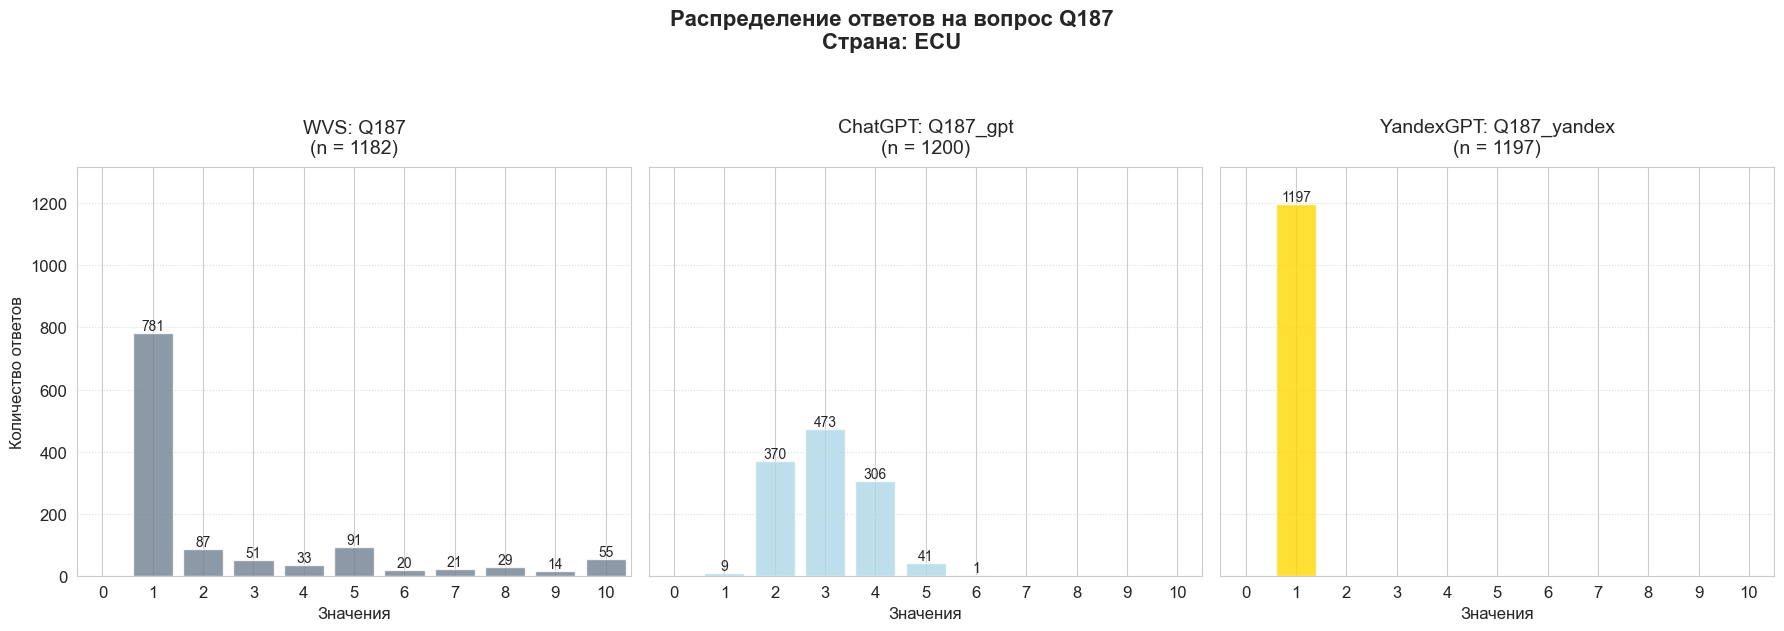

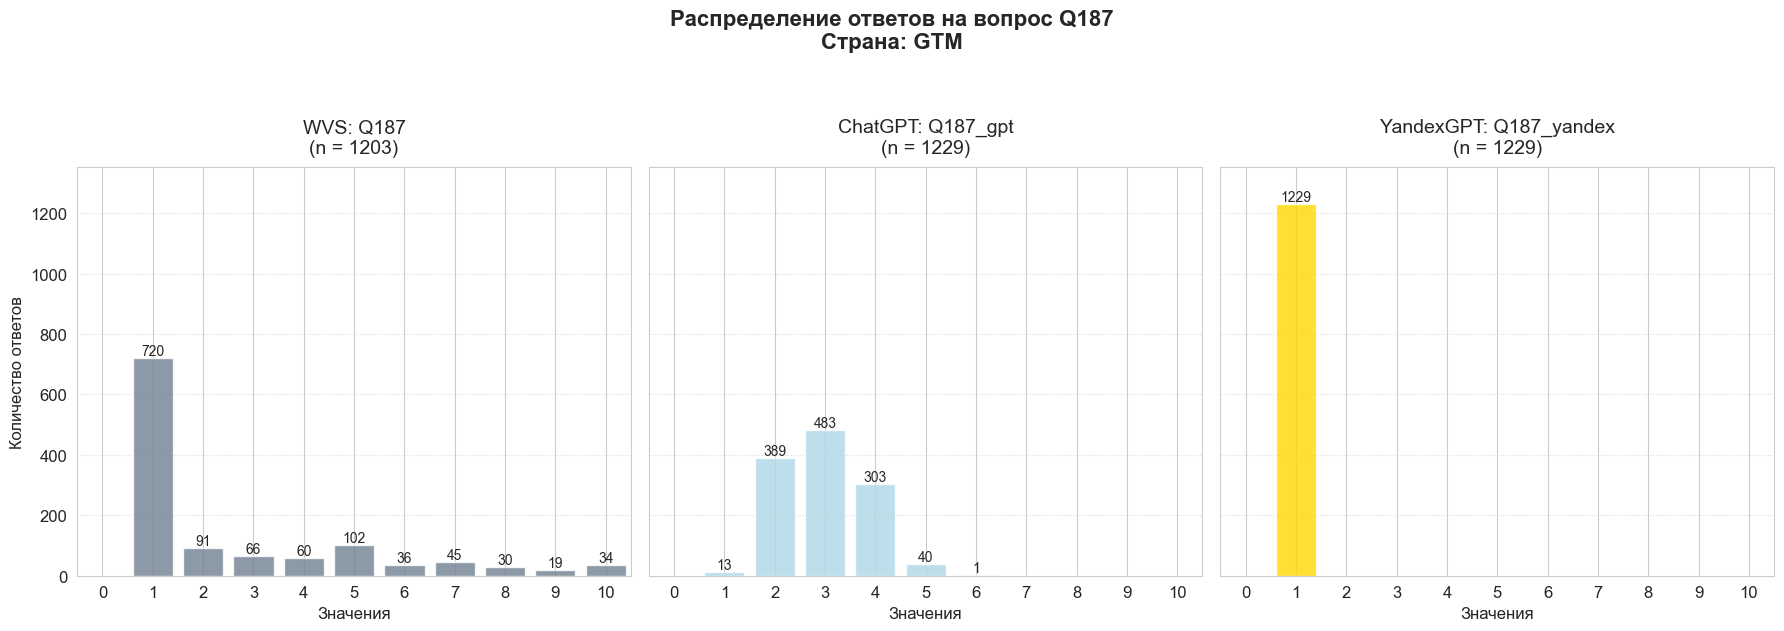

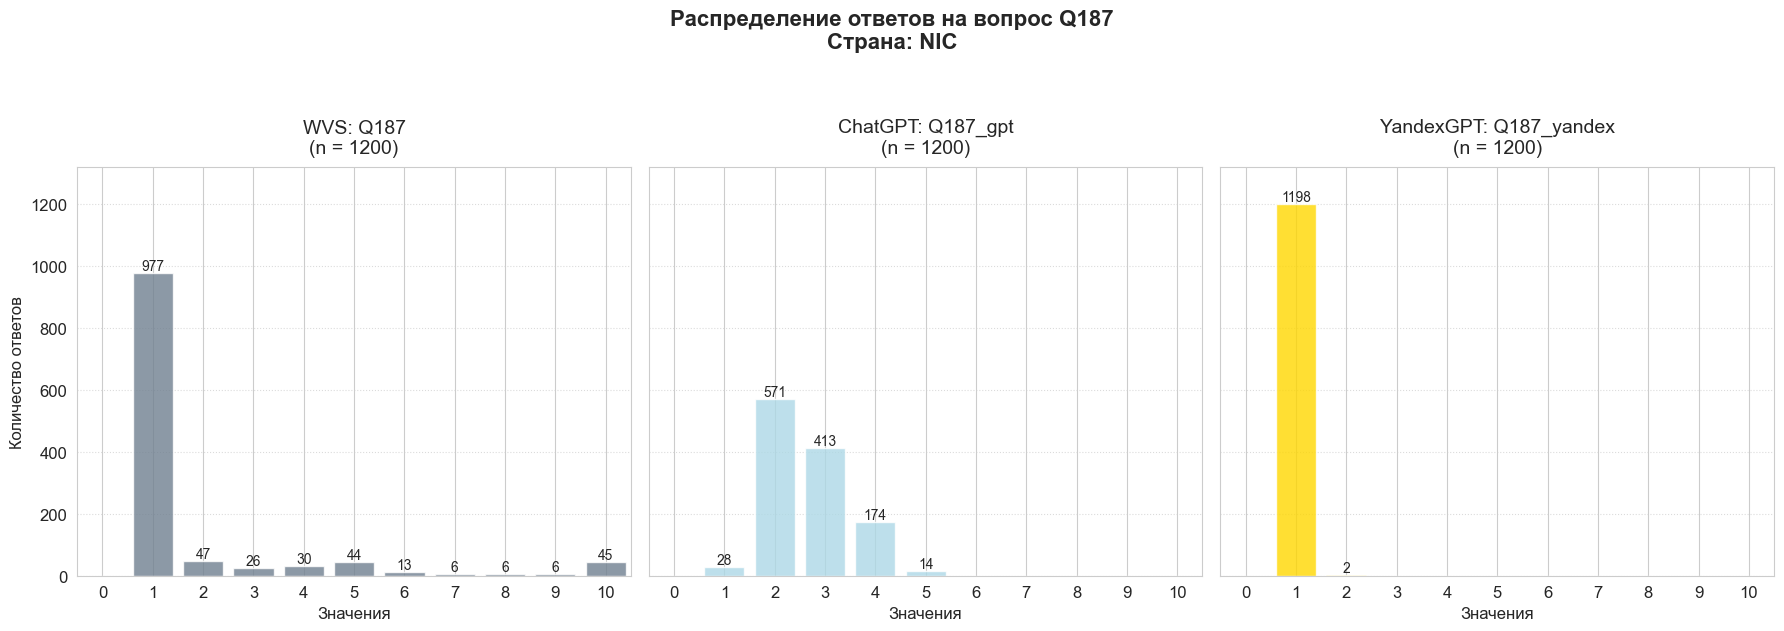

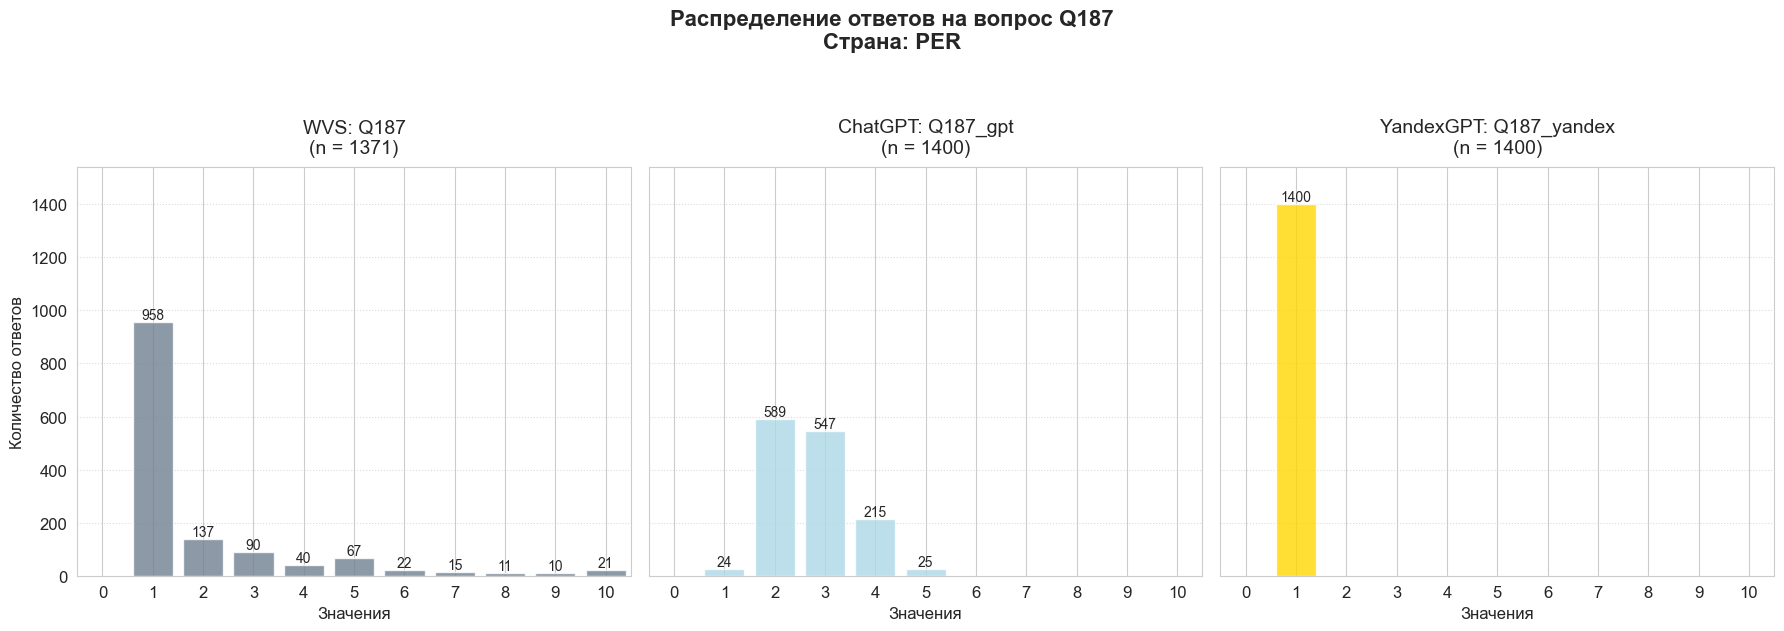

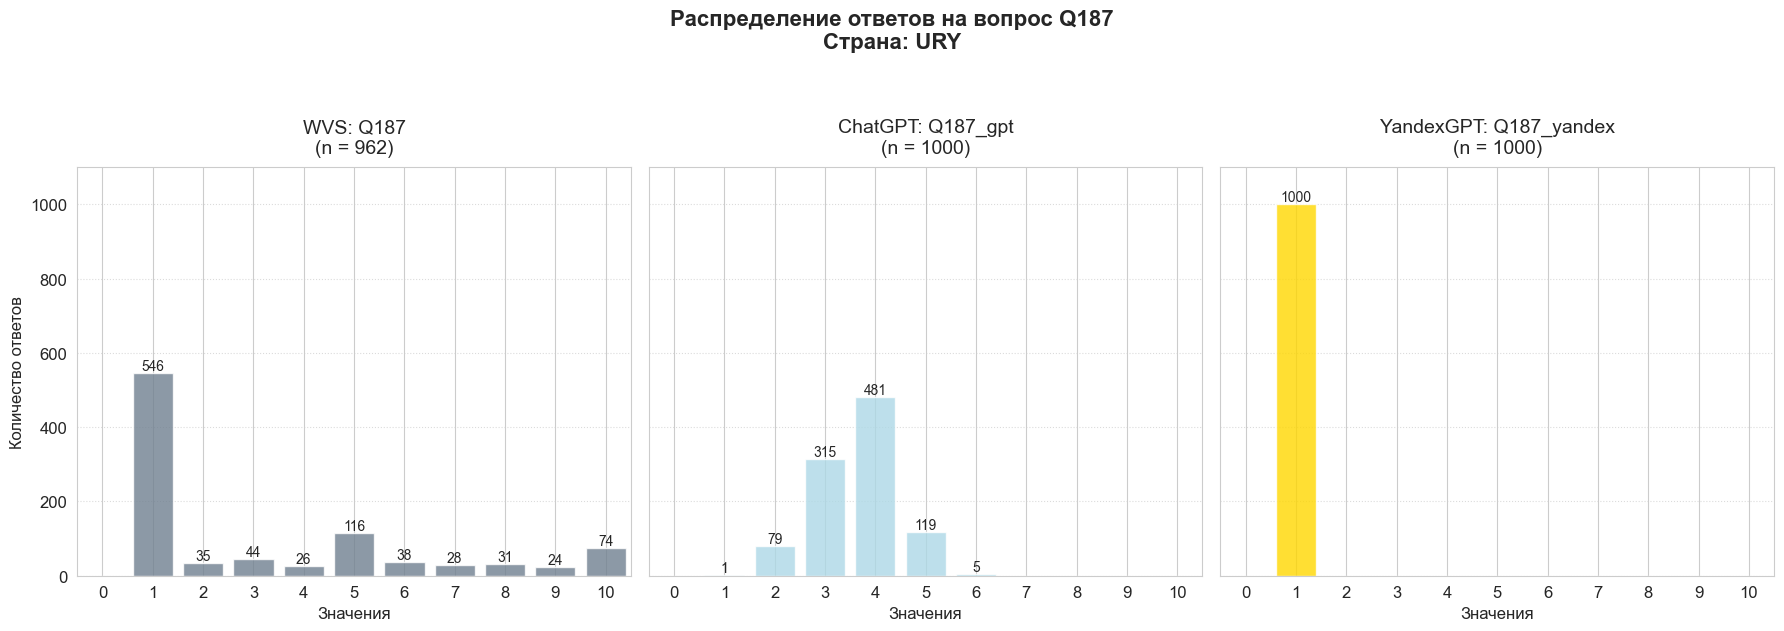

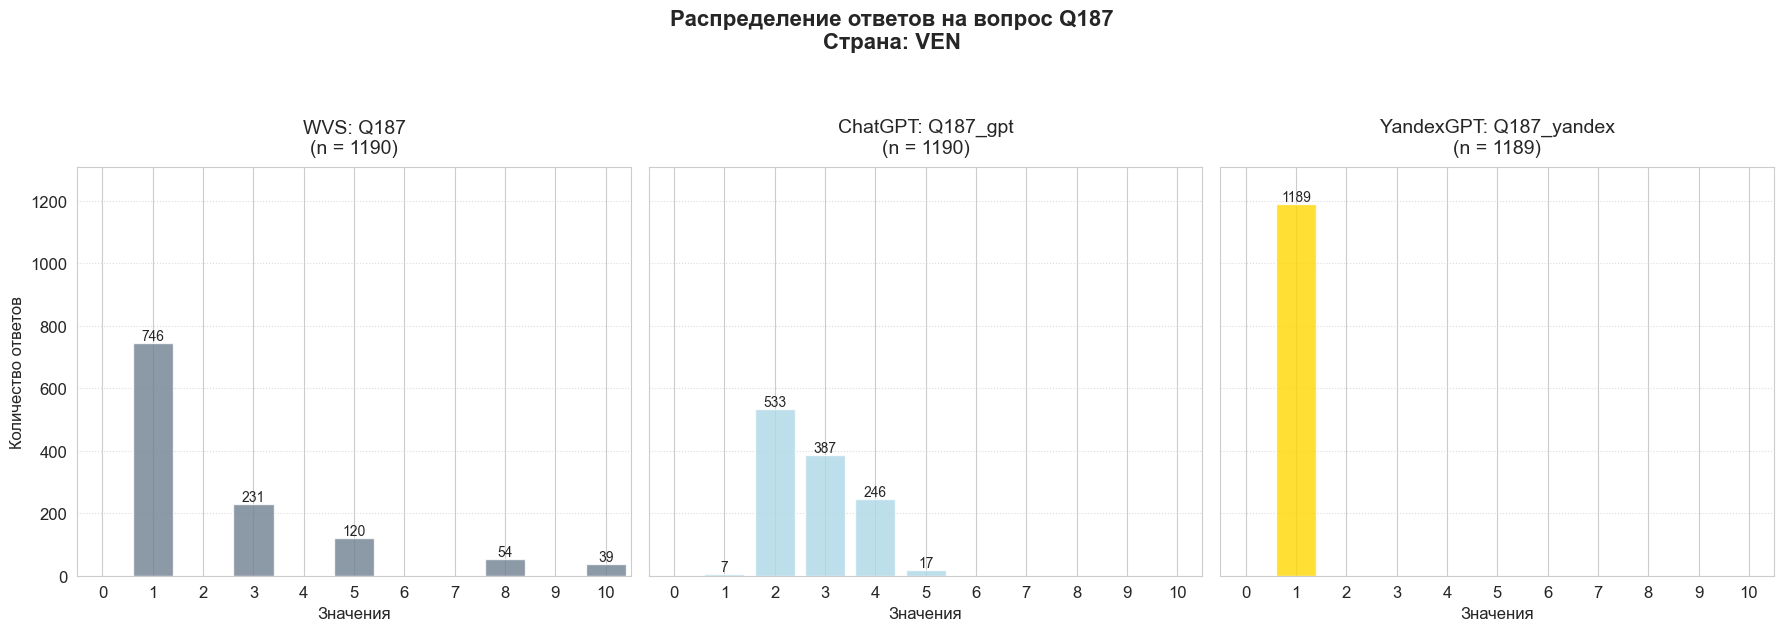

In [10]:
# Latin Amerika
for country in lat_am:
    plot_question_by_country(df, question, country)


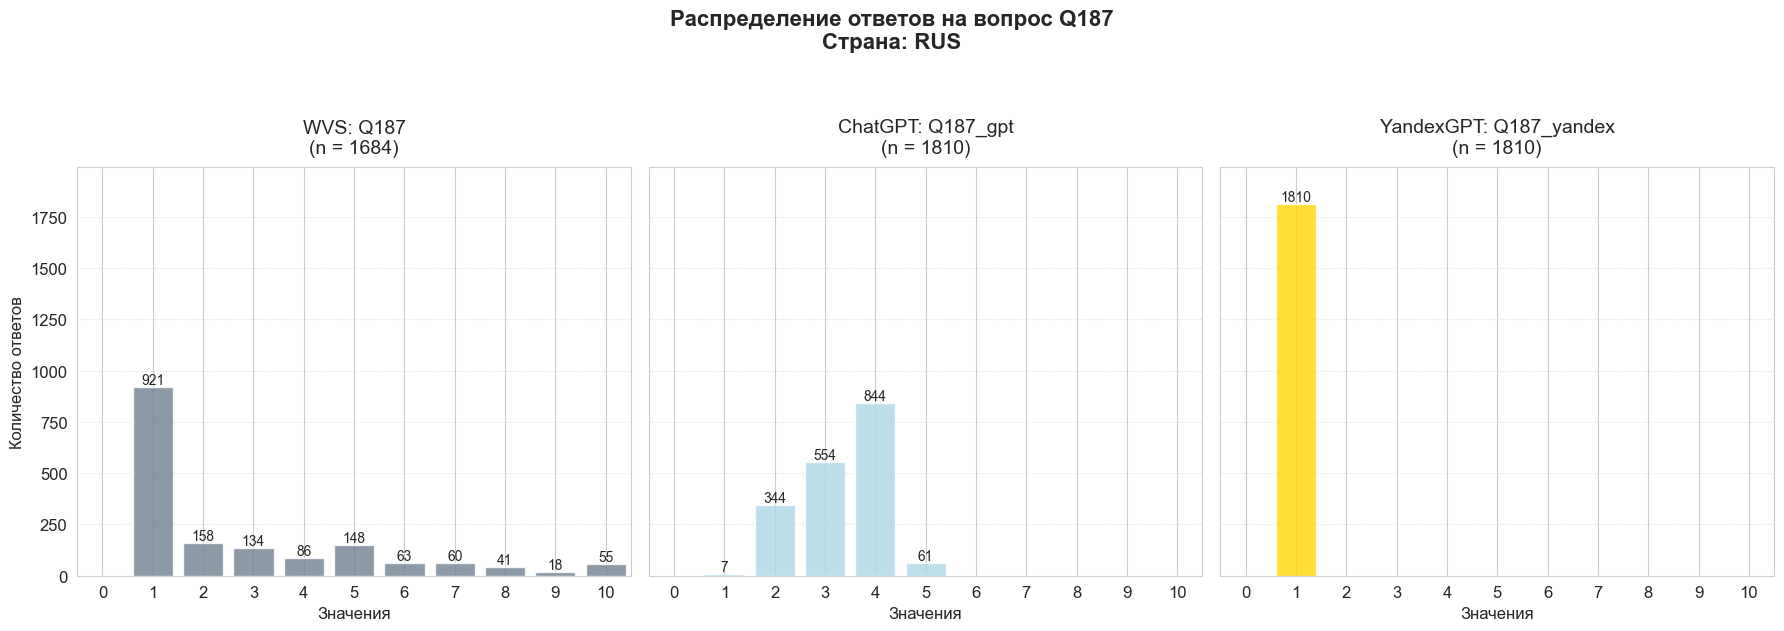

In [11]:
# Russia
for country in rus:
    plot_question_by_country(df, question, country)


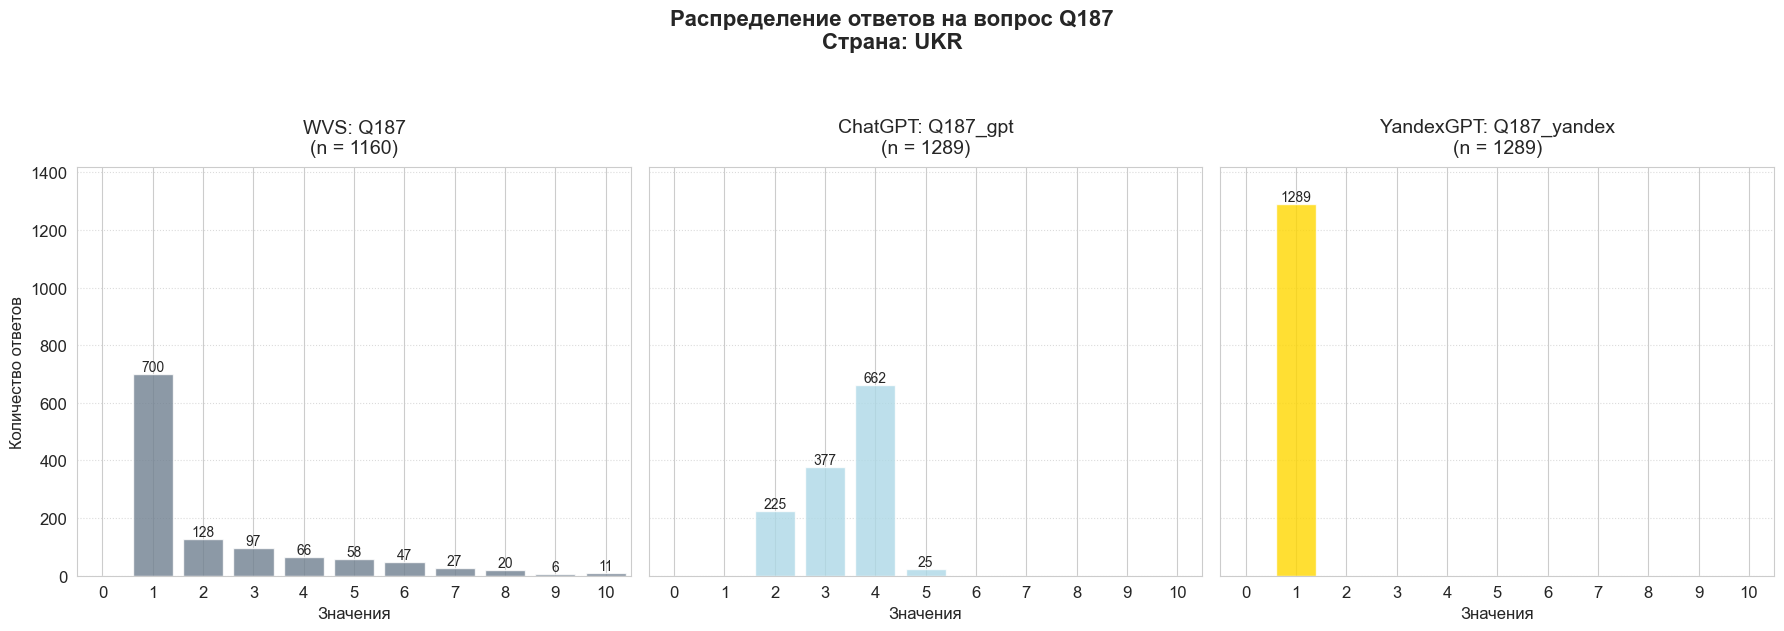

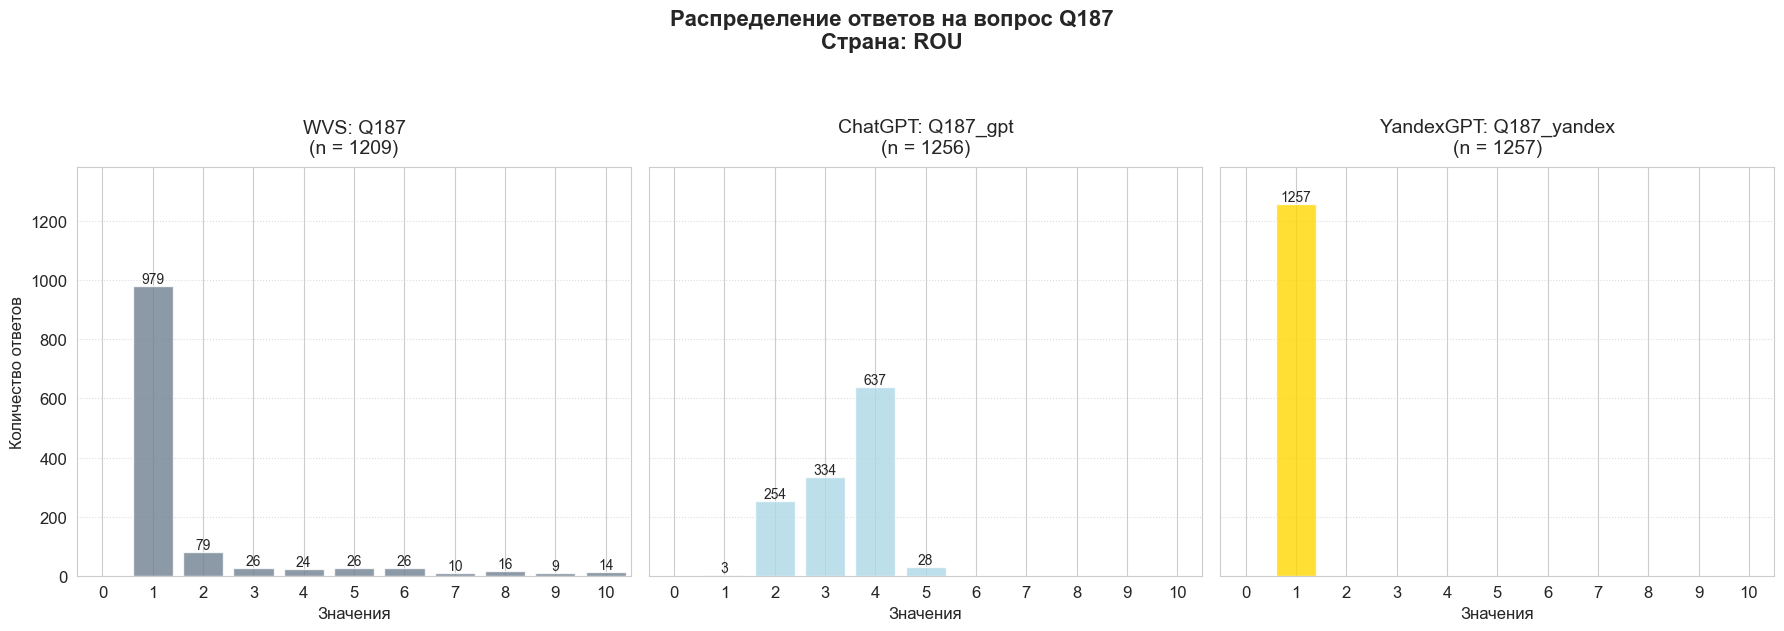

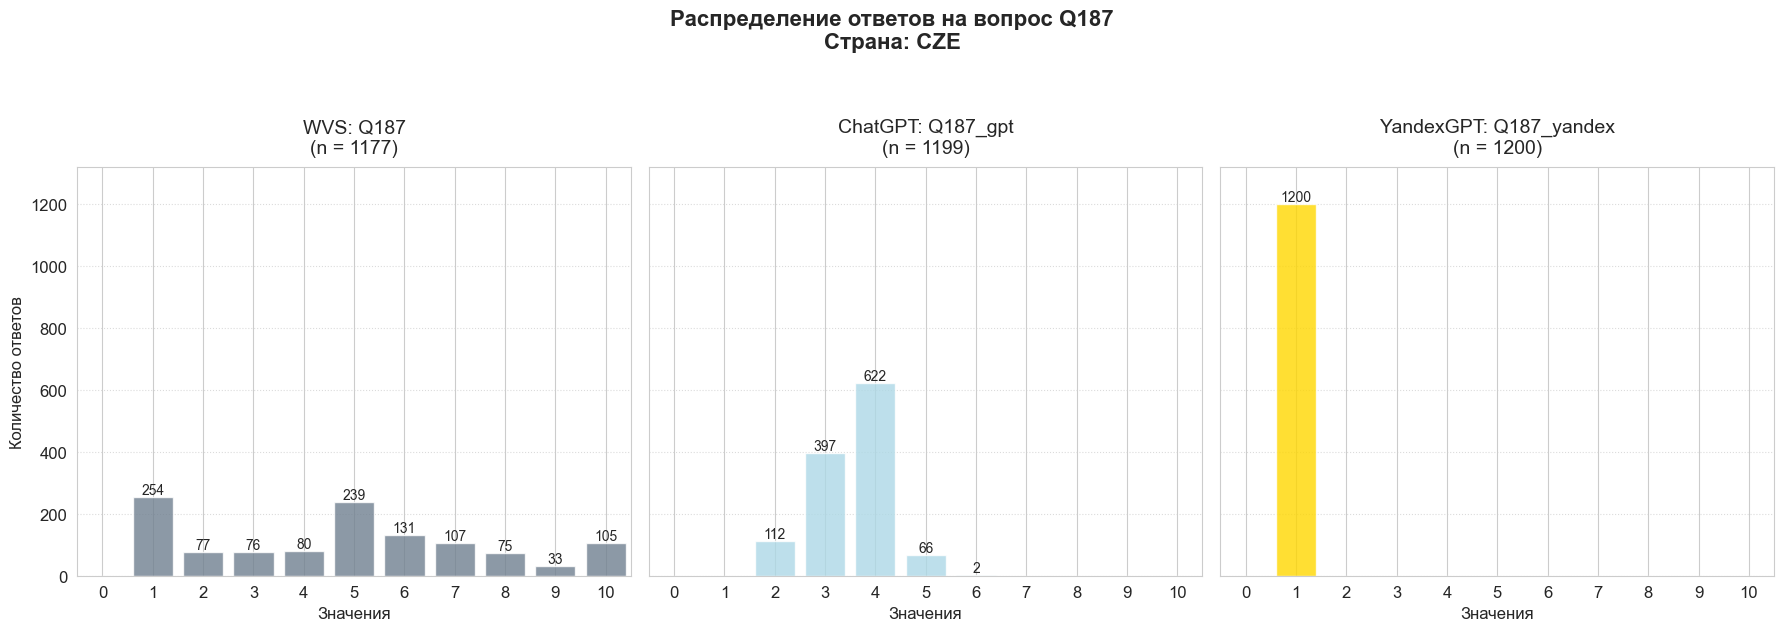

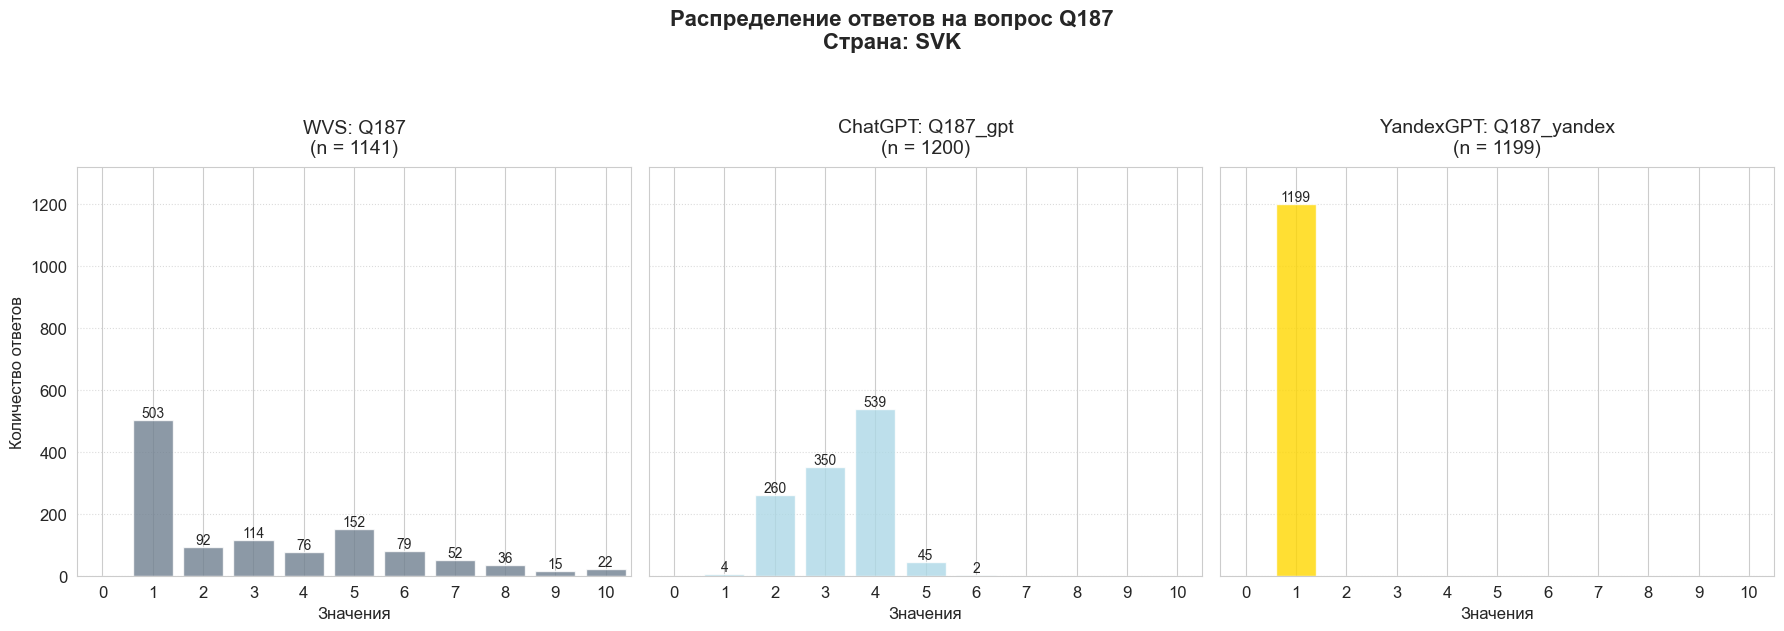

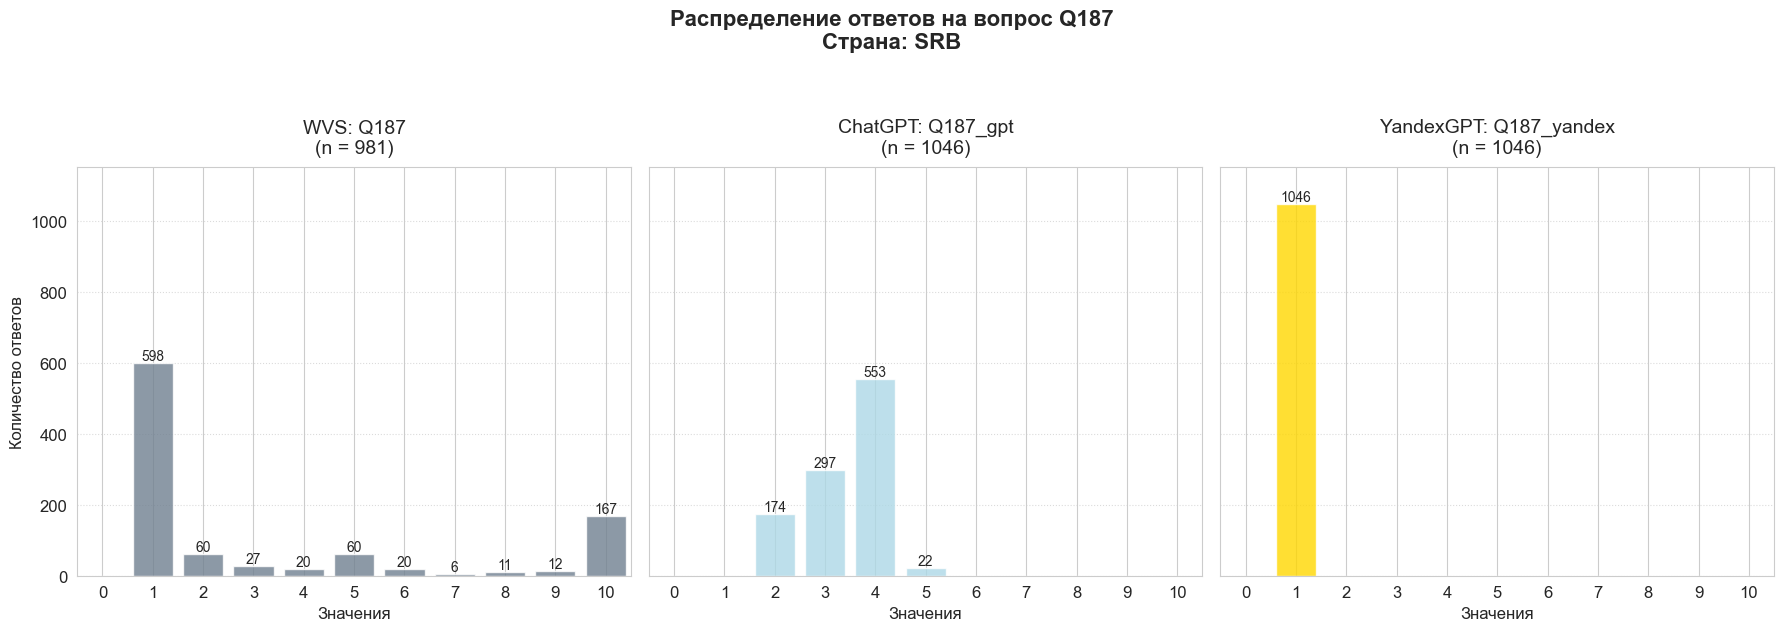

In [12]:
# East Europe
for country in east_eu:
    plot_question_by_country(df, question, country)

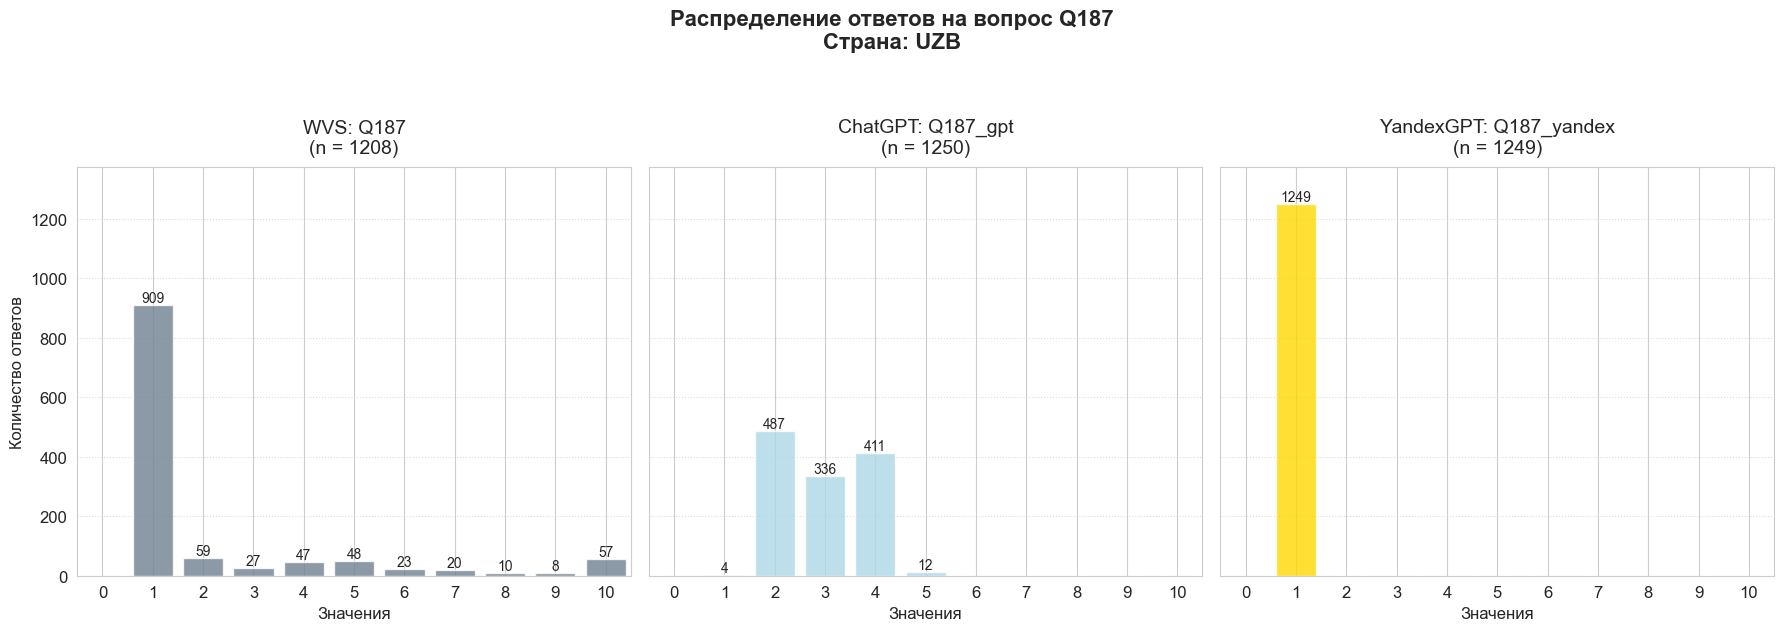

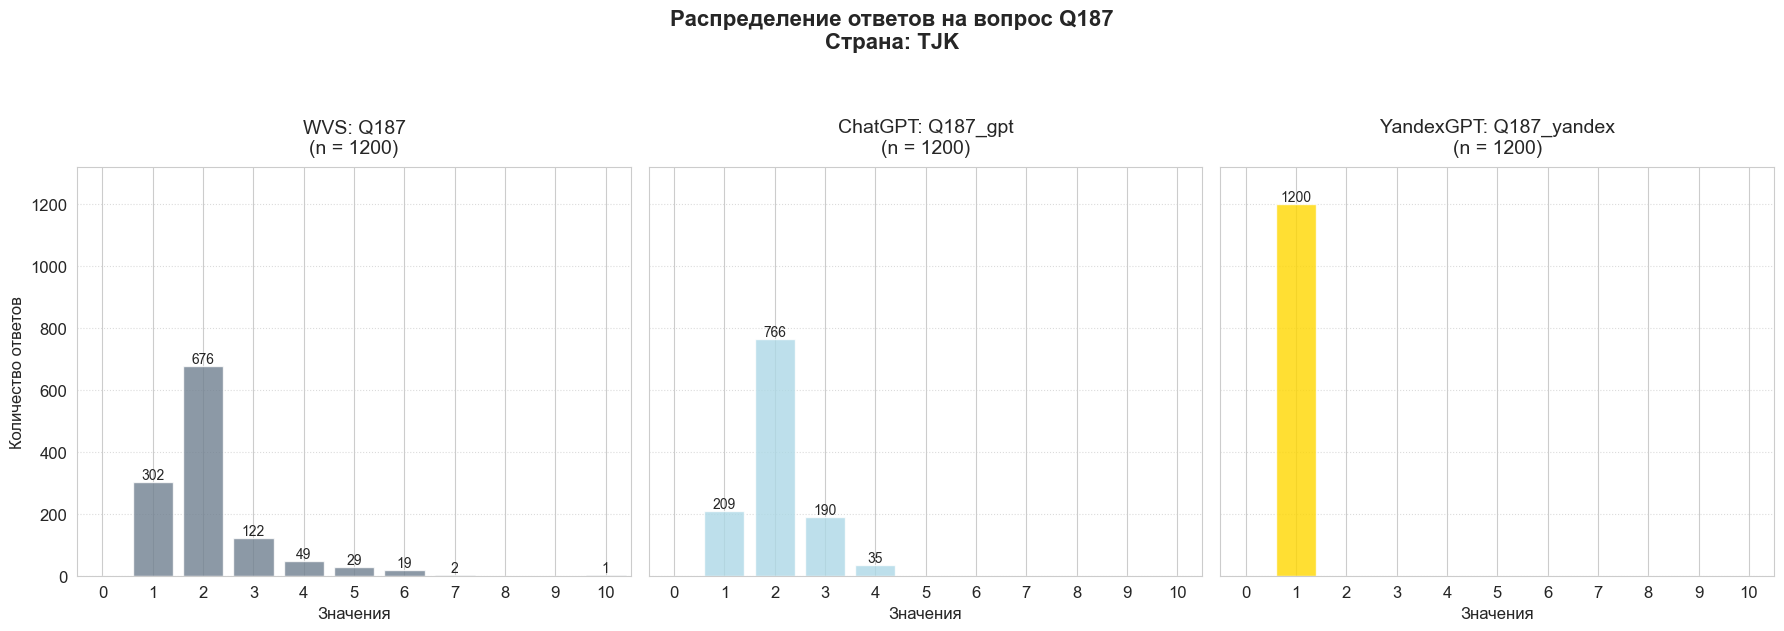

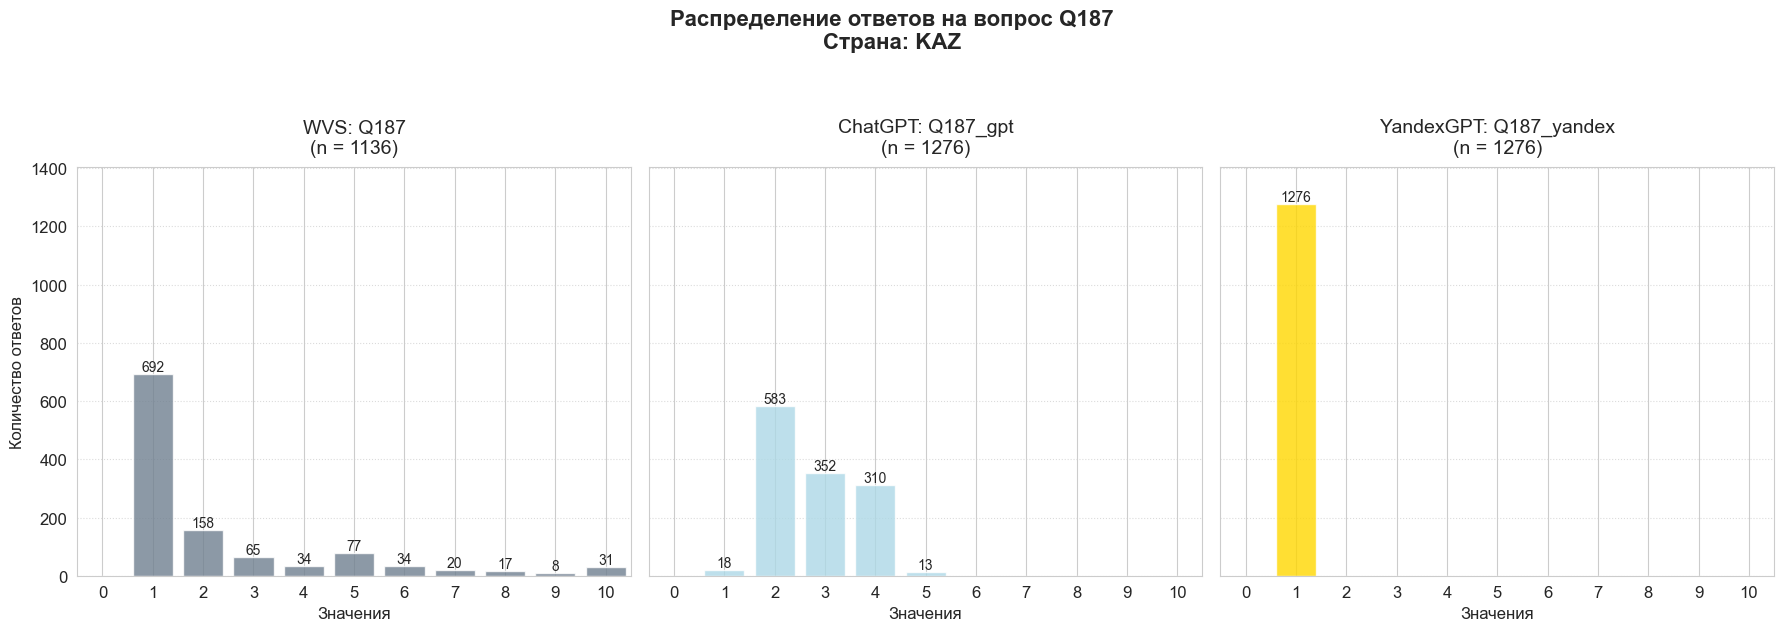

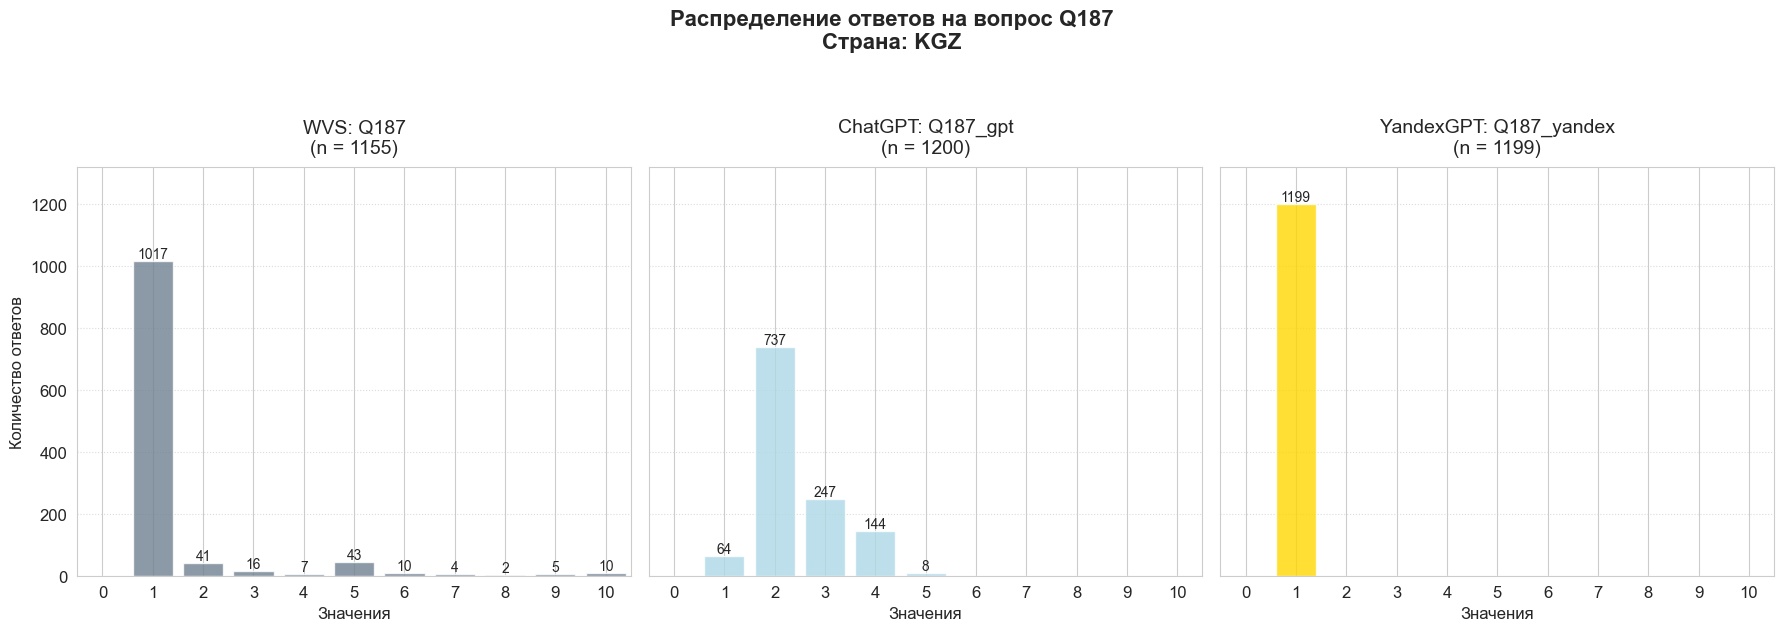

In [13]:
# Central Asia
for country in cent_asia:
    plot_question_by_country(df, question, country)

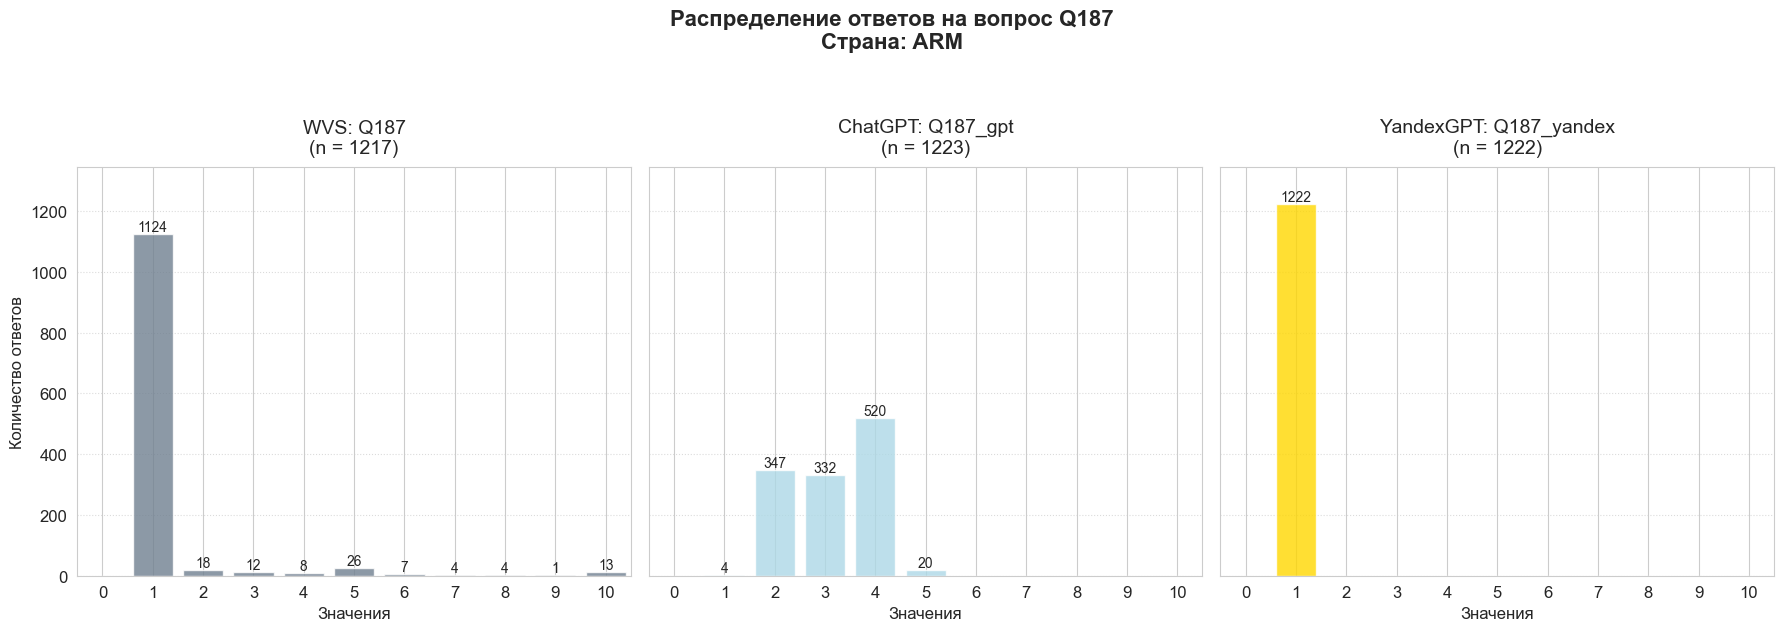

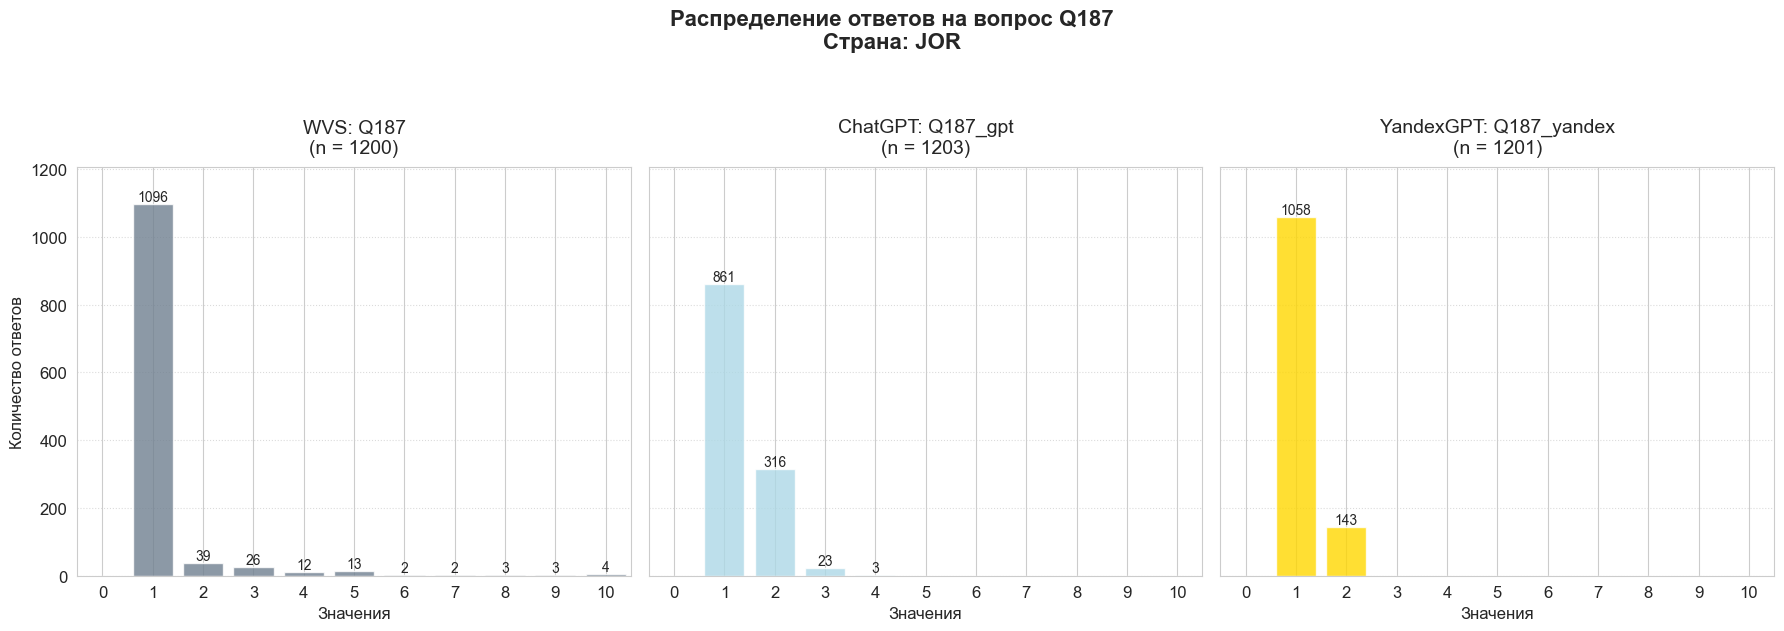

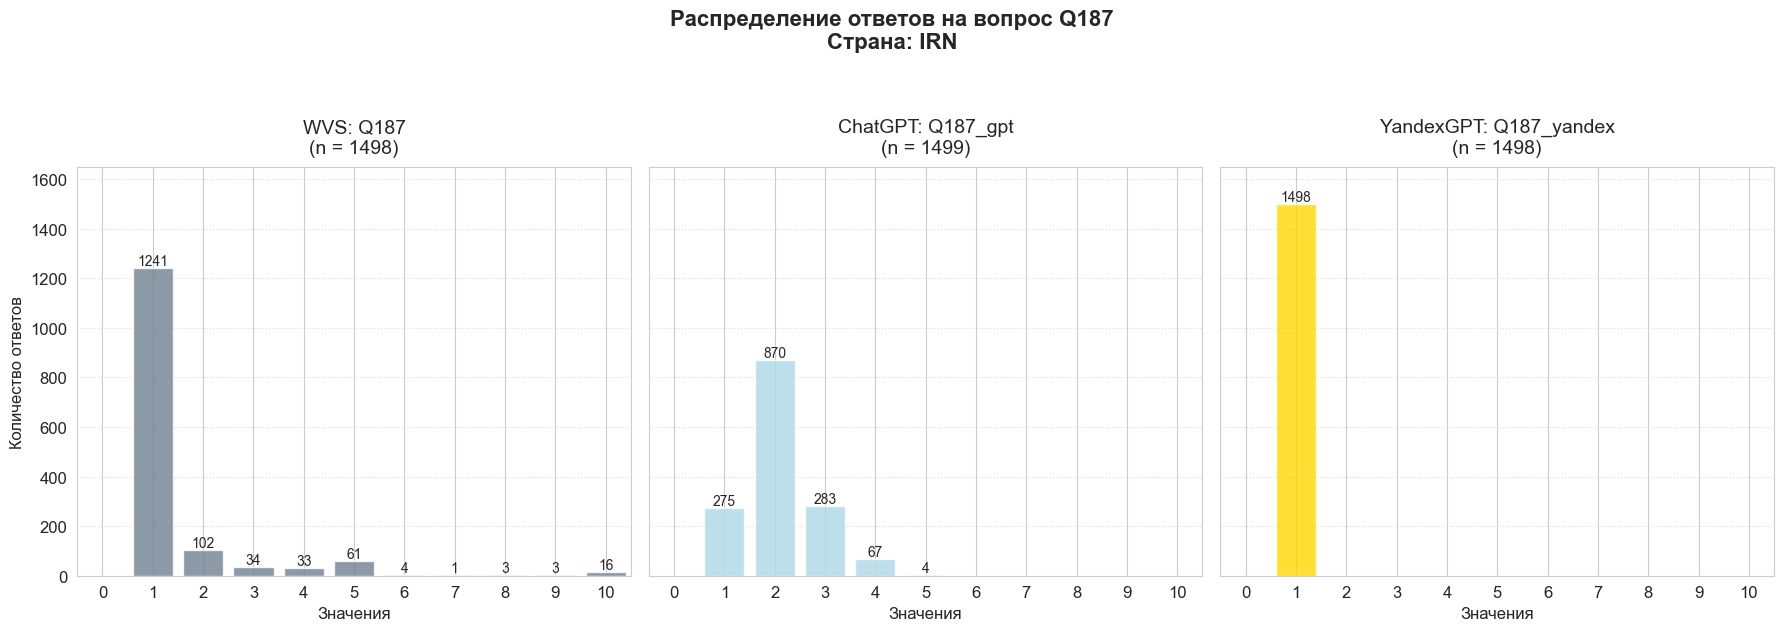

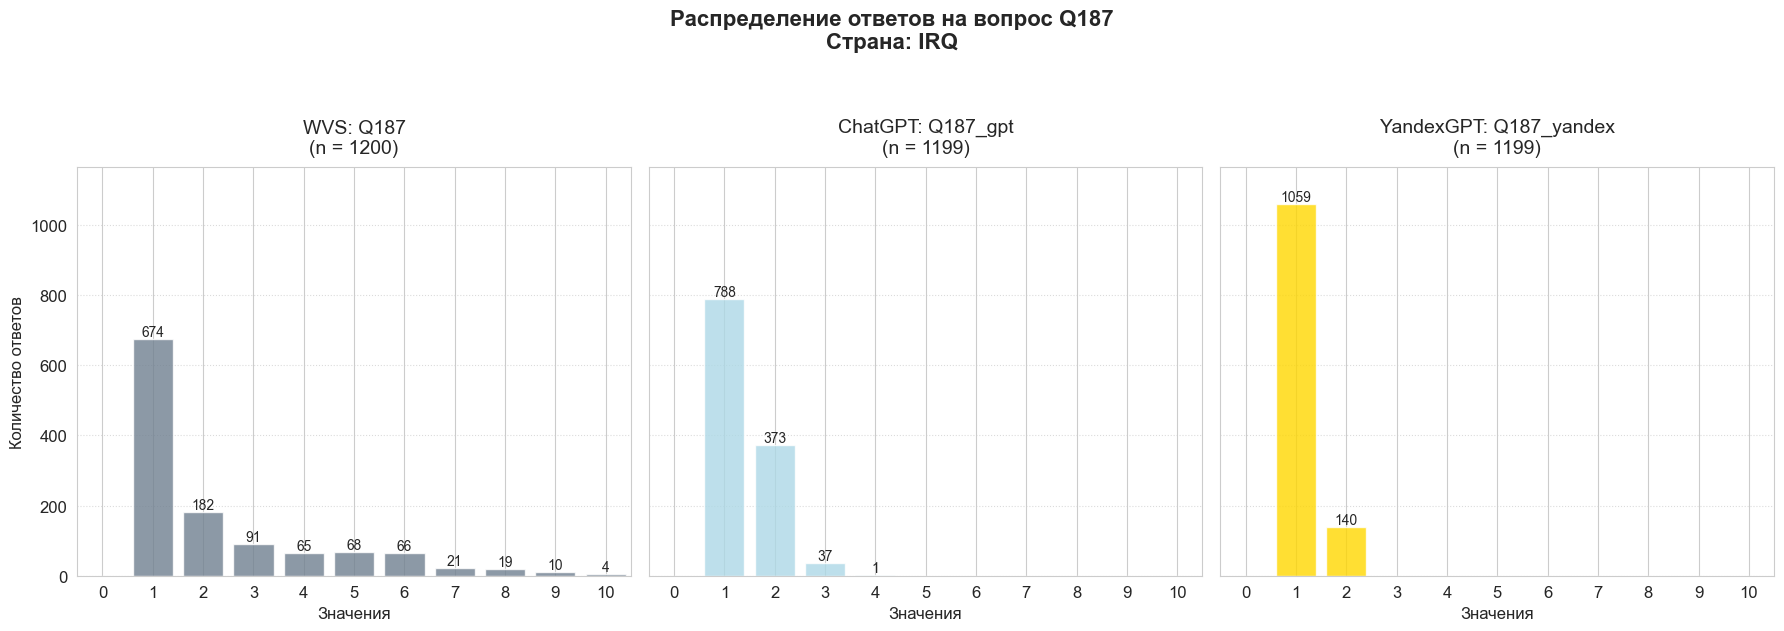

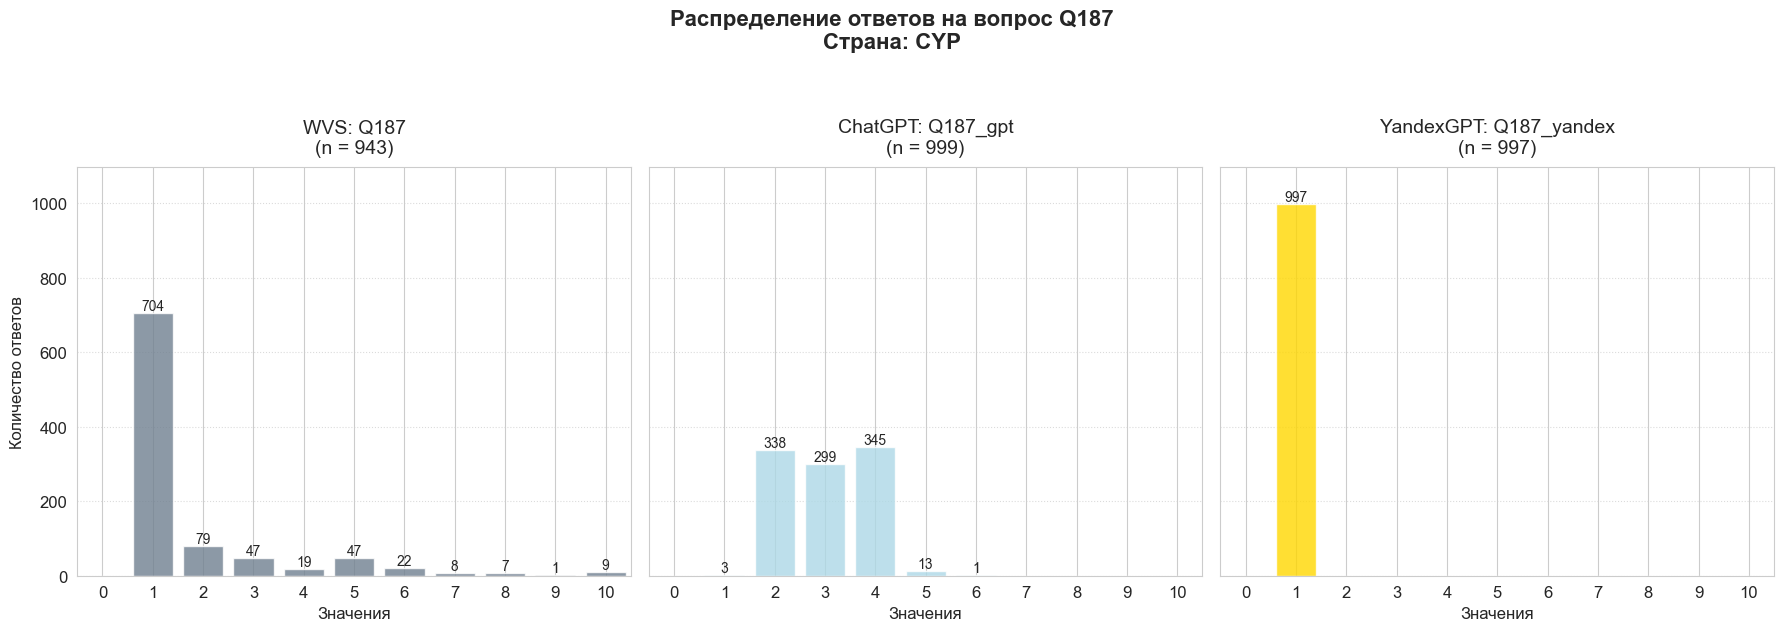

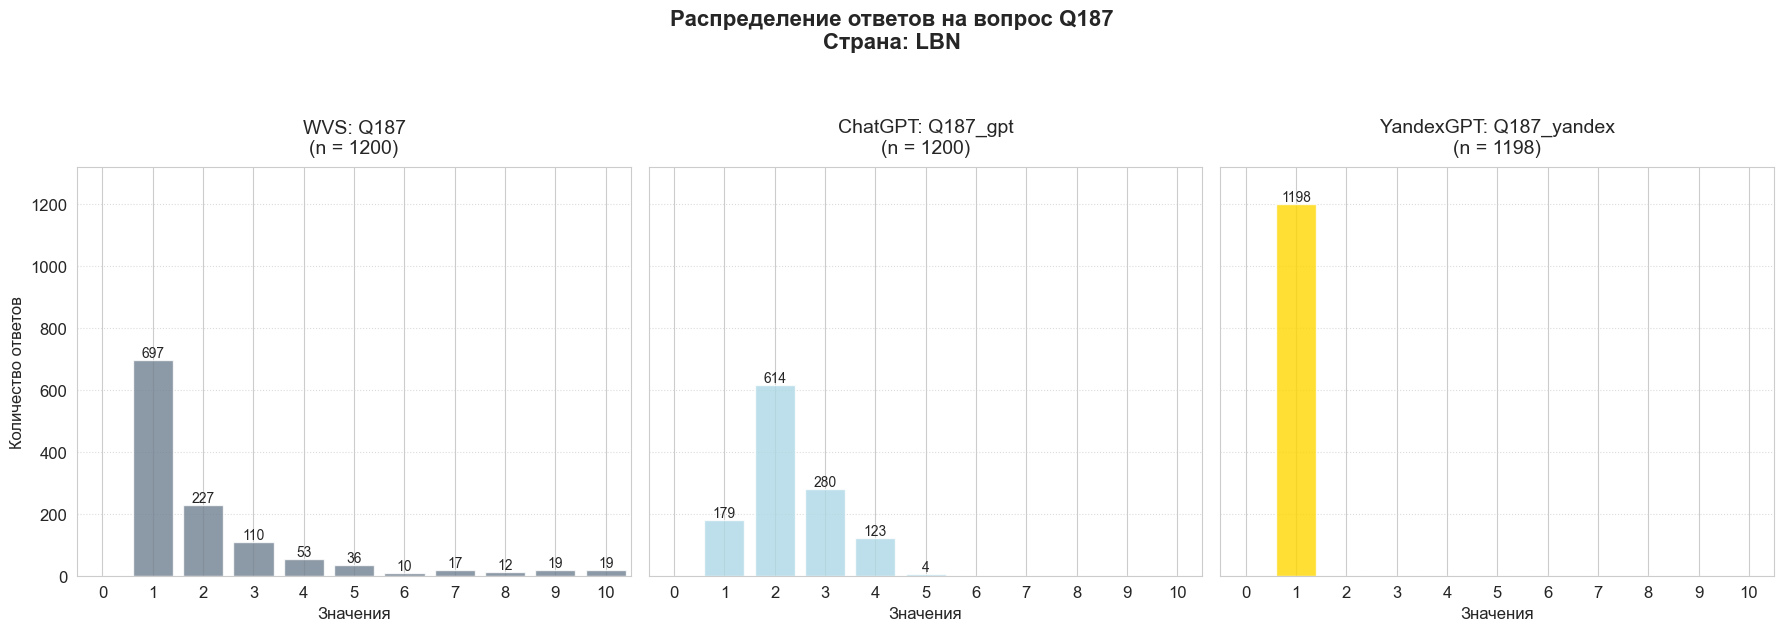

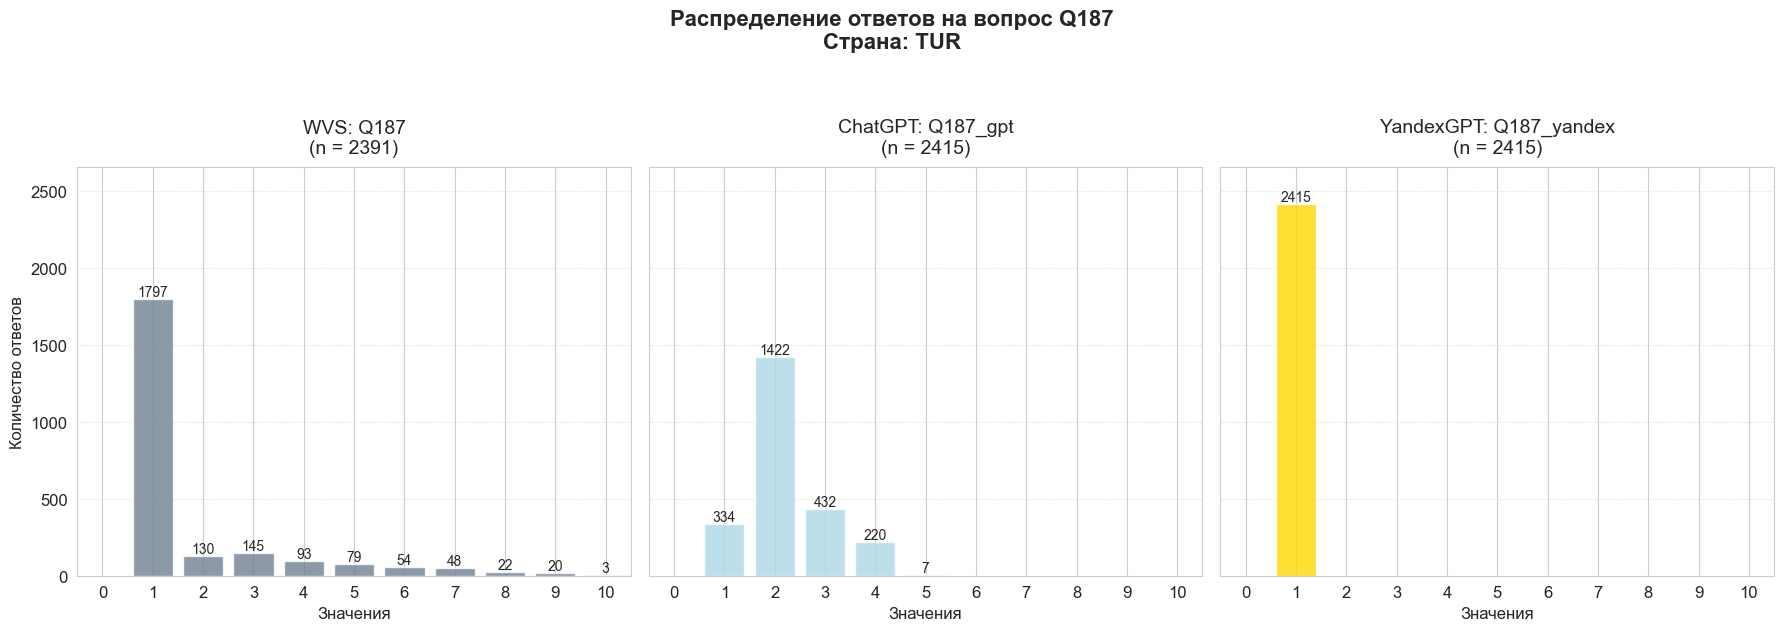

In [14]:
# Western Asia
for country in west_asia:
    plot_question_by_country(df, question, country)

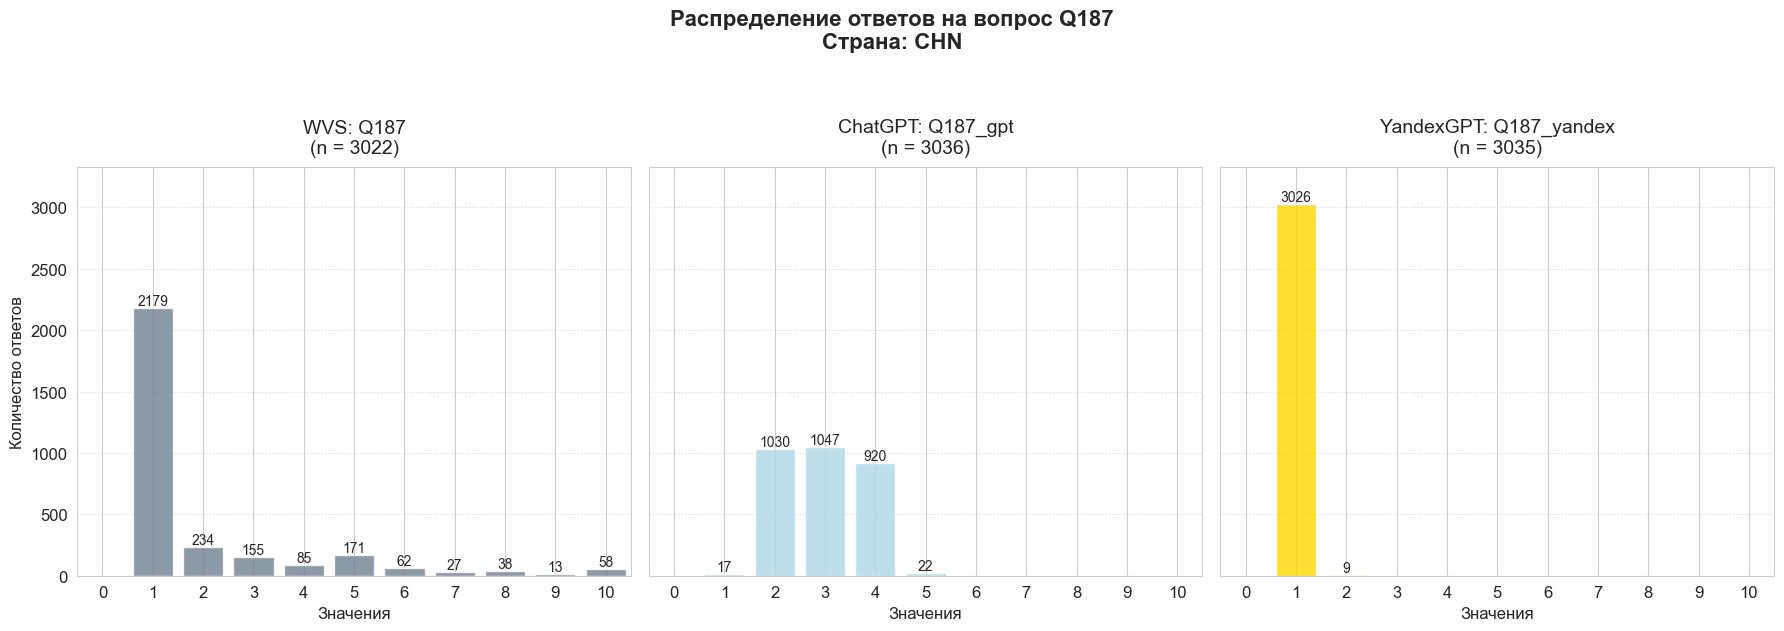

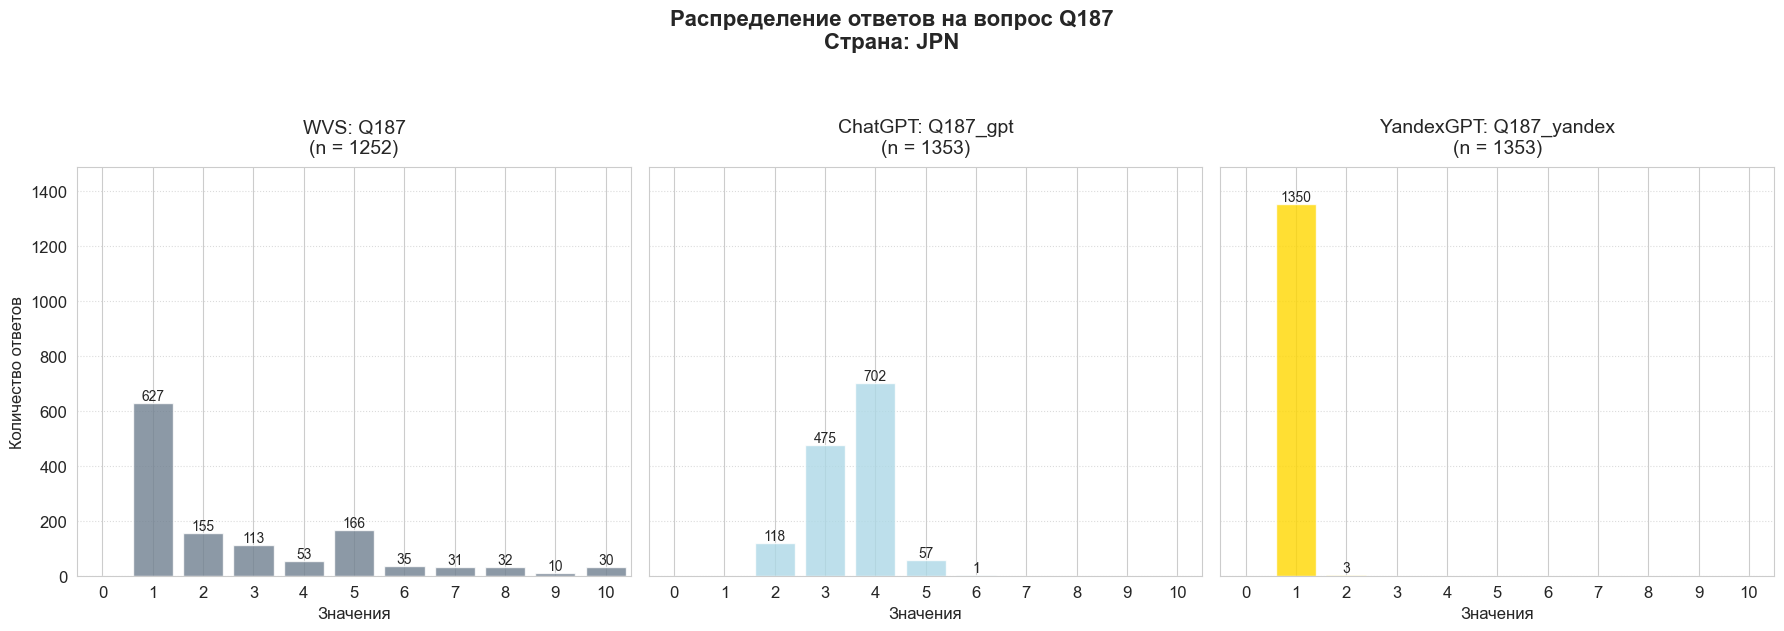

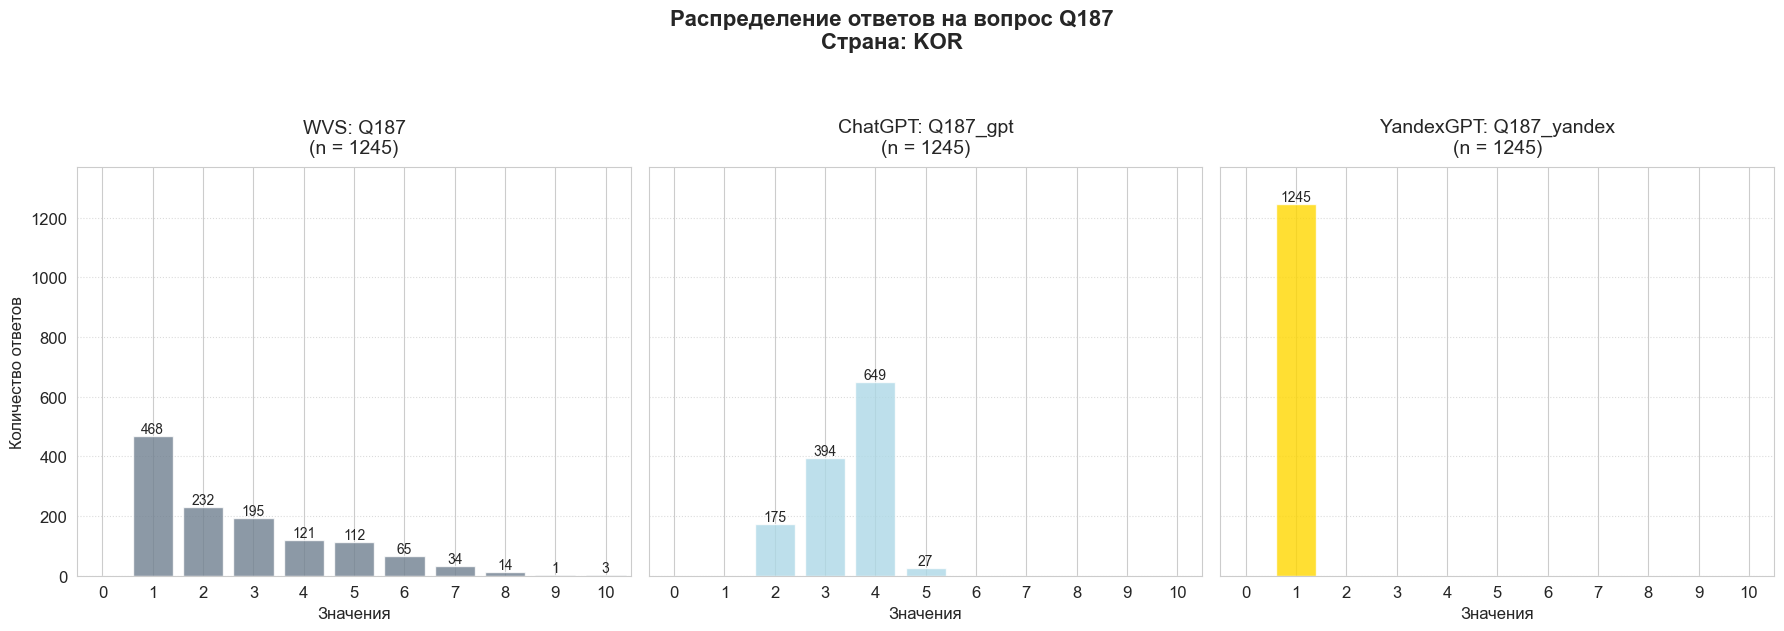

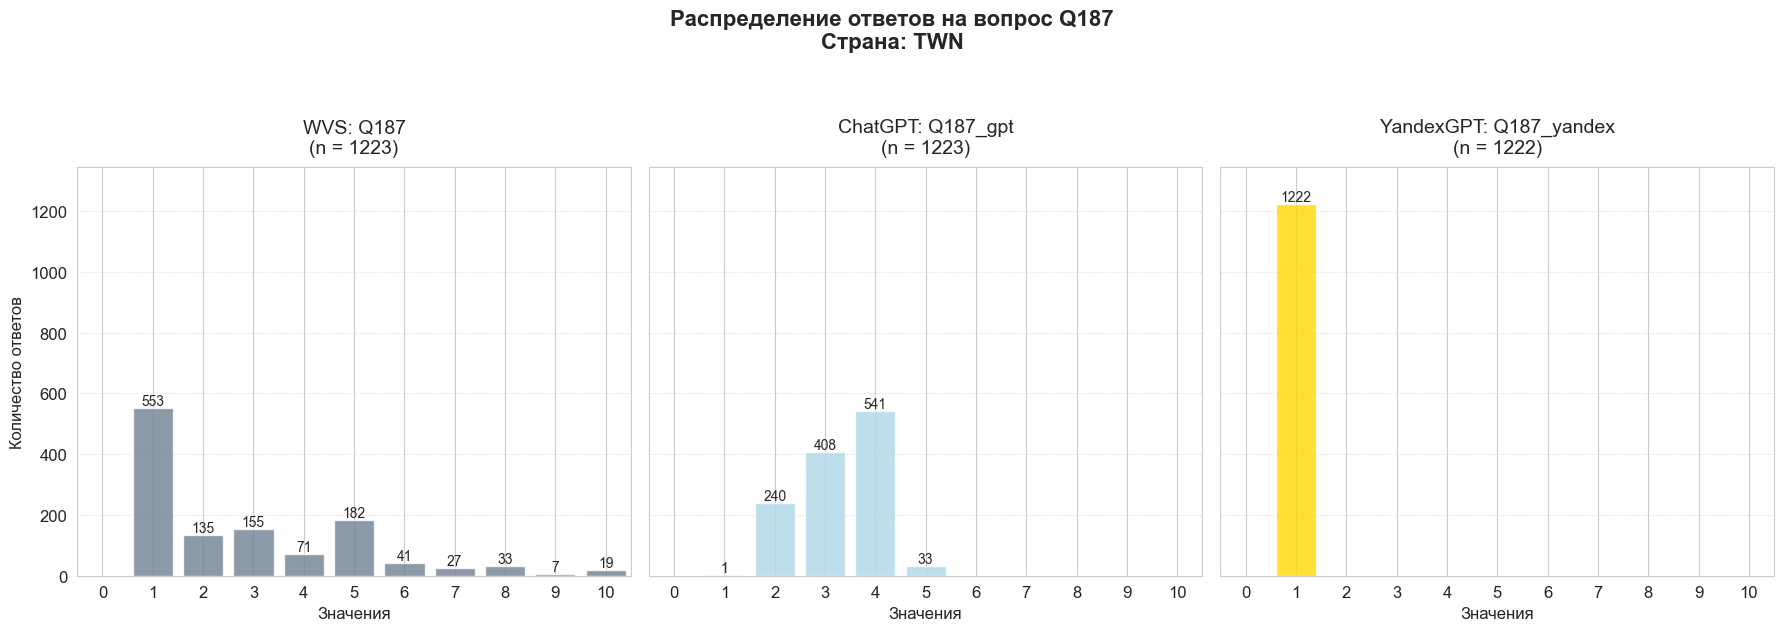

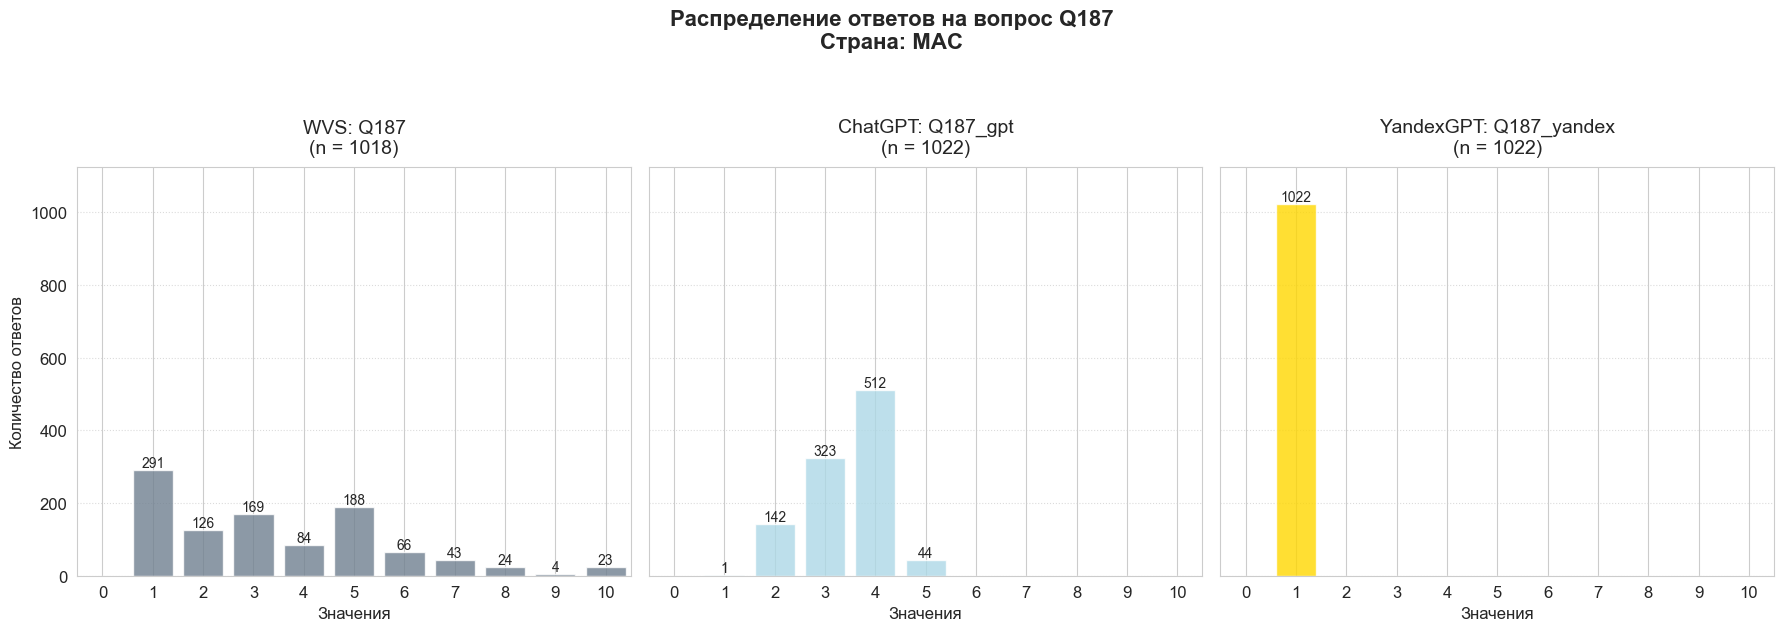

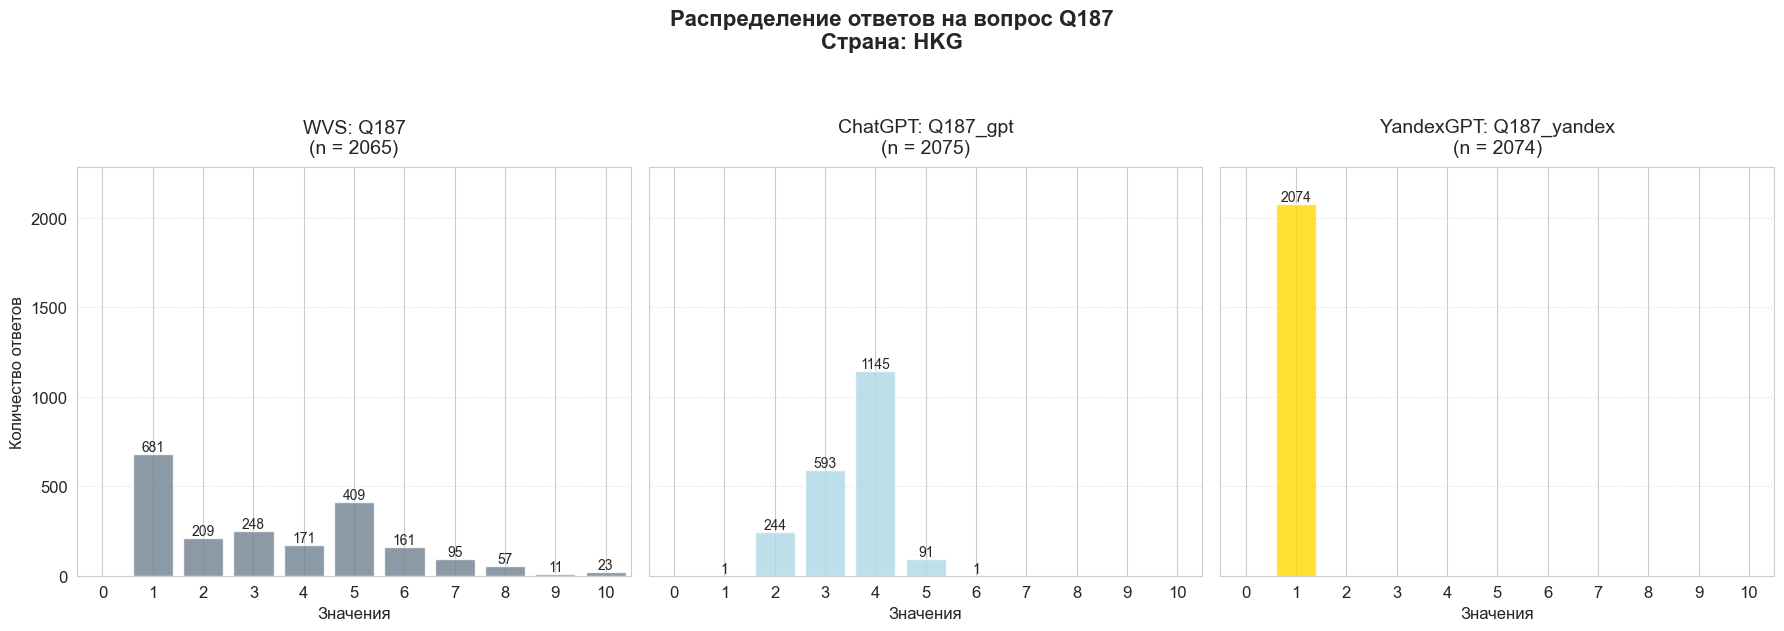

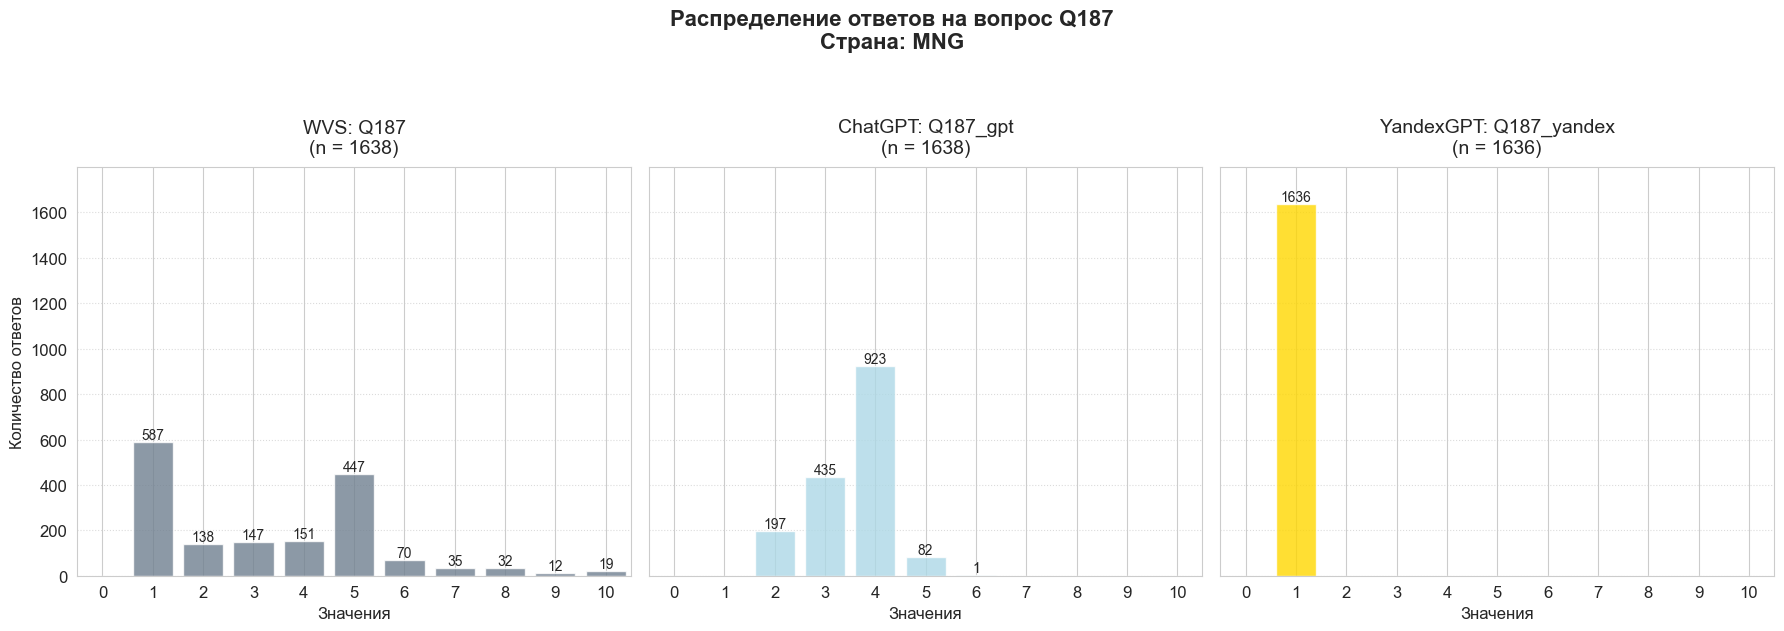

In [15]:
# East Asia
for country in east_asia:
    plot_question_by_country(df, question, country)

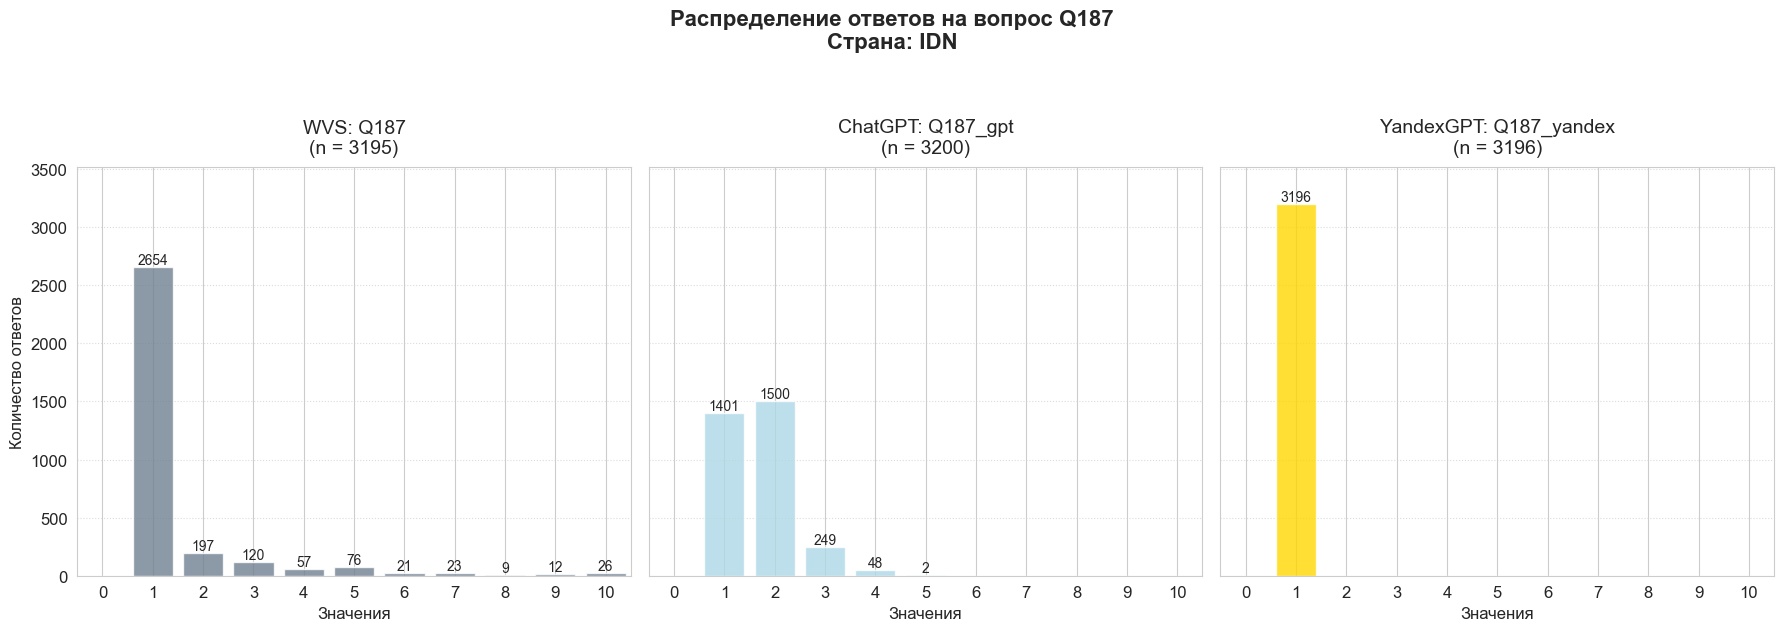

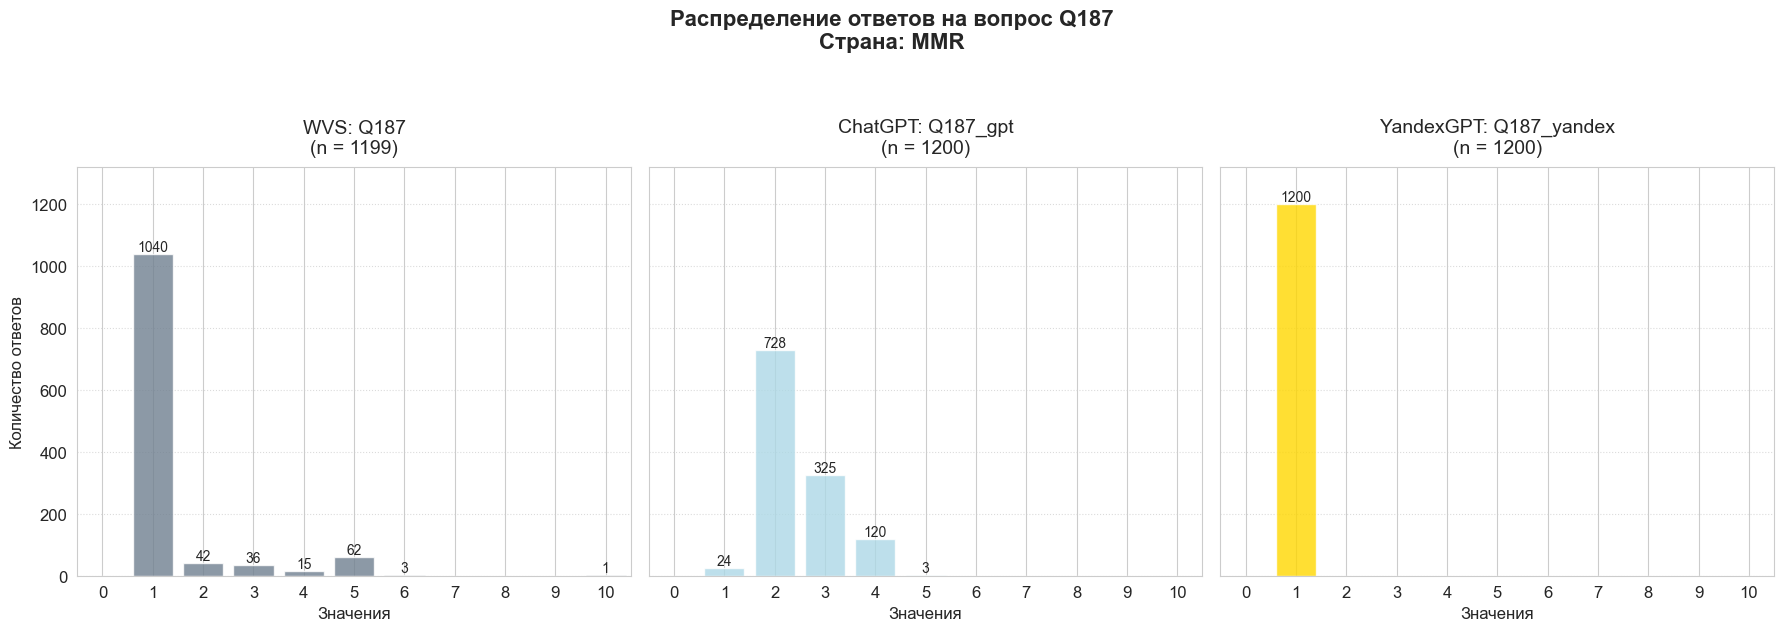

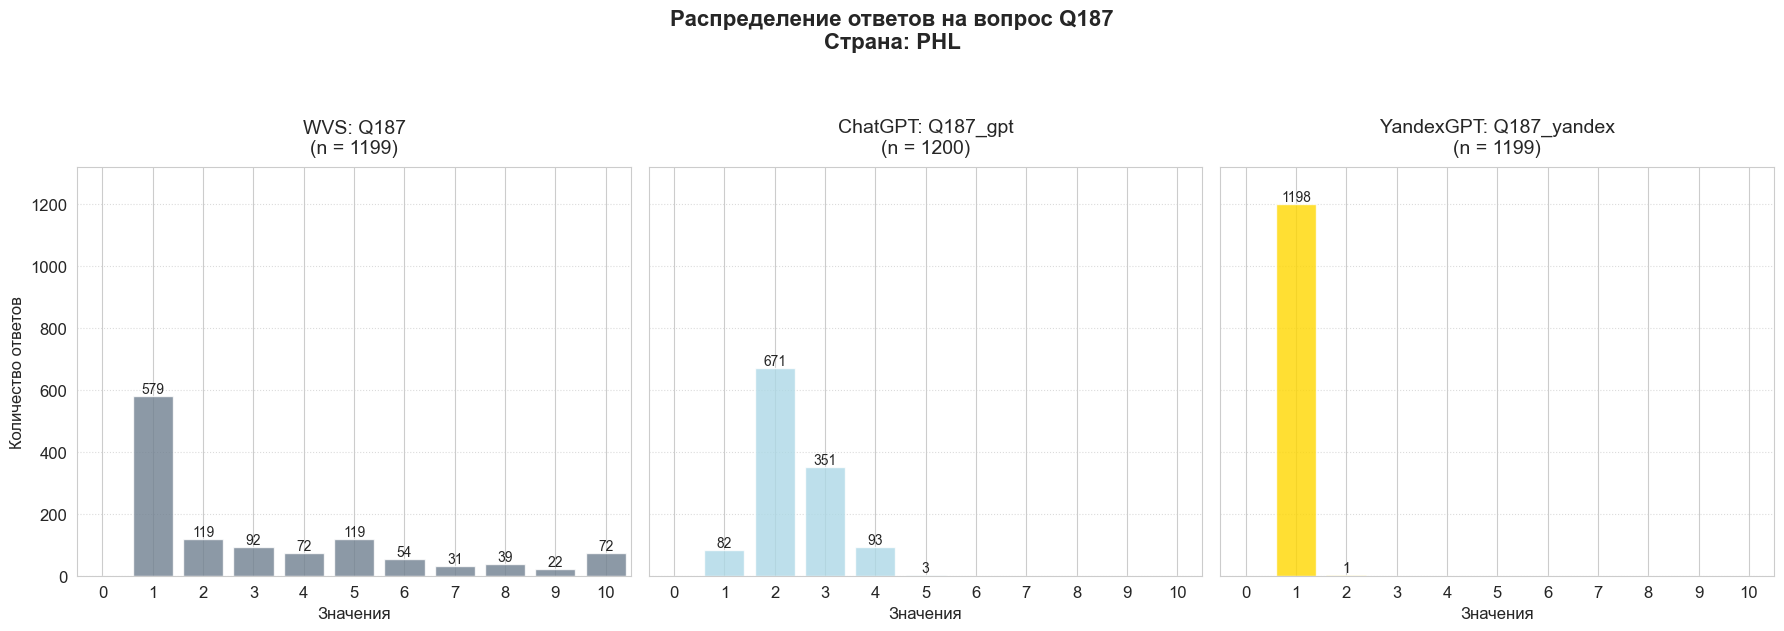

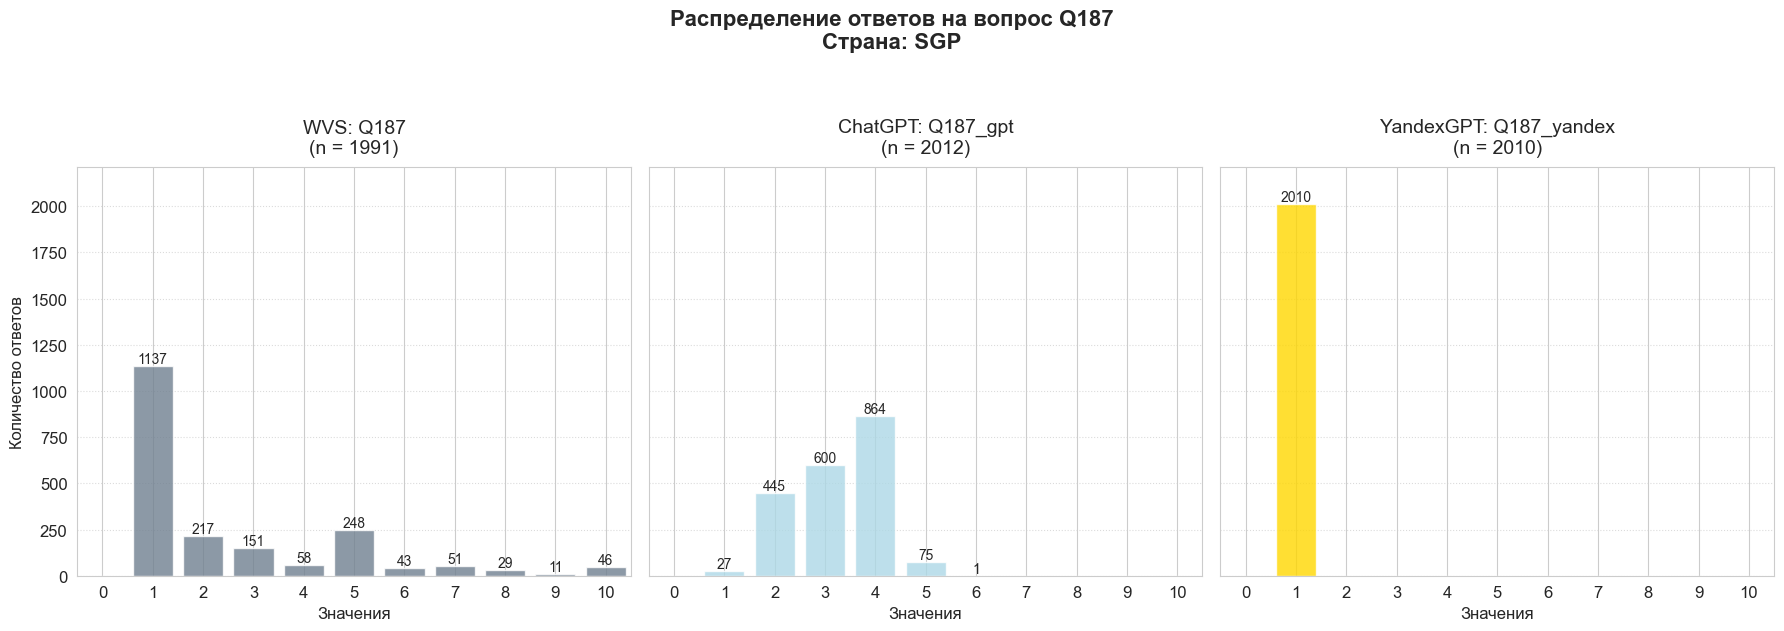

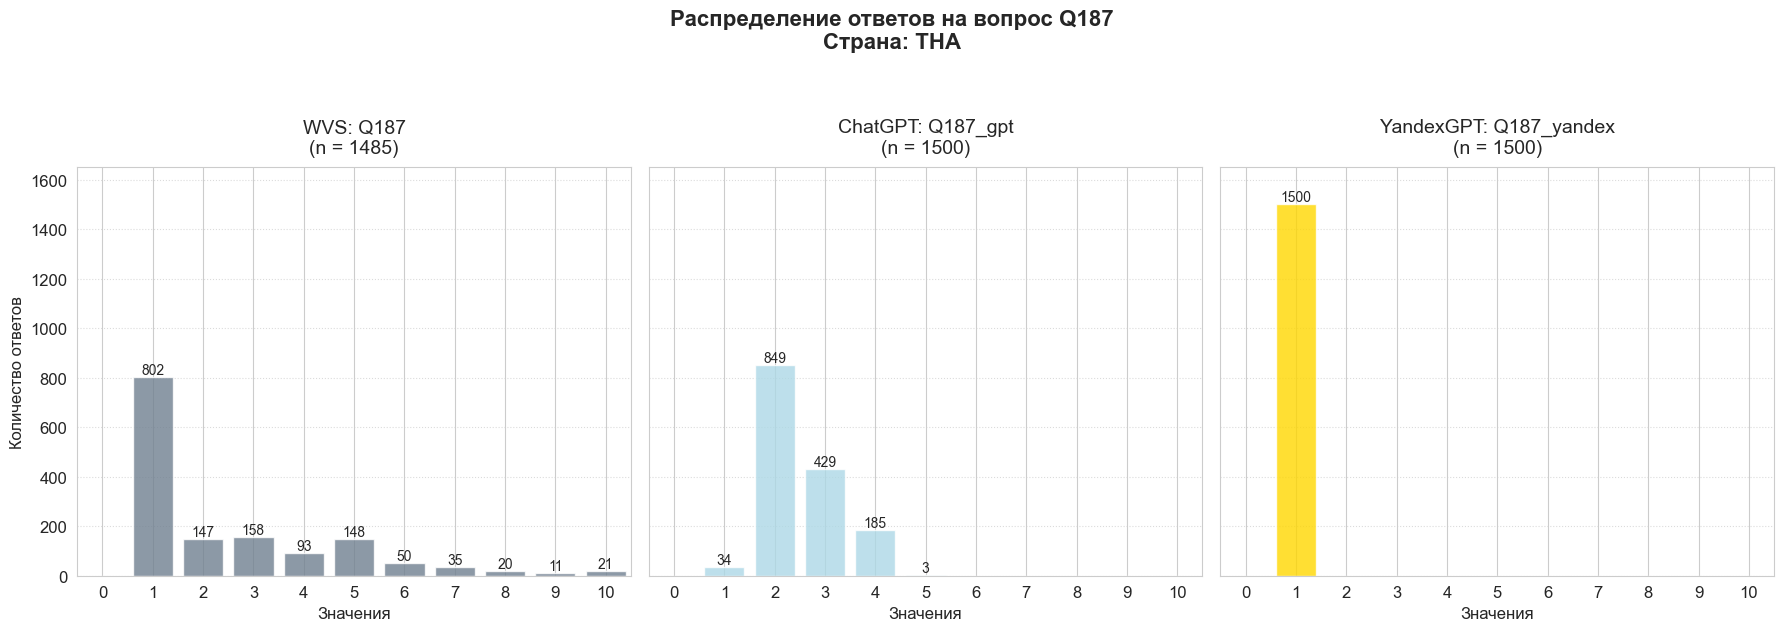

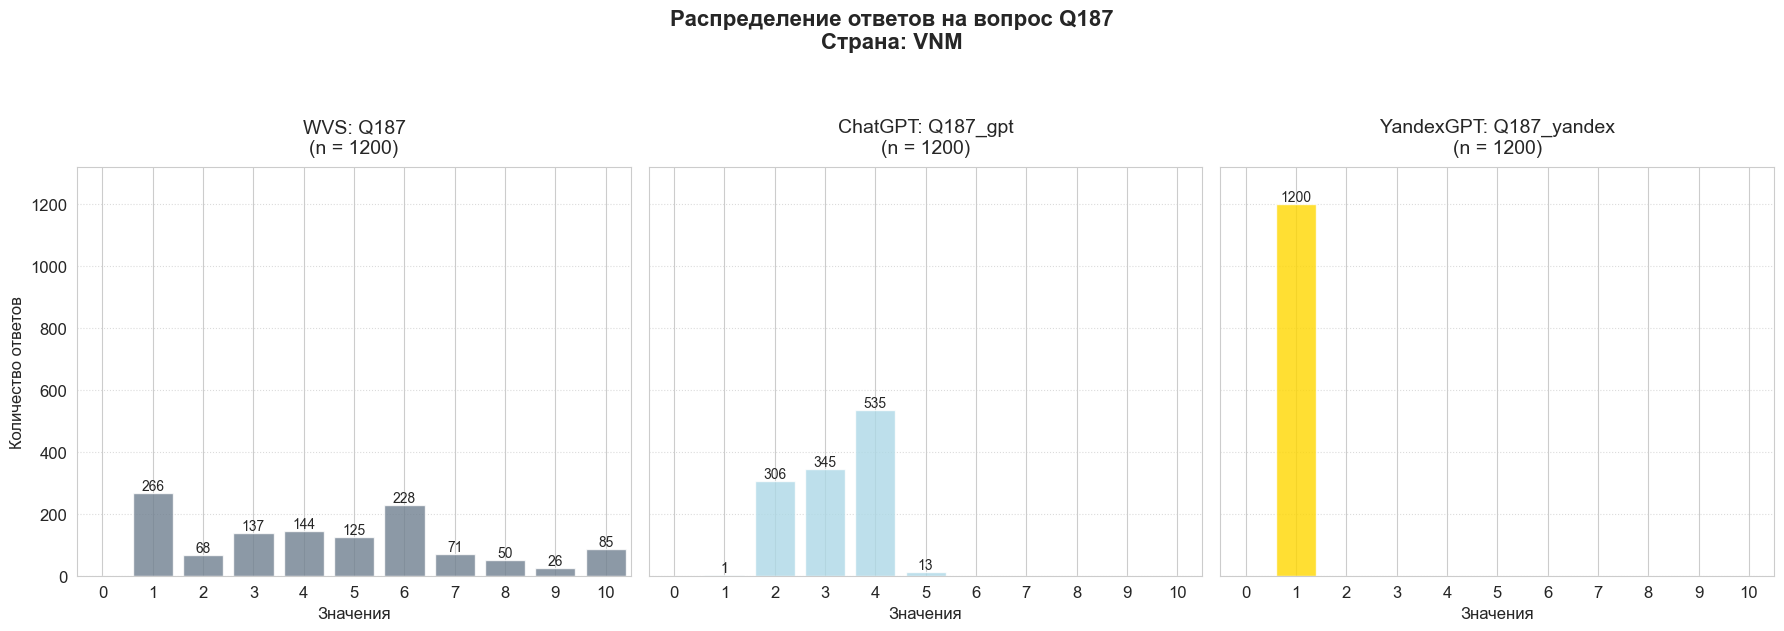

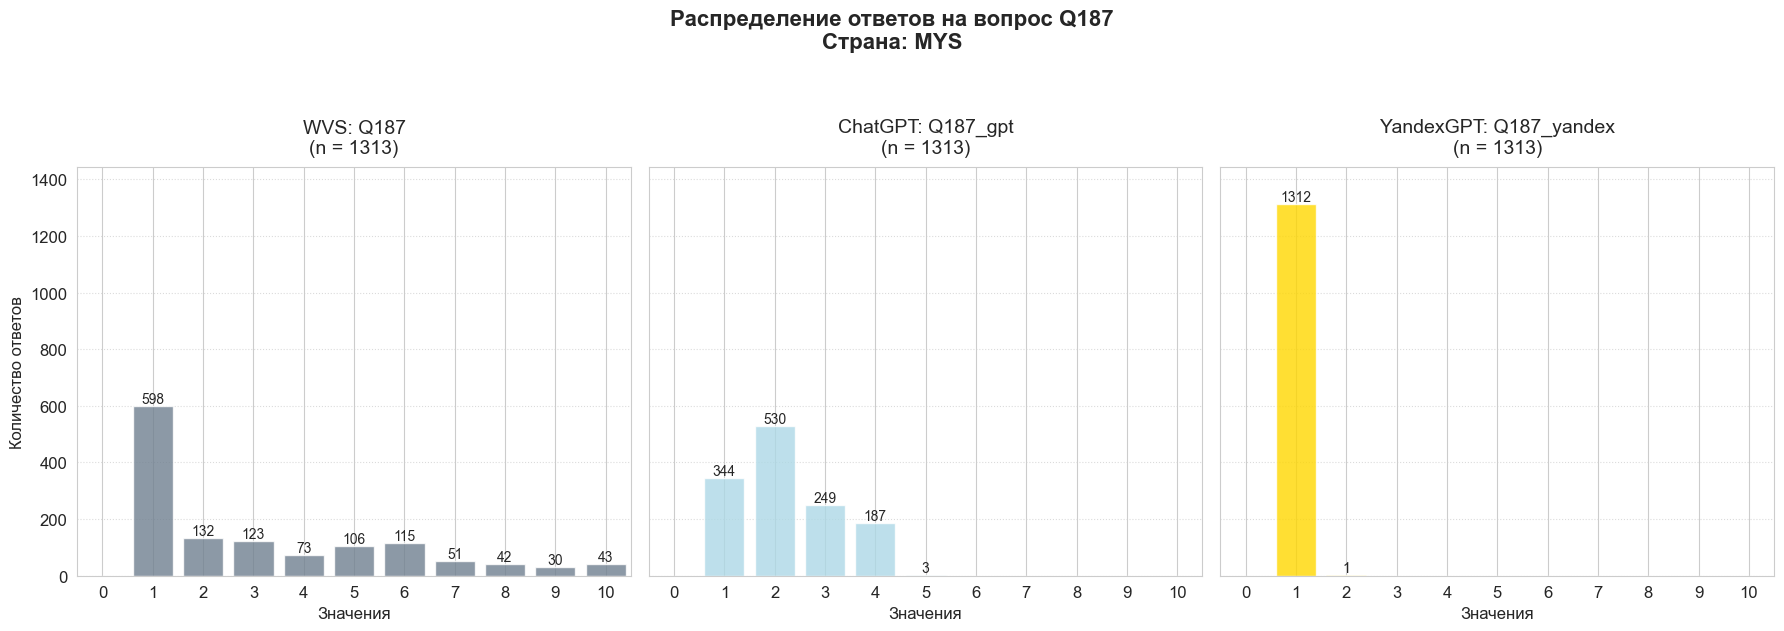

In [16]:
# South-East Asia
for country in south_east_asia:
    plot_question_by_country(df, question, country)

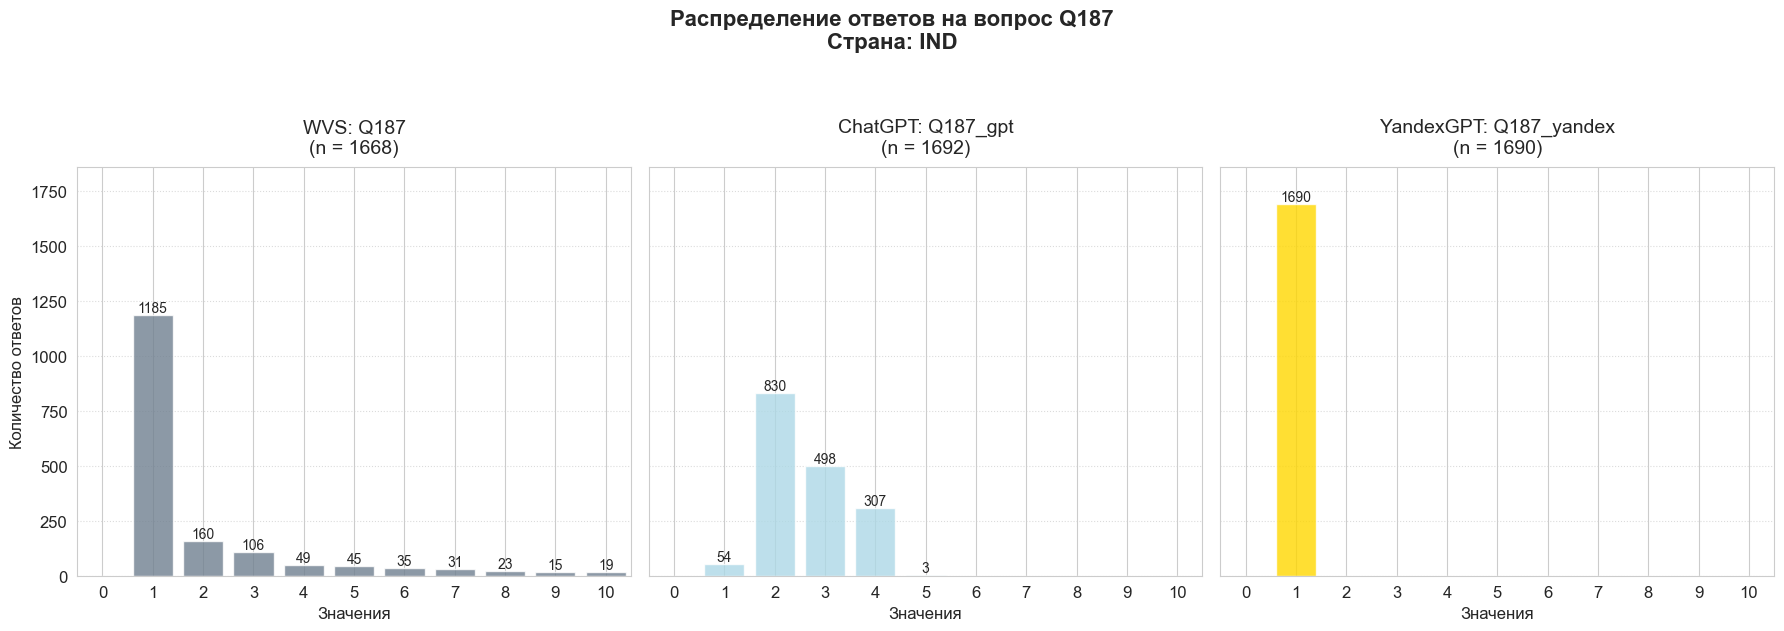

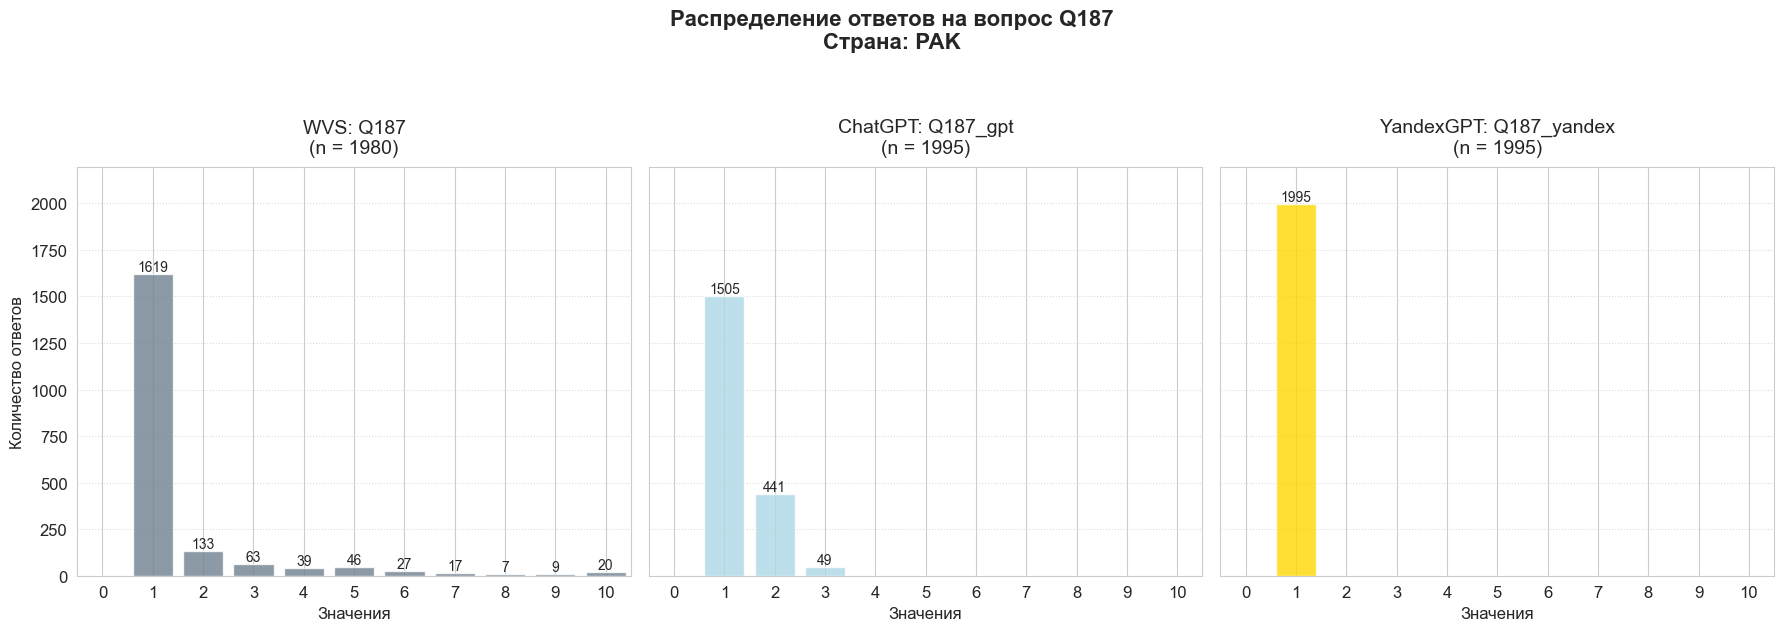

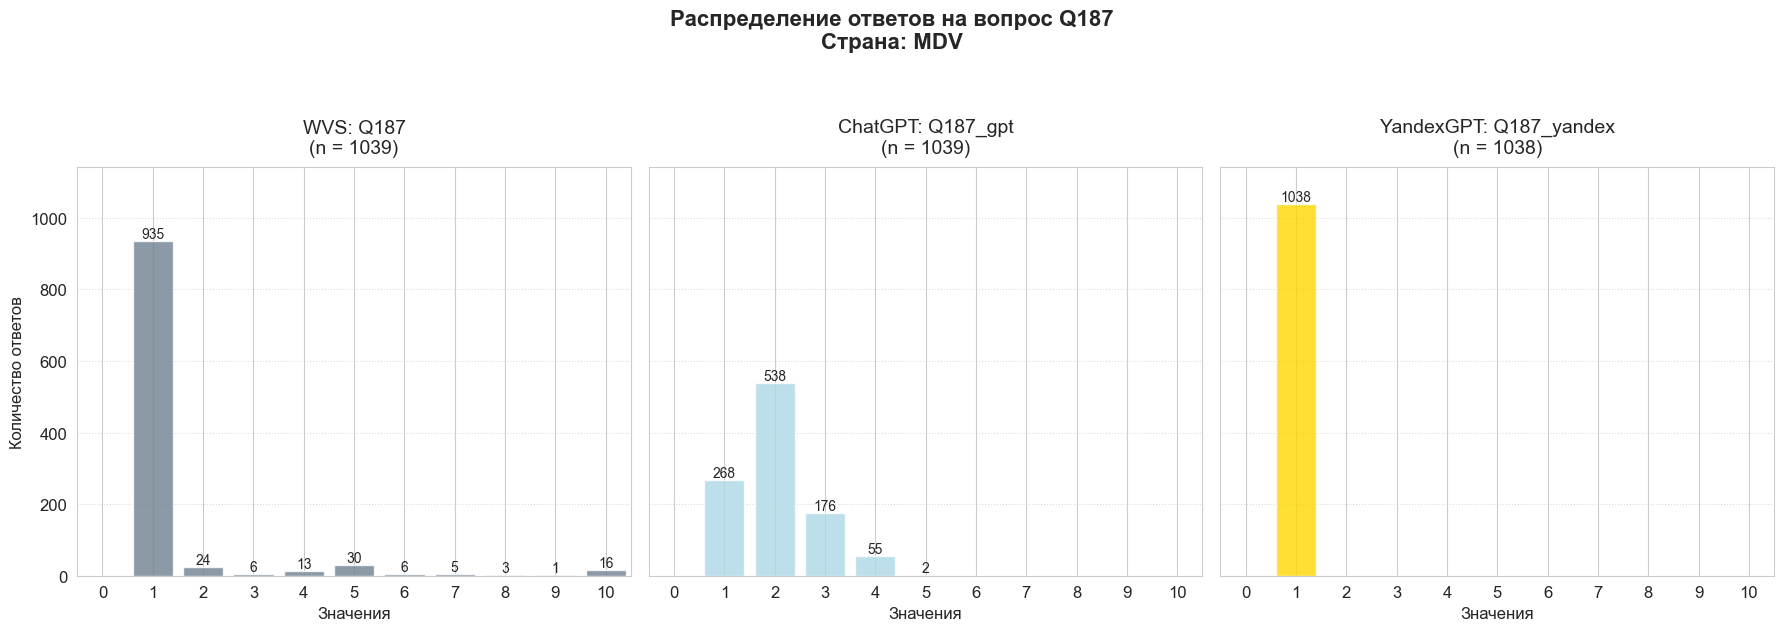

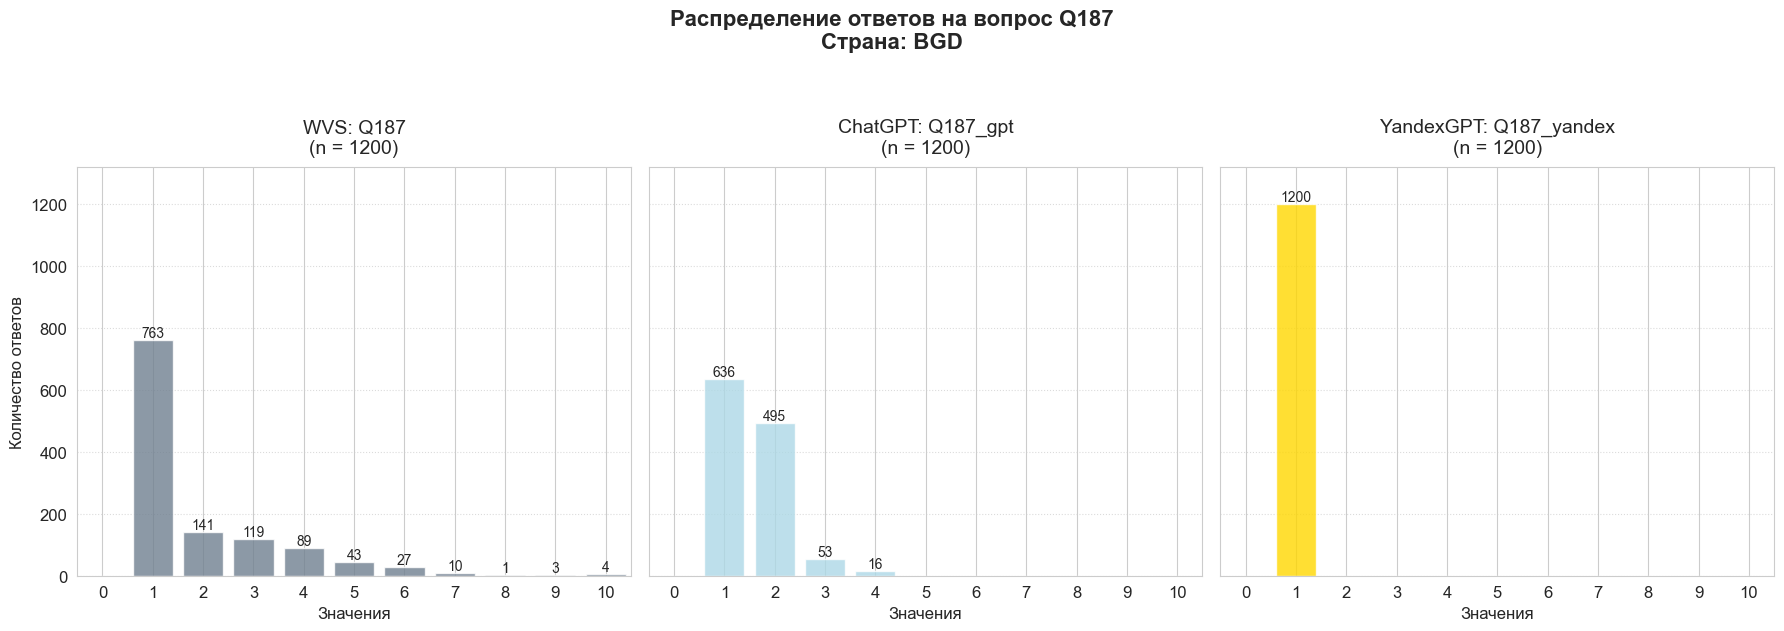

In [17]:
# South Asia
for country in south_asia:
    plot_question_by_country(df, question, country)

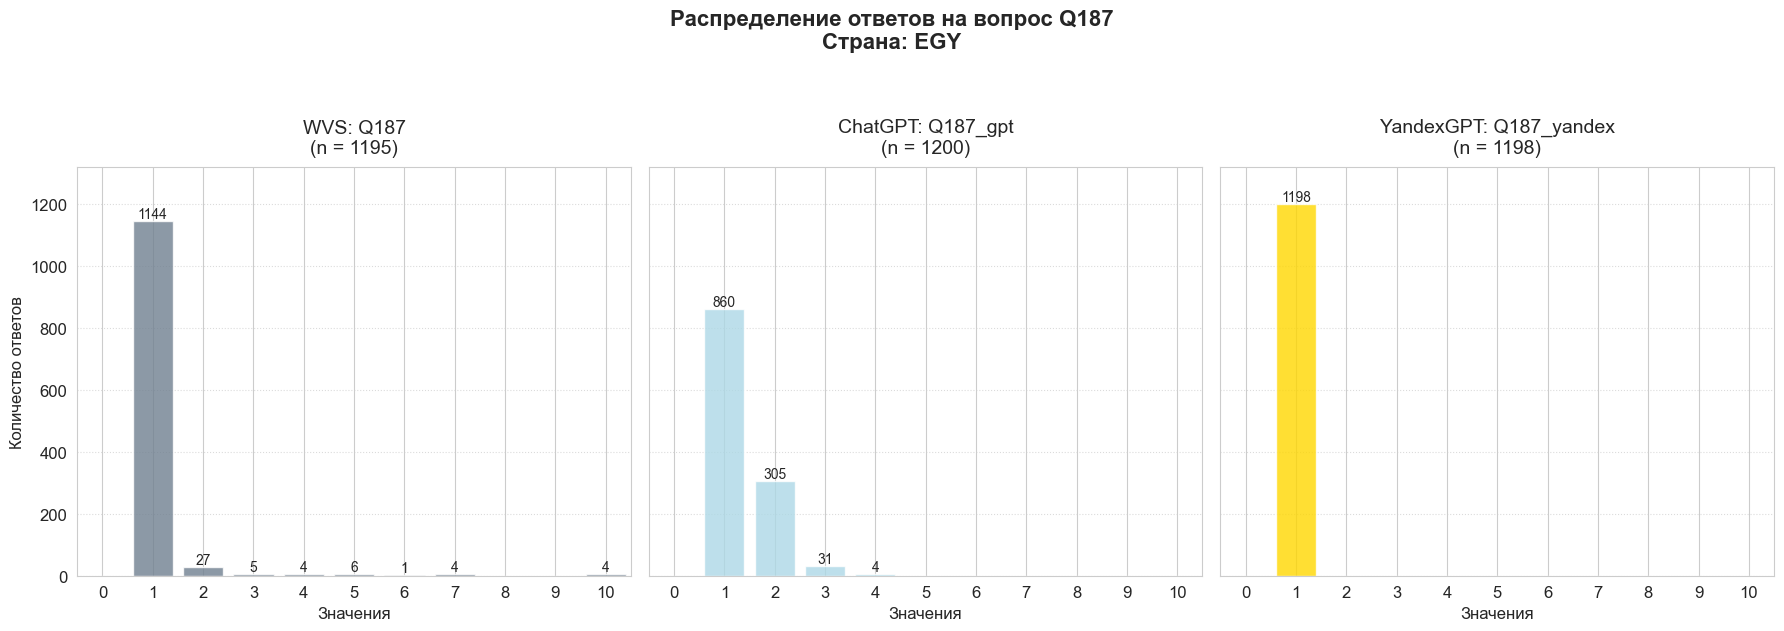

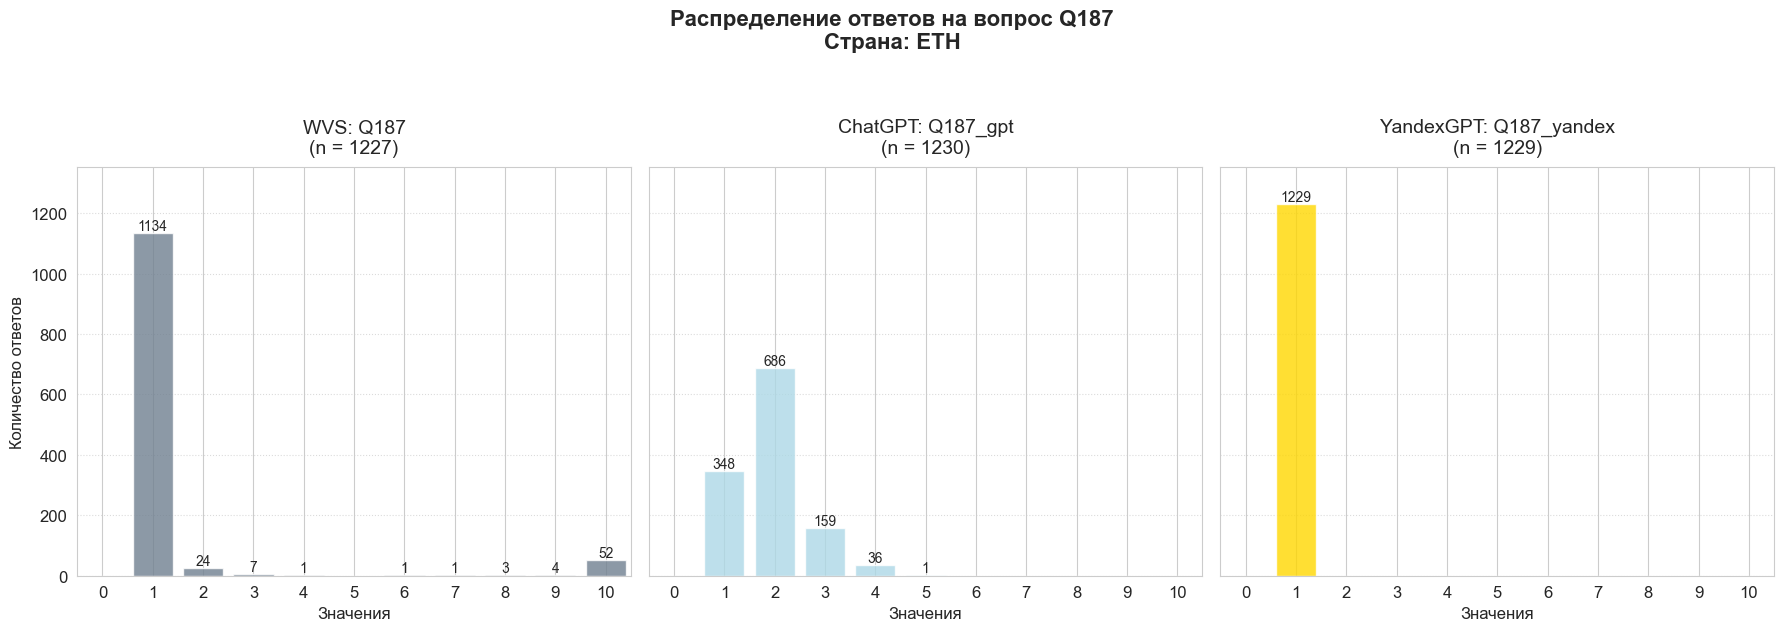

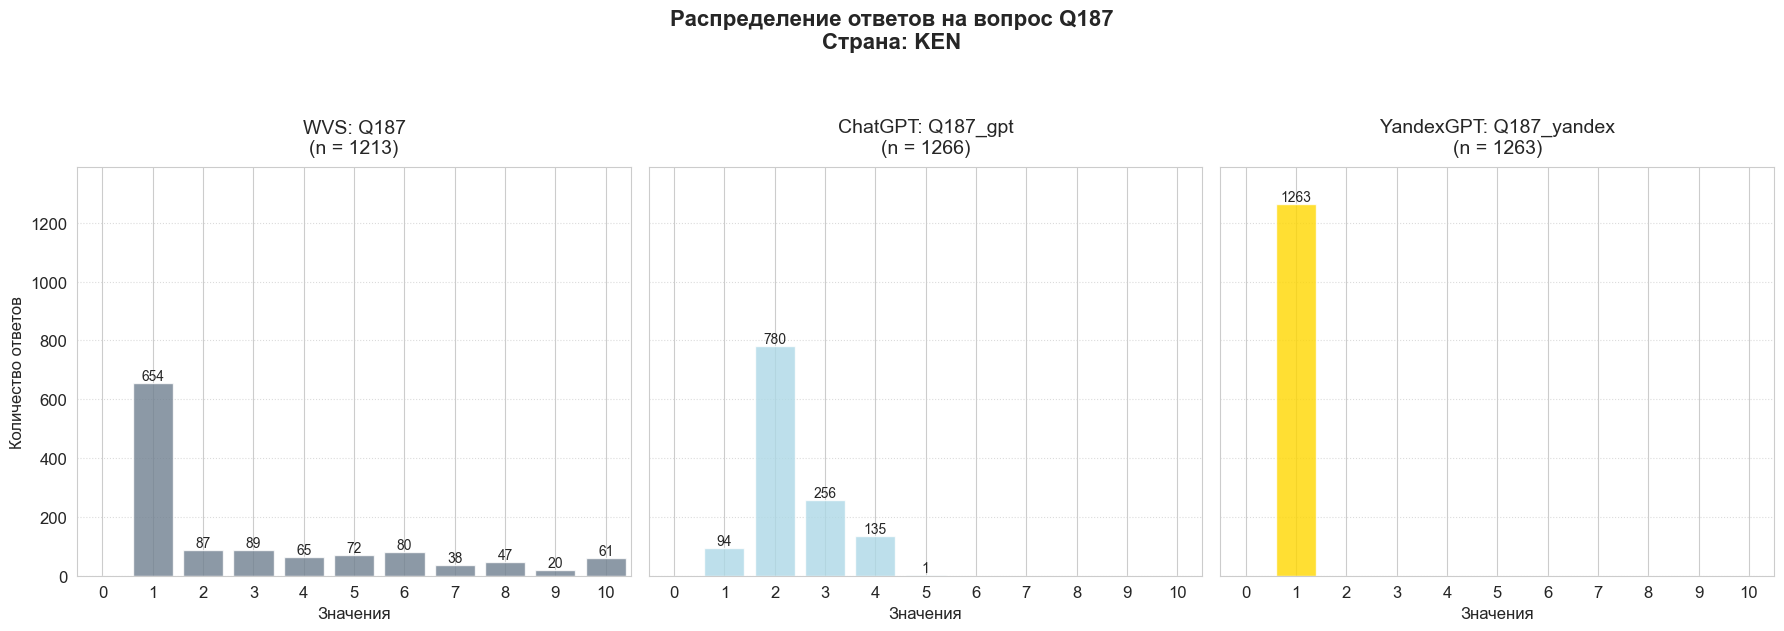

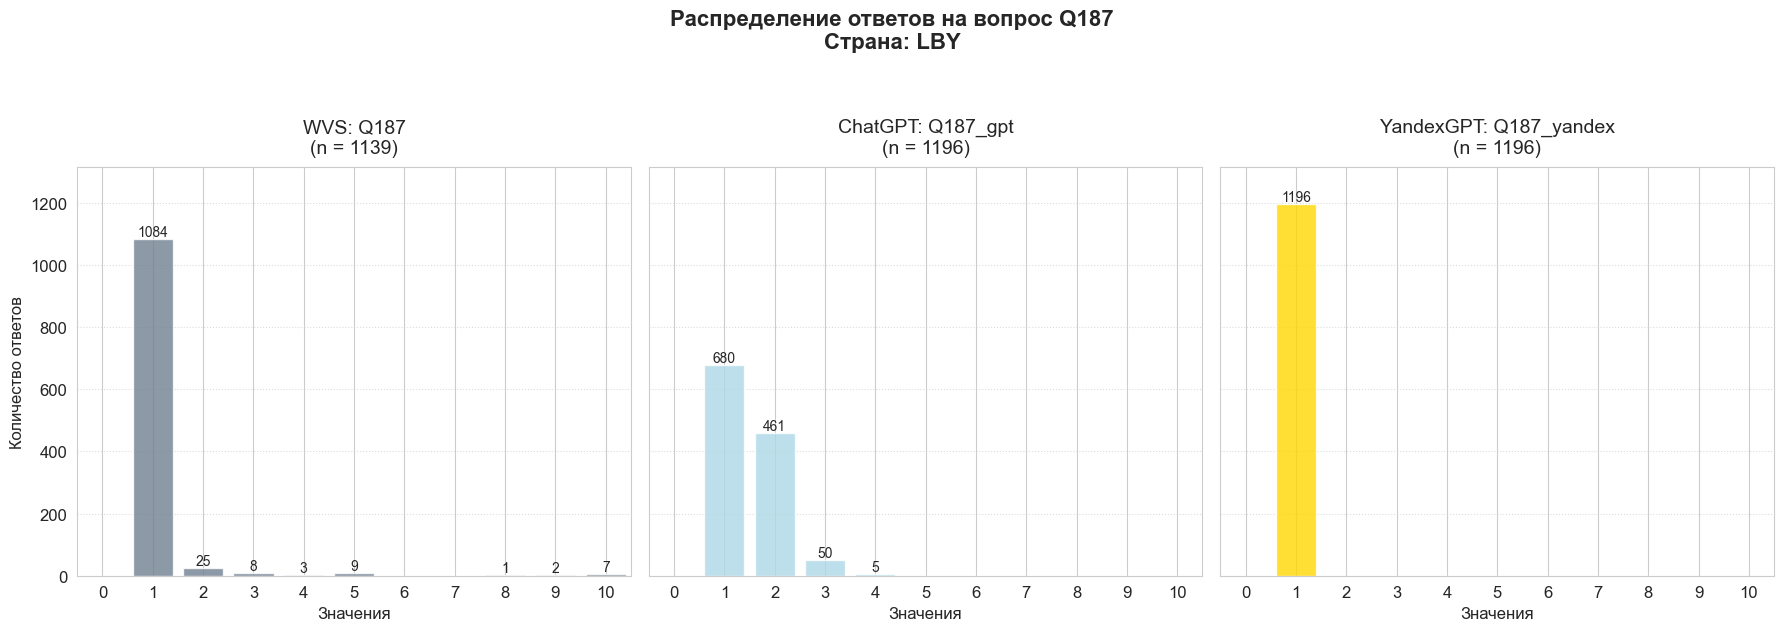

Нет данных для страны MAR


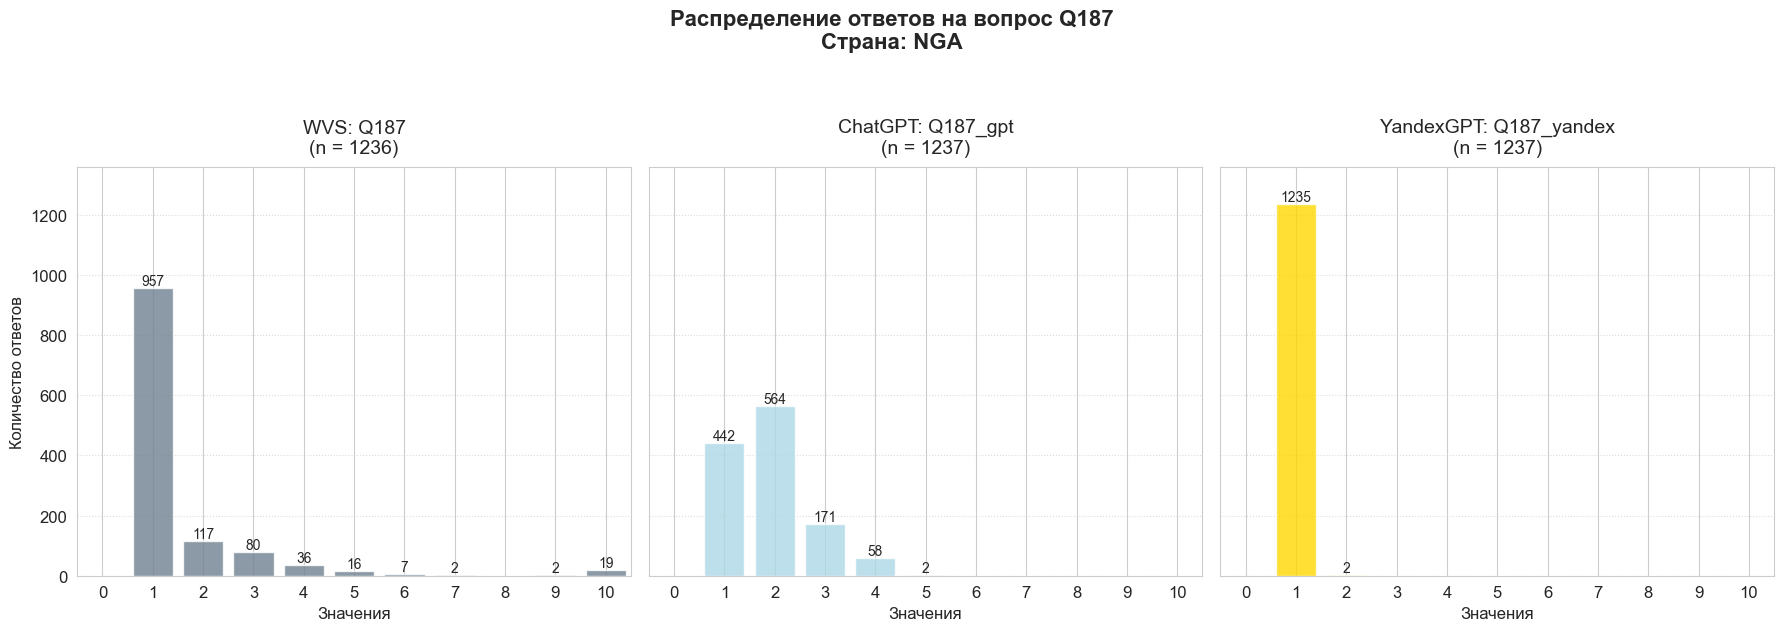

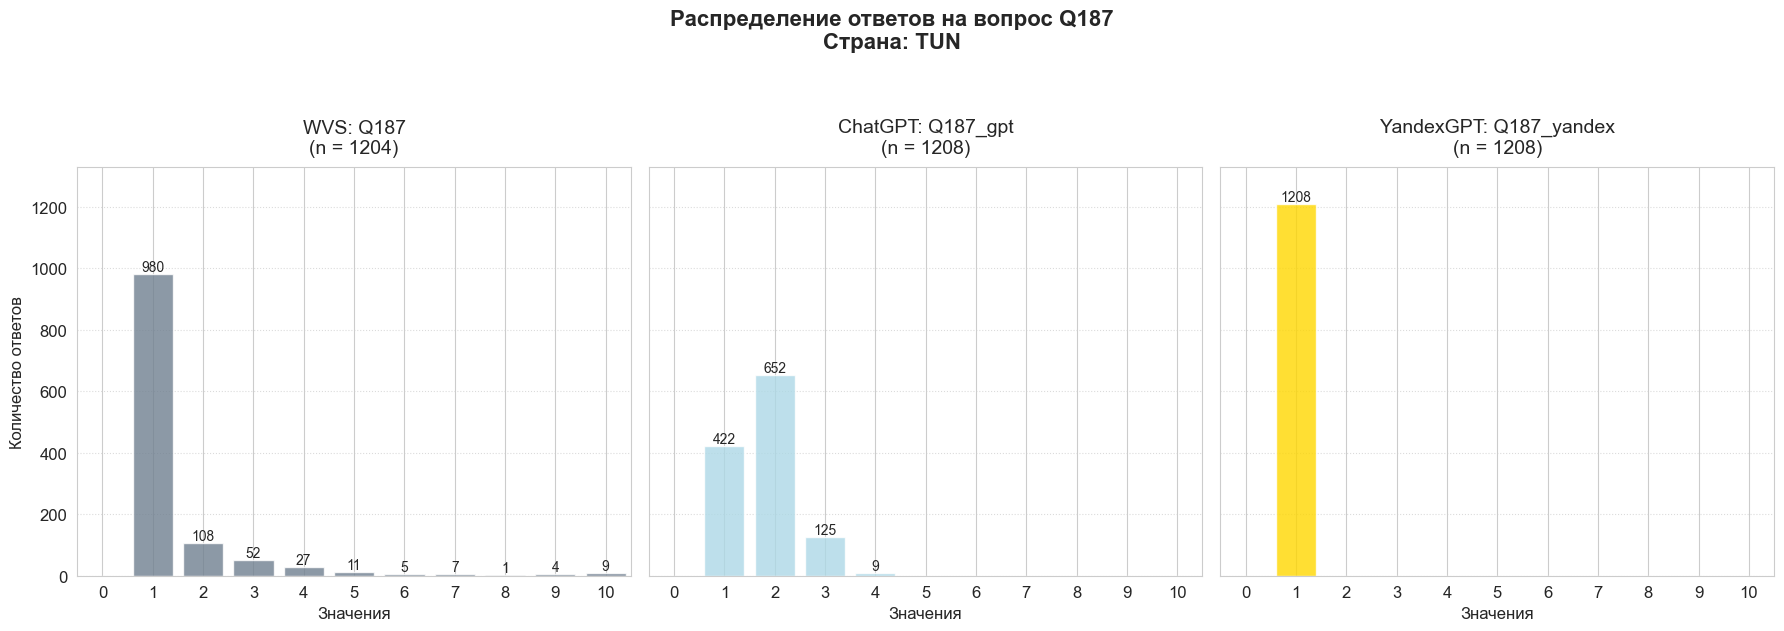

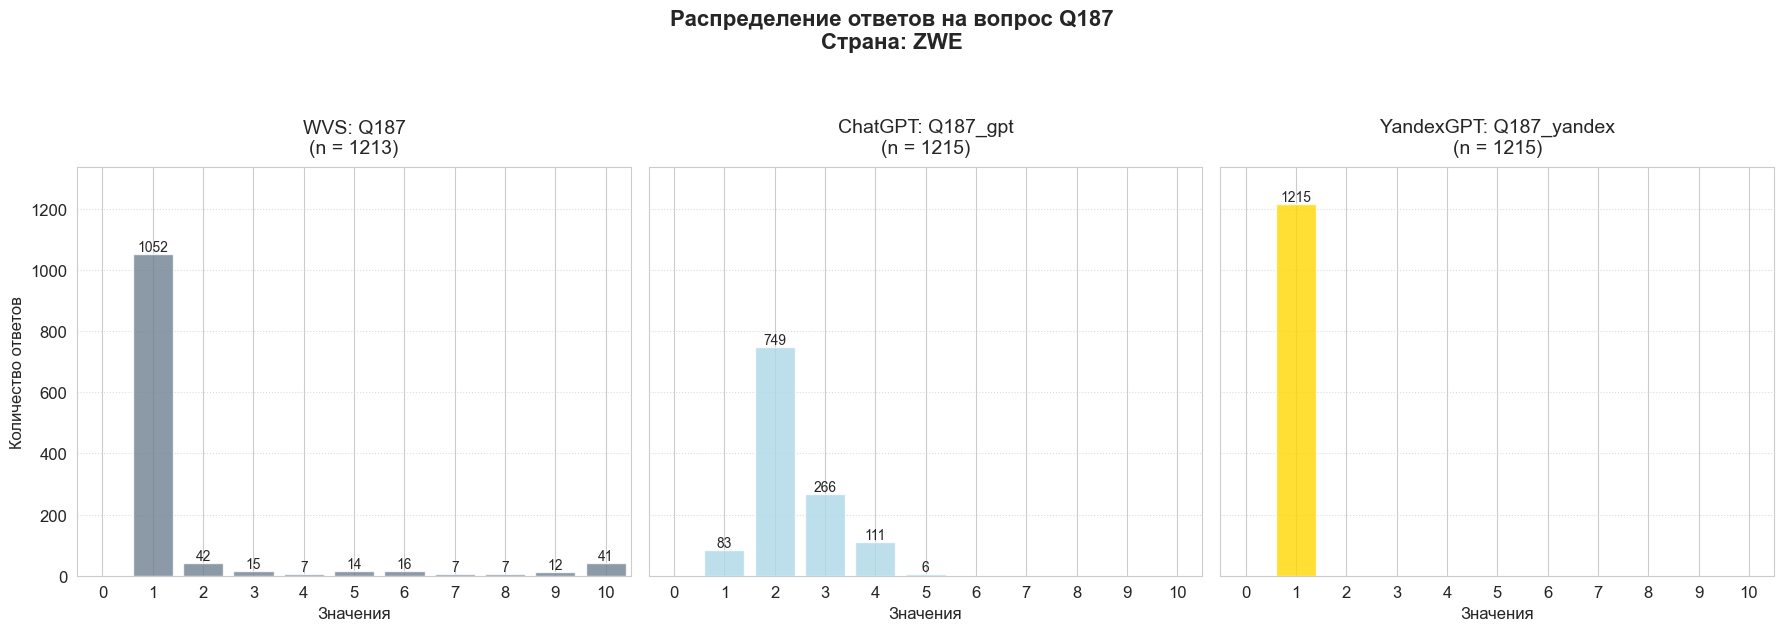

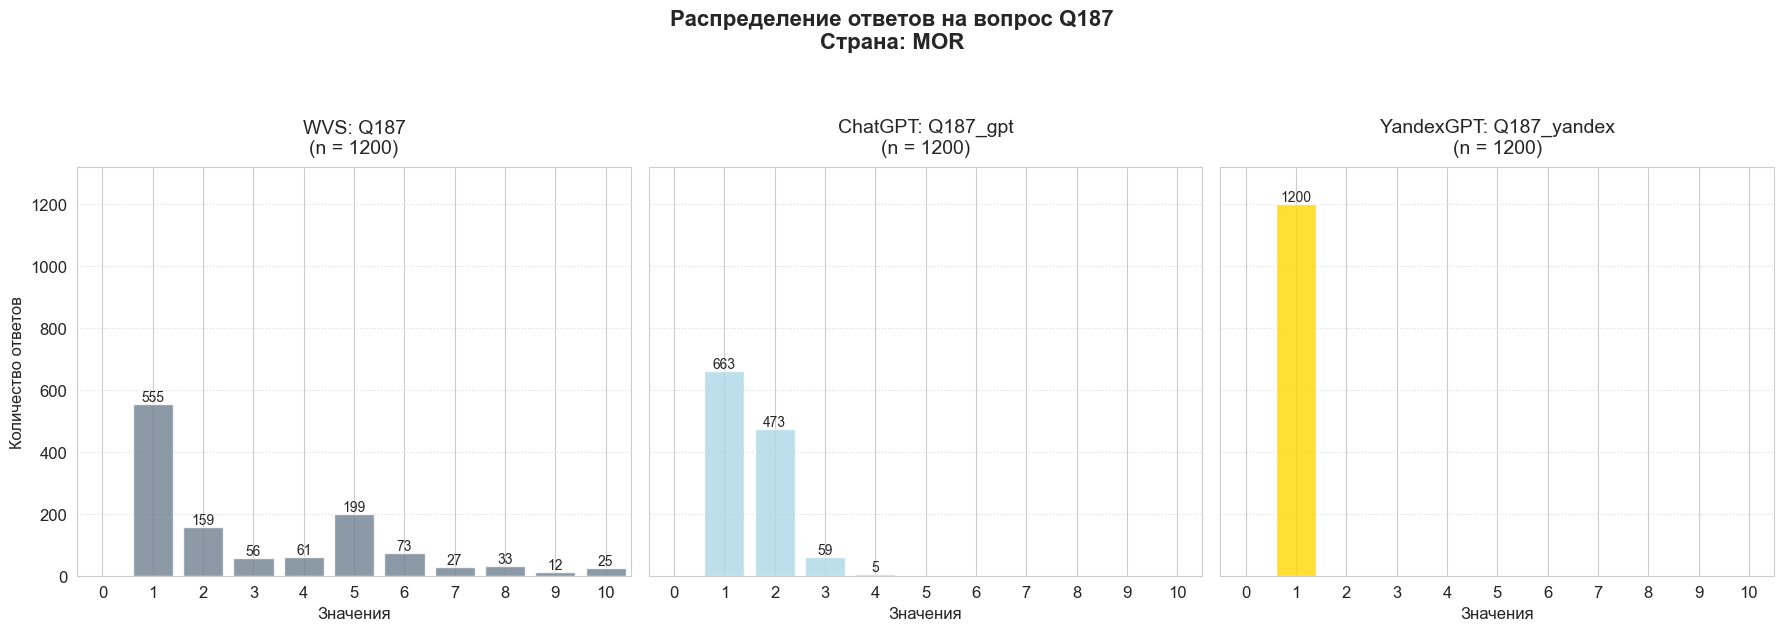

In [18]:
# Afrika
for country in afr:
    plot_question_by_country(df, question, country)